<span style="color:red; font-size: 40px; font-weight: bold;">             used car price predection              </span>

<span style="color:green; font-size: 30px; font-weight: bold;">            reading data                 </span>


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
import pandas as pd
file_path = "train.csv"
df = pd.read_csv('/content/drive/MyDrive/used cars dataset/'+ file_path)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import pointbiserialr
import datetime


In [ ]:
# Let's first load the dataset to inspect its structure
import pandas as pd

# Load the dataset
#file_path = "train and test datasets/train.csv"
#df = pd.read_csv(file_path)

# Display basic information about the dataset to understand its structure
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


(None,
    id          brand              model  model_year  milage      fuel_type  \
 0   0           MINI      Cooper S Base        2007  213000       Gasoline   
 1   1        Lincoln              LS V8        2002  143250       Gasoline   
 2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
 3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
 4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   
 
                                               engine  \
 0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
 1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
 2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
 3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
 4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
 
                      transmission ext_col int_col  \
 0                             A/T  Yellow    Gray   
 1                             A/T  Silver   Beige   
 2         

# our coulmns are in train data:
* id
* brand
* model
* model_year
* milage
* fuel_type
* engine
* transmission
* ext_col
* int_col
* accident
* clean_title
* price

In [ ]:
df.shape

(188533, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [ ]:
df.describe()

id     model_year         milage         price
count  188533.000000  188533.000000  188533.000000  1.885330e+05
mean    94266.000000    2015.829998   65705.295174  4.387802e+04
std     54424.933488       5.660967   49798.158076  7.881952e+04
min         0.000000    1974.000000     100.000000  2.000000e+03
25%     47133.000000    2013.000000   24115.000000  1.700000e+04
50%     94266.000000    2017.000000   57785.000000  3.082500e+04
75%    141399.000000    2020.000000   95400.000000  4.990000e+04
max    188532.000000    2024.000000  405000.000000  2.954083e+06

In [ ]:
df.head()

id          brand              model  model_year  milage      fuel_type  \
0   0           MINI      Cooper S Base        2007  213000       Gasoline   
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   

                                              engine  \
0       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
0                             A/T  Yellow    Gray   
1                             A/T  Silver   Beige   
2                             A/T    Blue    Gray   
3  Transmission w/Dual Shift Mode   Black   Black   
4                     7-Speed A/T   Black   Beige   

                                 accident clean_title  price  
0                           None reported         Yes   4200  
1  At least 1 accident or damage reported         Yes   4999  
2                           None reported         Yes  13900  
3                           None reported         Yes  45000  
4                           None reported         Yes  97500

In [ ]:
save_path = '/content/drive/My Drive/used cars dataset/'

In [ ]:
!pip install dython

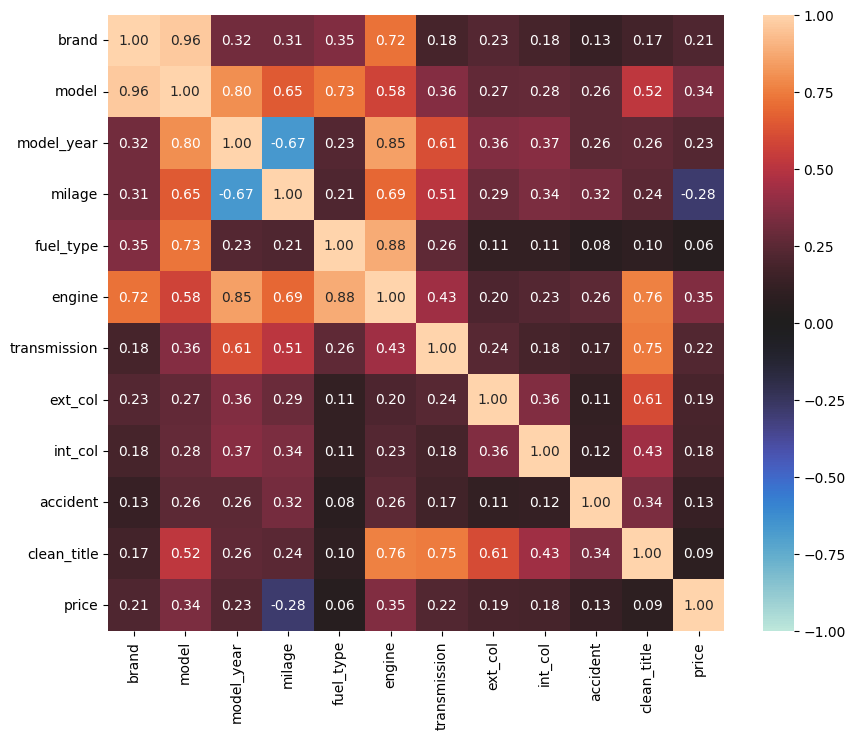

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dython.nominal import associations

# Example DataFrame 'df_cleaned'
# Assuming 'id' is to be excluded and categorical data is included

# Step 1: Drop the 'id' column
df_cleaned = df.drop(columns=['id'])

# Step 2: Define the title and save path for the plot
title = 'Correlation Heatmap'
save_path = '/content/drive/MyDrive/used cars dataset/'  # Path to your Google Drive folder

# Step 3: Compute the correlation matrix and plot using 'dython'
associations_result = associations(df_cleaned, figsize=(10, 8), plot=True)

# Step 4: Add title and save the plot to your Google Drive folder
# plt.title(title)
# plt.savefig(save_path + title + '.png', dpi=300, bbox_inches='tight')

# Show the plot
# plt.show()


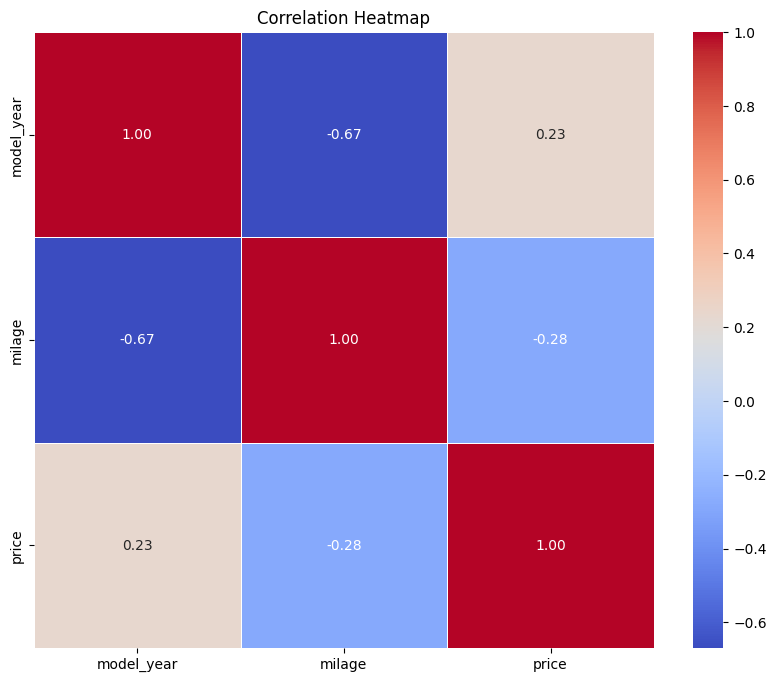

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=['id'])
correlation_matrix = numeric_df.corr()

# Step 3: Plot the heatmap using Seaborn
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Step 4: Display the plot
title = 'Correlation Heatmap'
plt.title(title)
plt.savefig(save_path + title, dpi=300, bbox_inches='tight')
plt.show()


# Visualizing missing data


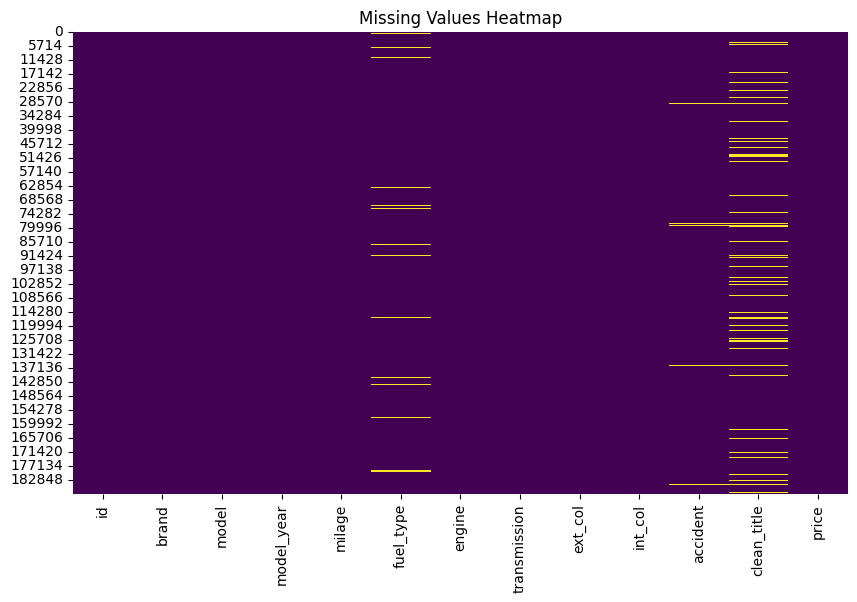

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [ ]:
# Visualizing missing data
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size for the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Check missing values count
missing_values = df.isnull().sum()
missing_values

#### we realize that we have nulls in :
* fuel_type
* accident
* clean_title

# fuel_type

In [ ]:
df["fuel_type"].value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

In [ ]:
# Function to extract fuel type from the engine column, keeping the original fuel_type if no match is found
def extract_fuel_from_engine(engine, original_fuel_type):
    if pd.isna(engine):
        return original_fuel_type  # Keep the original fuel type if engine info is missing
    engine_lower = engine.lower()

    # Check for fuel types
    if "electric" in engine_lower:
        return "Electric"
    elif "gasoline" in engine_lower or "gas" in engine_lower:
        return "Gasoline"
    elif "diesel" in engine_lower:
        return "Diesel"
    elif "flex fuel" in engine_lower:
        return "Flex Fuel"
    elif "hybrid" in engine_lower:
        return "Hybrid"
    else:
        return original_fuel_type  # Keep the original fuel type if no match is found

# Apply the function and pass the original fuel_type as a fallback
df['fuel_type'] = df.apply(lambda row: extract_fuel_from_engine(row['engine'], row['fuel_type']), axis=1)


In [ ]:
df["fuel_type"].value_counts()

fuel_type
Gasoline          164875
Electric           11139
Flex Fuel           5168
Diesel              4189
Hybrid              1931
–                    774
E85 Flex Fuel        267
Plug-In Hybrid        13
Name: count, dtype: int64

In [ ]:
# Step 2: Merge 'E85 Flex Fuel' with 'Flex Fuel'
df['fuel_type'] = df['fuel_type'].replace('E85 Flex Fuel', 'Flex Fuel')

# Step 3: Merge 'Plug-In Hybrid' with 'Hybrid'
df['fuel_type'] = df['fuel_type'].replace('Plug-In Hybrid', 'Hybrid')

# Check the updated unique values in fuel_type
df['fuel_type'].value_counts()


fuel_type
Gasoline     164875
Electric      11139
Flex Fuel      5435
Diesel         4189
Hybrid         1944
–               774
Name: count, dtype: int64

In [ ]:
# Drop rows where the fuel_type column has the value '–'
df = df[df['fuel_type'] != '–']

# Check the updated dataframe to confirm the rows have been dropped
df['fuel_type'].value_counts()

fuel_type
Gasoline     164875
Electric      11139
Flex Fuel      5435
Diesel         4189
Hybrid         1944
Name: count, dtype: int64

In [ ]:
df['fuel_type'].isna().sum()

177

In [ ]:
df = df.dropna(subset=['fuel_type'])
df['fuel_type'].isna().sum()

0

# accident

In [ ]:
df['accident'].value_counts()

accident
None reported                             143867
At least 1 accident or damage reported     41286
Name: count, dtype: int64

In [ ]:
df['accident'].isna().sum()

2429

In [ ]:
df = df.dropna(subset=['accident'])

In [ ]:
df['accident'].isna().sum()

0

# clean_title

In [ ]:
 df['clean_title'].value_counts()

clean_title
Yes    166331
Name: count, dtype: int64

In [ ]:
df['clean_title'].isna().sum()

18822

In [ ]:
df['clean_title'] = df['clean_title'].fillna('NO')

In [ ]:
 df['clean_title'].value_counts()

clean_title
Yes    166331
NO      18822
Name: count, dtype: int64

# color

In [ ]:
df["ext_col"].unique()


array(['Yellow', 'Silver', 'Blue', 'Black', 'White',
       'Snowflake White Pearl Metallic', 'Gray', 'Green',
       'Santorini Black Metallic', 'Purple', 'Ebony Twilight Metallic',
       'Red', 'Magnetite Black Metallic', 'Diamond Black', 'Vega Blue',
       'Beige', 'Gold', 'Platinum White Pearl', 'Metallic',
       'White Frost Tri-Coat', 'Phytonic Blue Metallic', 'Blu', 'Orange',
       'Brown', 'Brilliant Silver Metallic', 'Black Raven',
       'Black Clearcoat', 'Firenze Red', 'Agate Black Metallic',
       'Glacial White Pearl', 'Majestic Plum Metallic',
       'designo Diamond White Metallic', 'Oxford White',
       'Black Sapphire Metallic', 'Mythos Black',
       'Granite Crystal Clearcoat Metallic', 'White Diamond Tri-Coat',
       'Magnetite Gray Metallic', 'Carpathian Grey Premium Metallic',
       'designo Diamond White Bright',
       'Phantom Black Pearl Effect / Black Roof', 'Nebula Gray Pearl',
       'Deep Crystal Blue Mica', 'Flame Red Clearcoat',
       'Lunar Bl

In [ ]:
df["int_col"].nunique()

156

In [ ]:
# Define a function to simplify and group colors into broader categories for ML models
def reduce_color_variants(color):
    color = color.lower().strip()  # Make sure everything is lowercase and stripped of spaces

    # Mapping broader color categories
    if any(x in color for x in ['red', 'rosso', 'ruby', 'crimson', 'scarlet']):
        return 'red'
    elif any(x in color for x in ['blue', 'navy', 'indigo']):
        return 'blue'
    elif any(x in color for x in ['black', 'nero', 'onyx']):
        return 'black'
    elif any(x in color for x in ['white', 'bianco', 'alpine', 'snow', 'frost']):
        return 'white'
    elif any(x in color for x in ['silver', 'gray', 'grey', 'granite', 'titanium']):
        return 'gray'
    elif any(x in color for x in ['green', 'emerald']):
        return 'green'
    elif any(x in color for x in ['yellow']):
        return 'yellow'
    elif any(x in color for x in ['brown', 'bronze', 'beige', 'tan']):
        return 'brown'
    elif any(x in color for x in ['purple', 'plum']):
        return 'purple'
    elif any(x in color for x in ['orange']):
        return 'orange'
    elif any(x in color for x in ['gold']):
        return 'gold'
    elif any(x in color for x in ['pink']):
        return 'pink'
    else:
        return 'other'  # Handle remaining rare or unspecified colors

# Apply the function to reduce color variants
df['ext_col'] = df['ext_col'].apply(reduce_color_variants)
df['int_col'] = df['int_col'].apply(reduce_color_variants)
# Check unique values after reduction
df['ext_col'].unique()


array(['yellow', 'gray', 'blue', 'black', 'white', 'green', 'purple',
       'other', 'red', 'brown', 'gold', 'orange', 'pink'], dtype=object)

# enigine coulmn

In [ ]:
# Extract horsepower, engine size (liters), and number of cylinders from the engine column
df['horsepower'] = df['engine'].str.extract(r'(\d+\.?\d*)HP')[0].astype(float)
df['engine_size'] = df['engine'].str.extract(r'(\d+\.?\d*)L')[0].astype(float)
df['cylinders'] = df['engine'].str.extract(r'(\d+) Cylinder')[0].astype(float)

# Drop the original 'engine' column if all useful data has been extracted
df.drop(columns=['engine'], inplace=True)

# Check for missing values in the new features and handle them
df[['horsepower', 'engine_size', 'cylinders']].isnull().sum()

horsepower     31500
engine_size    13175
cylinders      36049
dtype: int64

In [ ]:
# Imputing horsepower and engine_size based on median values within each model
# For horsepower
df['horsepower'] = df.groupby('model')['horsepower'].transform(lambda x: x.fillna(x.mean()))
df['horsepower'] = df.groupby('brand')['horsepower'].transform(lambda x: x.fillna(x.mean()))
df['horsepower'].isnull().sum()

7

In [ ]:
df = df.dropna(subset=['horsepower'])

In [ ]:
df['horsepower'].isnull().sum()

0

In [ ]:
# Fill cylinders based on the mean of each model
df['cylinders'] = df.groupby('model')['cylinders'].transform(lambda x: x.fillna(x.mean()))
df['cylinders'] = df.groupby('brand')['cylinders'].transform(lambda x: x.fillna(x.mean()))

# Check if there are any remaining null values
print(df['cylinders'].isnull().sum())

0


In [ ]:
# Fill engine_size based on the mean of each model
df['engine_size'] = df.groupby('model')['engine_size'].transform(lambda x: x.fillna(x.mean()))
df['engine_size'] = df.groupby('brand')['engine_size'].transform(lambda x: x.fillna(x.mean()))



# Check if there are any remaining null values
print(df['engine_size'].isnull().sum())


0


In [ ]:
df.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
horsepower      0
engine_size     0
cylinders       0
dtype: int64

## feature enginerring

# age of the car

In [ ]:
# Get the current year
current_year = datetime.datetime.now().year

# Convert 'model_year' to 'age'
df['car_age'] = current_year - df['model_year']

# Check the result
df[['model_year', 'car_age']].head()

model_year  car_age
0        2007       17
1        2002       22
2        2002       22
3        2017        7
4        2021        3

In [ ]:
df = df.drop(columns=['model_year'])

In [ ]:
df.head()

id          brand              model  milage  fuel_type  \
0   0           MINI      Cooper S Base  213000   Gasoline   
1   1        Lincoln              LS V8  143250   Gasoline   
2   2      Chevrolet  Silverado 2500 LT  136731  Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate   19500   Gasoline   
4   4  Mercedes-Benz        Metris Base    7388   Gasoline   

                     transmission ext_col int_col  \
0                             A/T  yellow    gray   
1                             A/T    gray   brown   
2                             A/T    blue    gray   
3  Transmission w/Dual Shift Mode   black   black   
4                     7-Speed A/T   black   brown   

                                 accident clean_title  price  horsepower  \
0                           None reported         Yes   4200       172.0   
1  At least 1 accident or damage reported         Yes   4999       252.0   
2                           None reported         Yes  13900       320.0   
3                           None reported         Yes  45000       420.0   
4                           None reported         Yes  97500       208.0   

   engine_size  cylinders  car_age  
0          1.6        4.0       17  
1          3.9        8.0       22  
2          5.3        8.0       22  
3          5.0        8.0        7  
4          2.0        4.0        3

## transmission coulmn


In [ ]:
# Get unique values in the 'transmission' column
print(df['transmission'].unique())

['A/T' 'Transmission w/Dual Shift Mode' '7-Speed A/T' '8-Speed A/T'
 '10-Speed Automatic' '1-Speed A/T' '6-Speed A/T' '10-Speed A/T'
 '9-Speed A/T' '8-Speed Automatic' '9-Speed Automatic' '5-Speed A/T'
 '7-Speed Automatic with Auto-Shift' 'Automatic' 'CVT Transmission'
 '5-Speed M/T' 'M/T' '6-Speed M/T' '6-Speed Automatic' '4-Speed Automatic'
 '7-Speed M/T' '2-Speed A/T' '1-Speed Automatic' 'Automatic CVT'
 '4-Speed A/T' '6-Speed Manual' 'Transmission Overdrive Switch'
 '8-Speed Automatic with Auto-Shift' '7-Speed Manual' '7-Speed Automatic'
 '9-Speed Automatic with Auto-Shift' '6-Speed Automatic with Auto-Shift'
 '6-Speed Electronically Controlled Automatic with O' 'F' 'CVT-F'
 '8-Speed Manual' 'Manual' '–' '2' '6 Speed At/Mt' '5-Speed Automatic'
 '2-Speed Automatic' '8-SPEED A/T' '7-Speed' 'Variable'
 'Single-Speed Fixed Gear' '8-SPEED AT'
 '10-Speed Automatic with Overdrive' '7-Speed DCT Automatic'
 'SCHEDULED FOR OR IN PRODUCTION' '6-Speed' '6 Speed Mt']


In [ ]:
def categorize_transmission(transmission):
    if pd.isna(transmission) or transmission.strip() == "":  # Handle empty or NaN values
        return 'Other'

    transmission = transmission.lower().strip()  # Convert to lowercase and remove leading/trailing spaces

    # Patterns for each category with broader matching
    if re.search(r'(automatic|a/t|auto|overdrive|speed a/t|speed automatic)', transmission):
        return 'Automatic'
    elif re.search(r'(manual|m/t|mt|speed manual)', transmission):
        return 'Manual'
    elif re.search(r'(cvt|variable)', transmission):
        return 'CVT'
    elif re.search(r'(dual-clutch|dct)', transmission):
        return 'Dual-Clutch'
    else:
        return 'Other'  # Return 'Other' if no pattern matches

# Apply the function to the 'Transmission' column
df['Transmission_Standardized'] = df['transmission'].apply(categorize_transmission)

# Check for any null values
null_count = df['Transmission_Standardized'].isna().sum()
other_count = df['Transmission_Standardized'].value_counts().get('Other', 0)

# Display the DataFrame and counts
#import ace_tools as tools; tools.display_dataframe_to_user(name="Standardized Transmission Data (Regex - Expanded)", dataframe=df)
print(f"Number of 'Other' values: {other_count}")

Number of 'Other' values: 19347


In [ ]:
df['Transmission_Standardized'].value_counts()

Transmission_Standardized
Automatic    147744
Other         19347
Manual        16009
CVT            2046
Name: count, dtype: int64

In [ ]:
df['Transmission_Standardized'].isna().sum()

0

In [ ]:
df.head()

id          brand              model  milage  fuel_type  \
0   0           MINI      Cooper S Base  213000   Gasoline   
1   1        Lincoln              LS V8  143250   Gasoline   
2   2      Chevrolet  Silverado 2500 LT  136731  Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate   19500   Gasoline   
4   4  Mercedes-Benz        Metris Base    7388   Gasoline   

                     transmission ext_col int_col  \
0                             A/T  yellow    gray   
1                             A/T    gray   brown   
2                             A/T    blue    gray   
3  Transmission w/Dual Shift Mode   black   black   
4                     7-Speed A/T   black   brown   

                                 accident clean_title  price  horsepower  \
0                           None reported         Yes   4200       172.0   
1  At least 1 accident or damage reported         Yes   4999       252.0   
2                           None reported         Yes  13900       320.0   
3                           None reported         Yes  45000       420.0   
4                           None reported         Yes  97500       208.0   

   engine_size  cylinders  car_age Transmission_Standardized  
0          1.6        4.0       17                 Automatic  
1          3.9        8.0       22                 Automatic  
2          5.3        8.0       22                 Automatic  
3          5.0        8.0        7                     Other  
4          2.0        4.0        3                 Automatic

In [ ]:
#df=df.drop(["ext_col","int_col"],axis=1)
#transmission
df=df.drop("transmission",axis=1)

In [ ]:
df.head()

id          brand              model  milage  fuel_type ext_col int_col  \
0   0           MINI      Cooper S Base  213000   Gasoline  yellow    gray   
1   1        Lincoln              LS V8  143250   Gasoline    gray   brown   
2   2      Chevrolet  Silverado 2500 LT  136731  Flex Fuel    blue    gray   
3   3        Genesis   G90 5.0 Ultimate   19500   Gasoline   black   black   
4   4  Mercedes-Benz        Metris Base    7388   Gasoline   black   brown   

                                 accident clean_title  price  horsepower  \
0                           None reported         Yes   4200       172.0   
1  At least 1 accident or damage reported         Yes   4999       252.0   
2                           None reported         Yes  13900       320.0   
3                           None reported         Yes  45000       420.0   
4                           None reported         Yes  97500       208.0   

   engine_size  cylinders  car_age Transmission_Standardized  
0          1.6        4.0       17                 Automatic  
1          3.9        8.0       22                 Automatic  
2          5.3        8.0       22                 Automatic  
3          5.0        8.0        7                     Other  
4          2.0        4.0        3                 Automatic

In [ ]:

# df.to_csv('cleaned_dataset.csv', index=False)


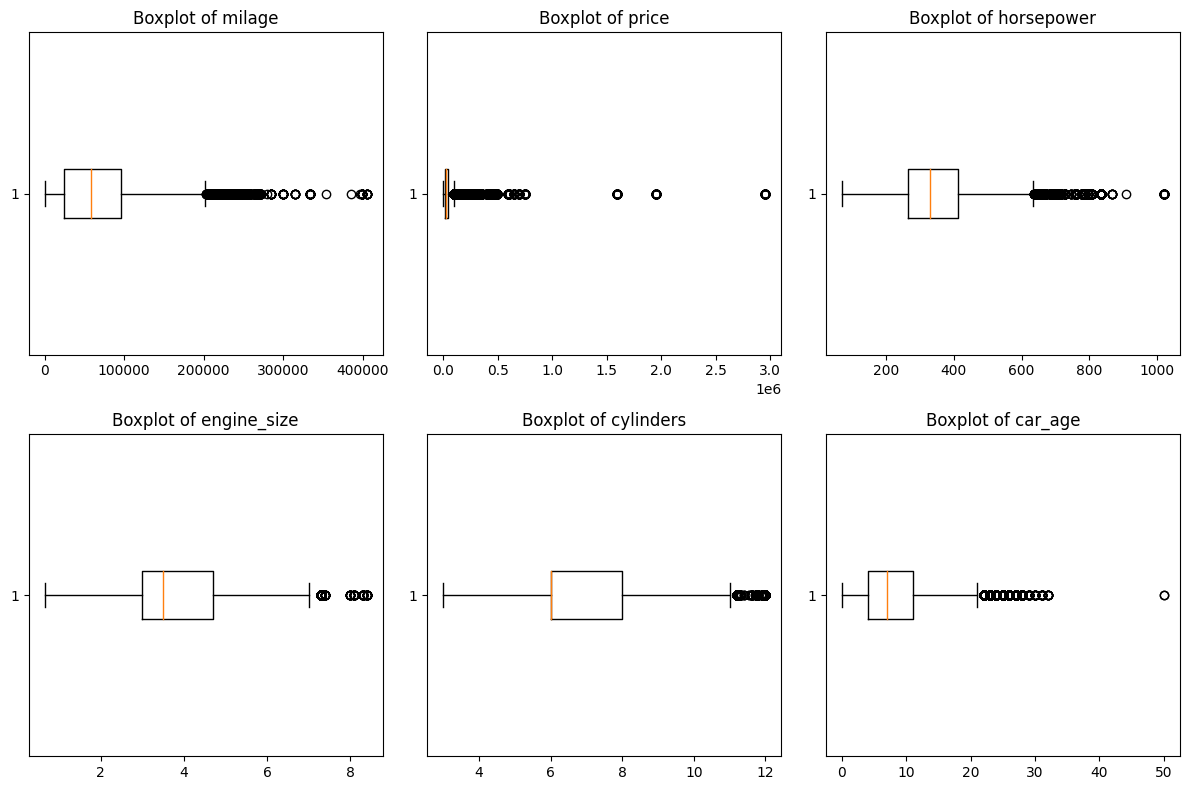

In [ ]:
import matplotlib.pyplot as plt

# Select numeric columns for outlier detection
numeric_columns = ['milage', 'price', 'horsepower', 'engine_size', 'cylinders',"car_age"]

# Create boxplots for these numeric columns to visualize outliers
plt.figure(figsize=(12, 8))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[column], vert=False)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

# remove outliers

In [ ]:
from scipy.stats import skew

numeric_columns = ['milage', 'price', 'horsepower', 'engine_size', 'cylinders',"car_age"]

for column in numeric_columns:
    skewness = skew(df[column])
    print(f"Skewness of {column}: {skewness}")


Skewness of milage: 0.8889971944671571
Skewness of price: 20.305519730597997
Skewness of horsepower: 0.7921676479883495
Skewness of engine_size: 0.49101537132816875
Skewness of cylinders: 0.2518126798167639
Skewness of car_age: 0.9825494763722127


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox, skew
import seaborn as sns


In [ ]:
def plot_transformation(original, transformed, title_original, title_transformed):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Original data plot
    sns.histplot(original, ax=axes[0], kde=True)
    axes[0].set_title(f'{title_original}')

    # Transformed data plot
    sns.histplot(transformed, ax=axes[1], kde=True)
    axes[1].set_title(f'{title_transformed}')

    plt.tight_layout()
    plt.show()


Log Transformation

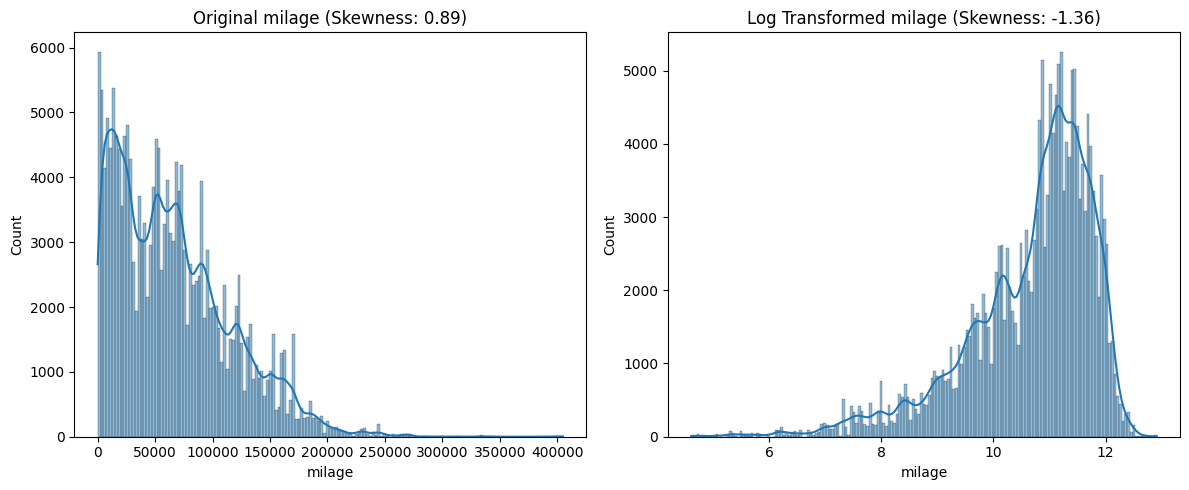

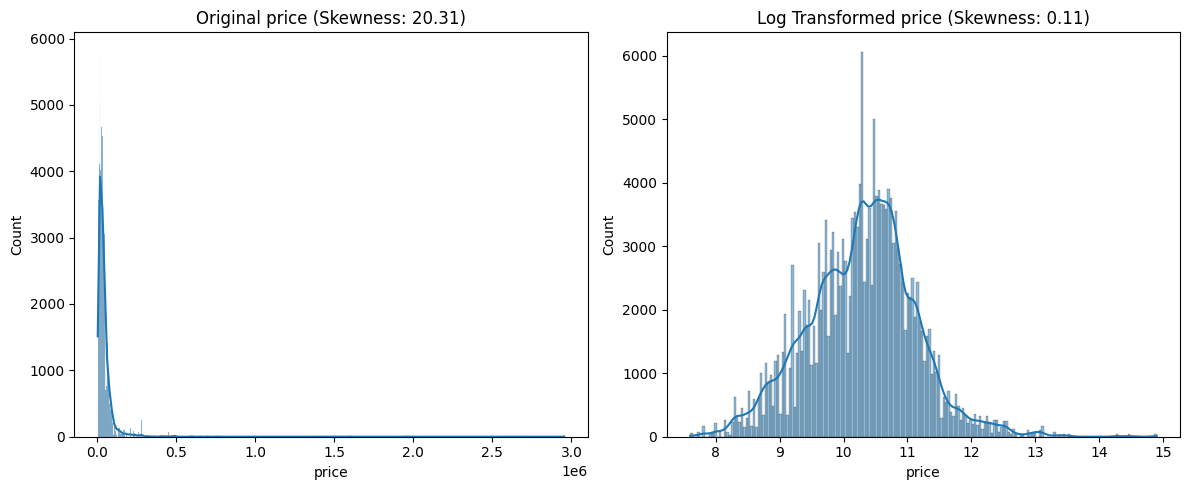

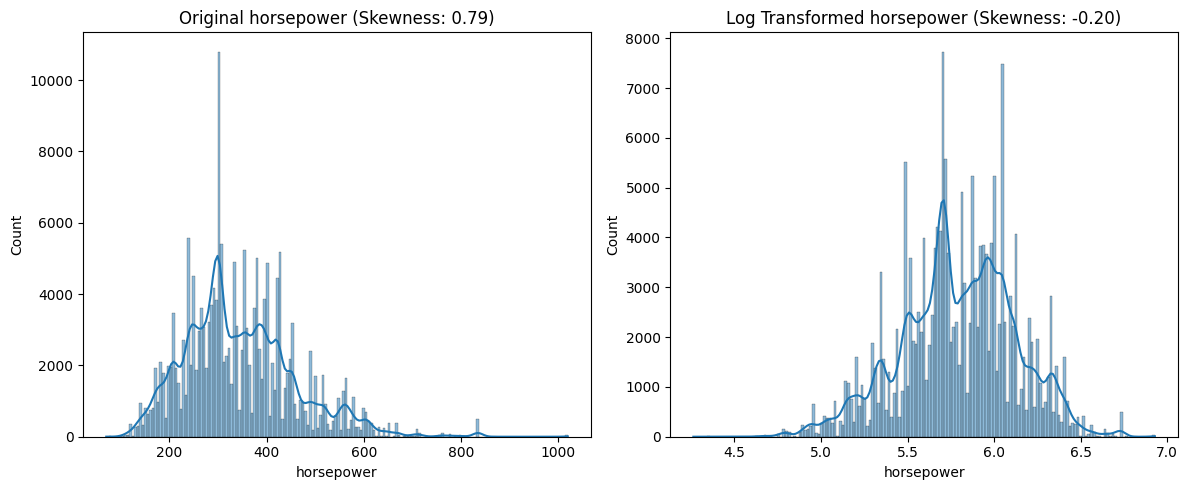

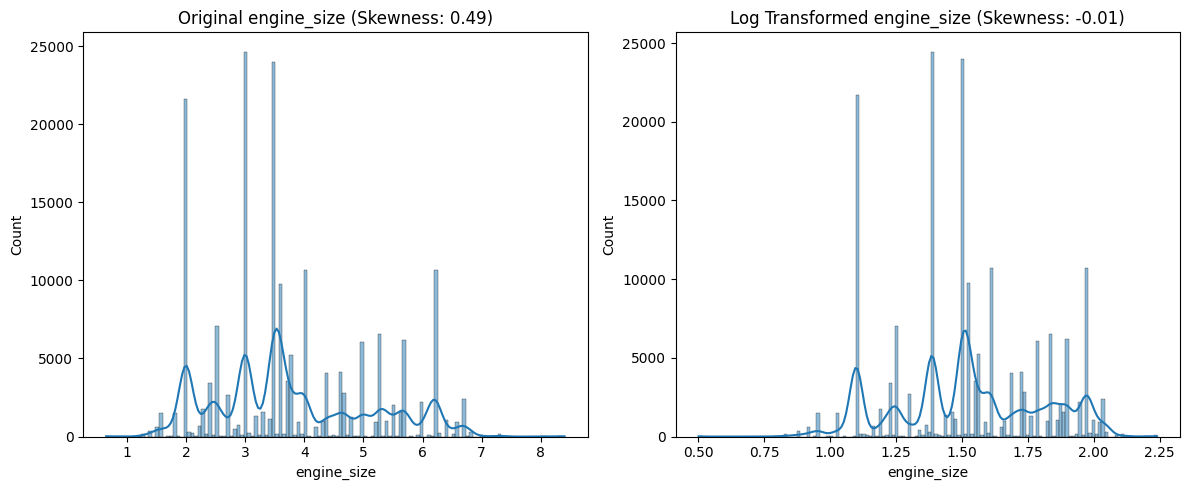

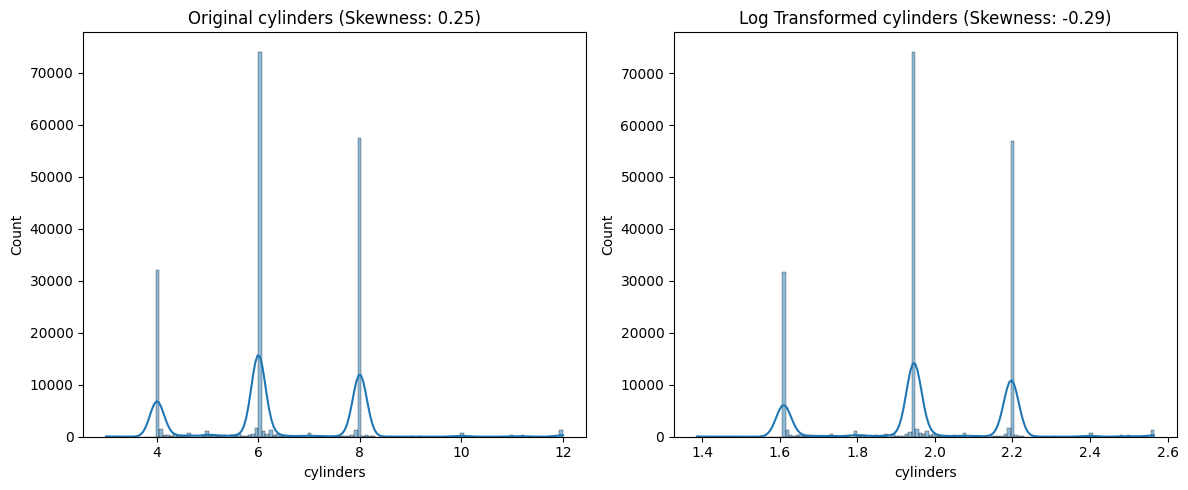

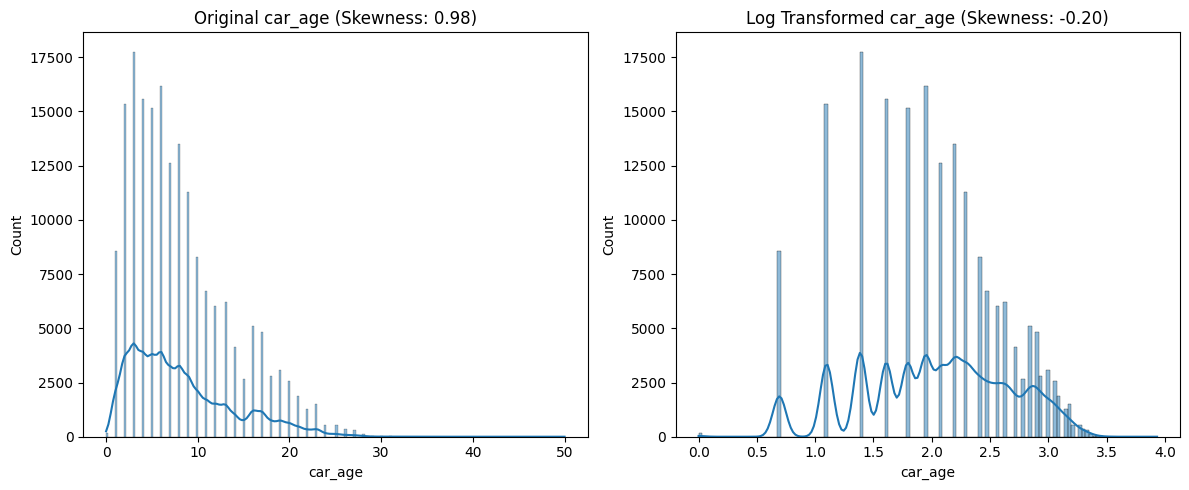

In [ ]:
for column in numeric_columns:
    original_data = df[column]

    # Apply log transformation (handle any potential zeros or negative values)
    transformed_data = np.log1p(original_data)  # log(1 + x) to avoid log(0)

    # Plot before and after log transformation
    plot_transformation(
        original_data,
        transformed_data,
        f'Original {column} (Skewness: {skew(original_data):.2f})',
        f'Log Transformed {column} (Skewness: {skew(transformed_data):.2f})'
    )


Box-Cox Transformation

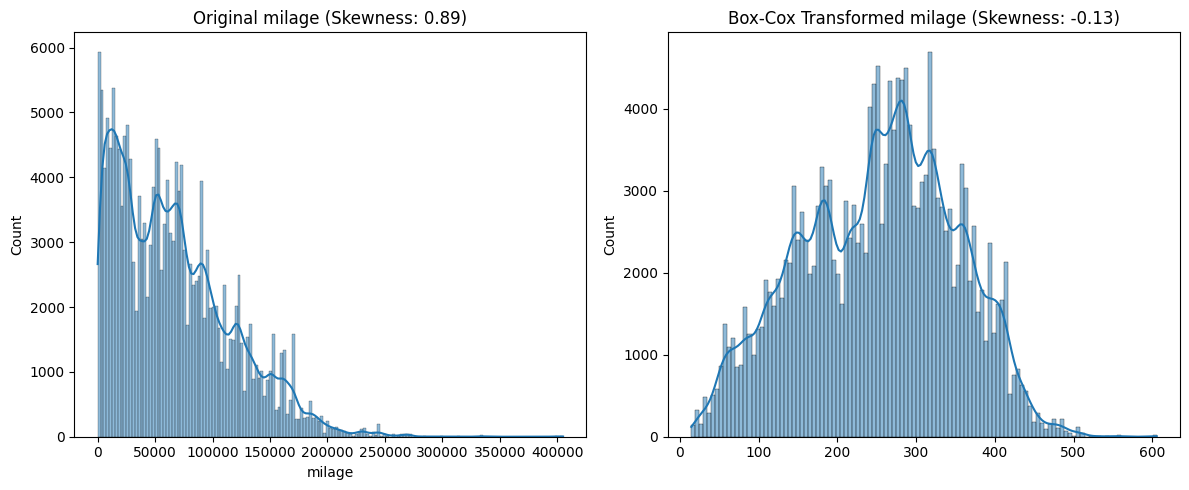

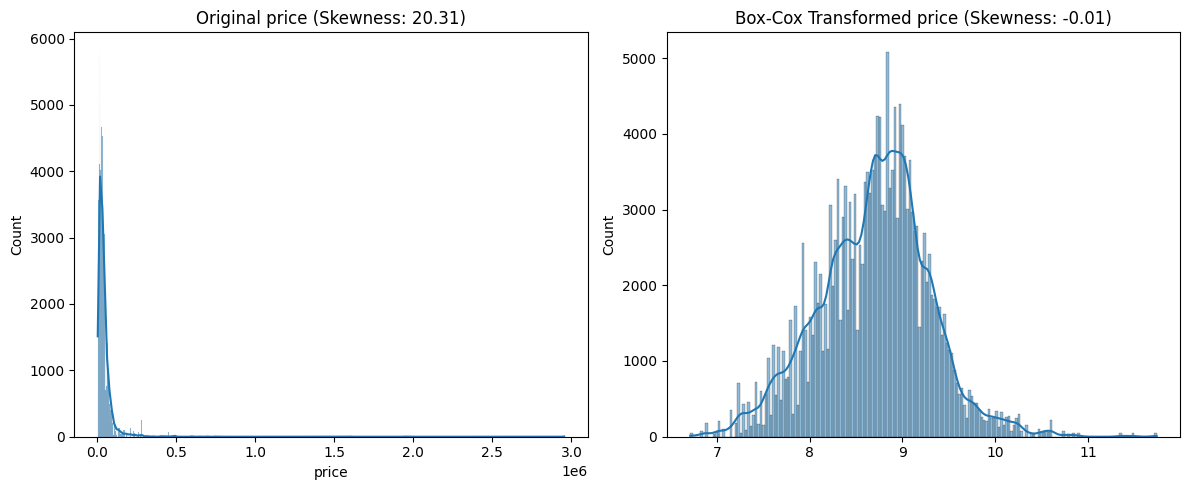

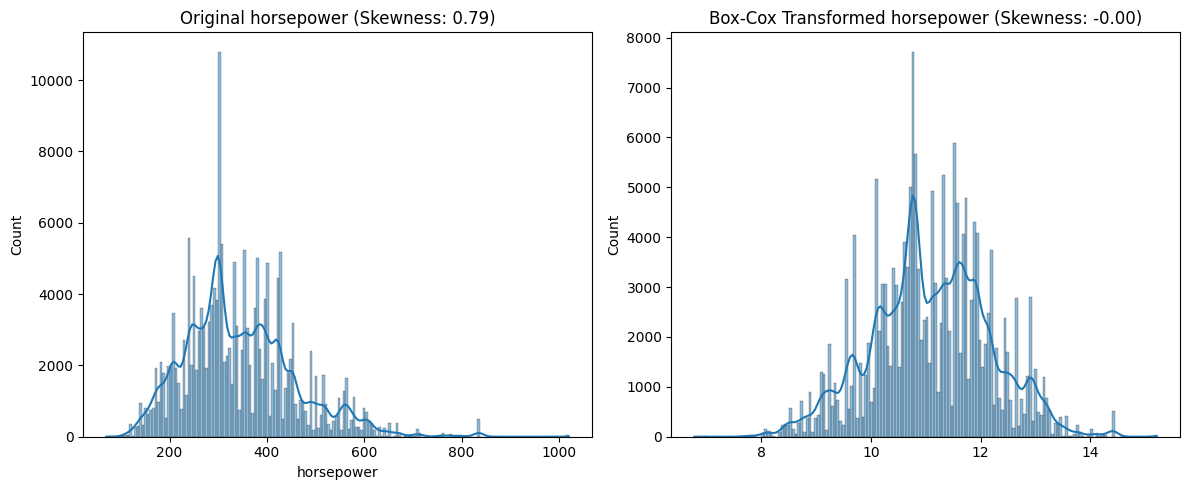

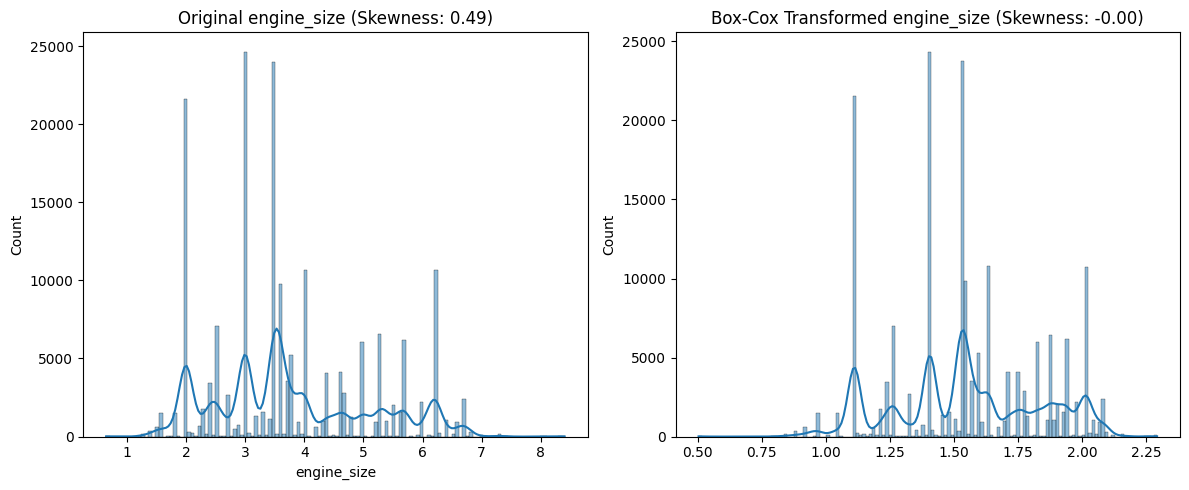

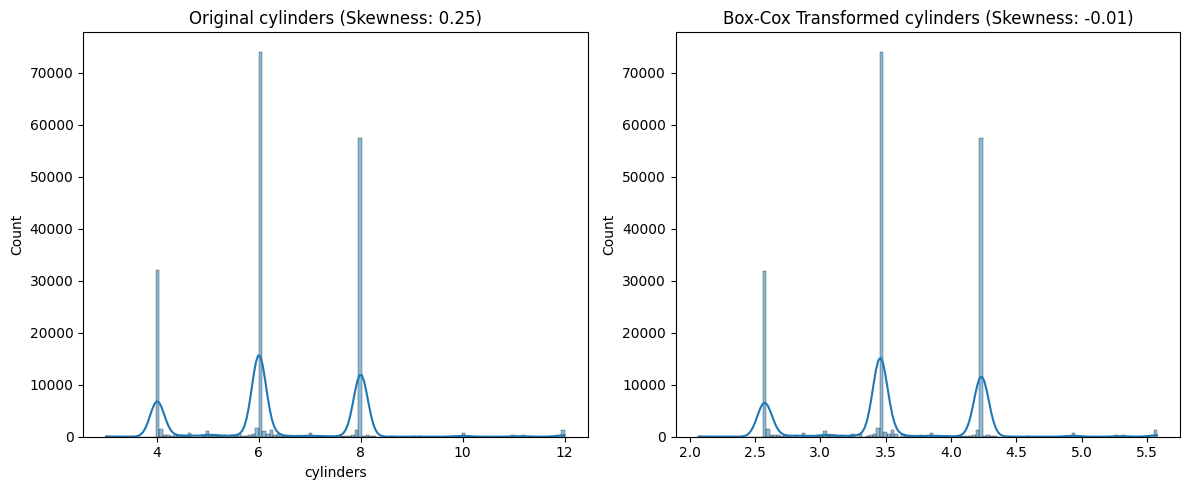

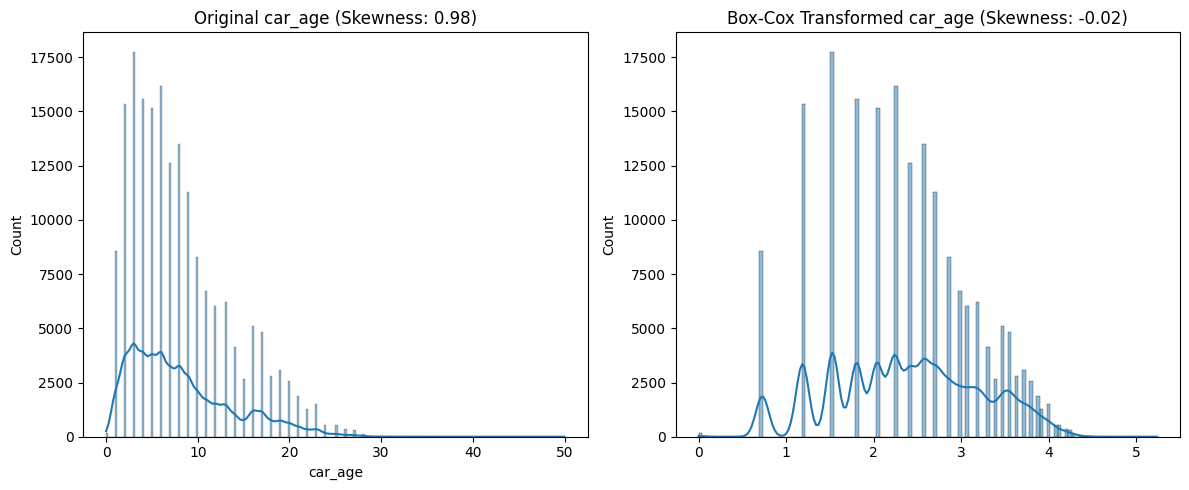

In [ ]:
for column in numeric_columns:
    original_data = df[column]

    # Apply Box-Cox transformation (ensure values are positive)
    transformed_data, _ = boxcox(original_data + 1)  # Add 1 to avoid zero values

    # Plot before and after Box-Cox transformation
    plot_transformation(
        original_data,
        transformed_data,
        f'Original {column} (Skewness: {skew(original_data):.2f})',
        f'Box-Cox Transformed {column} (Skewness: {skew(transformed_data):.2f})'
    )


Square Root Transformation

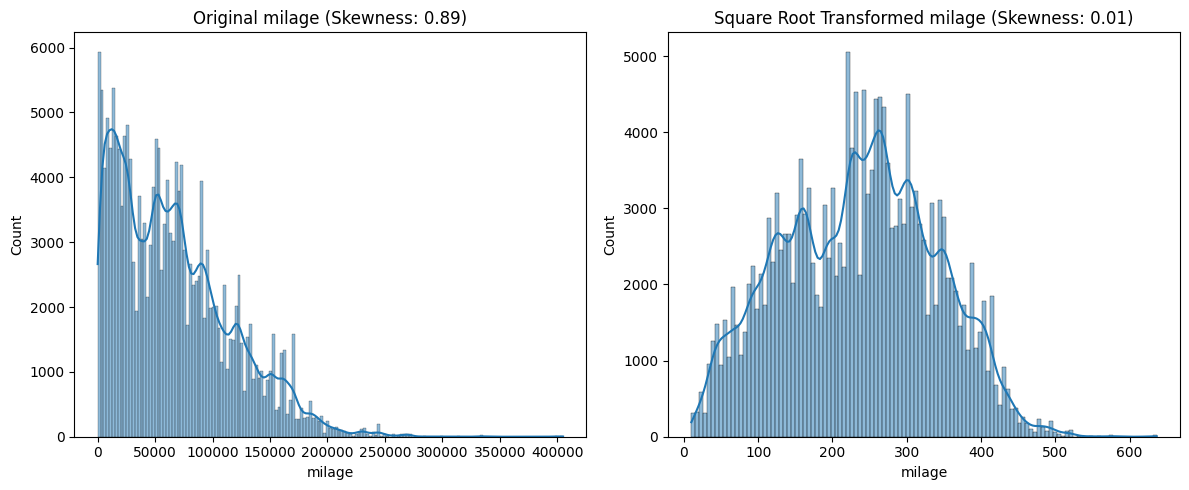

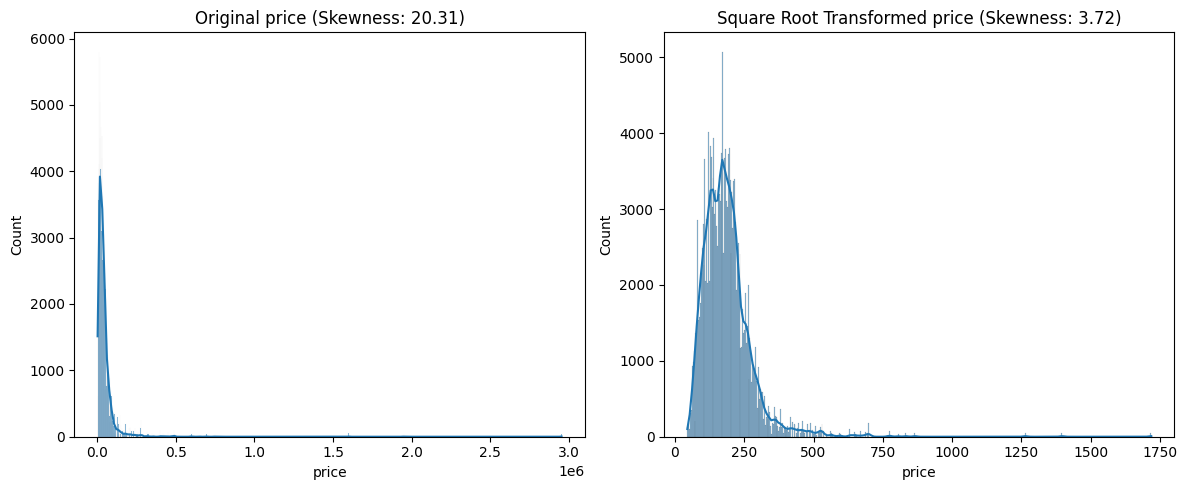

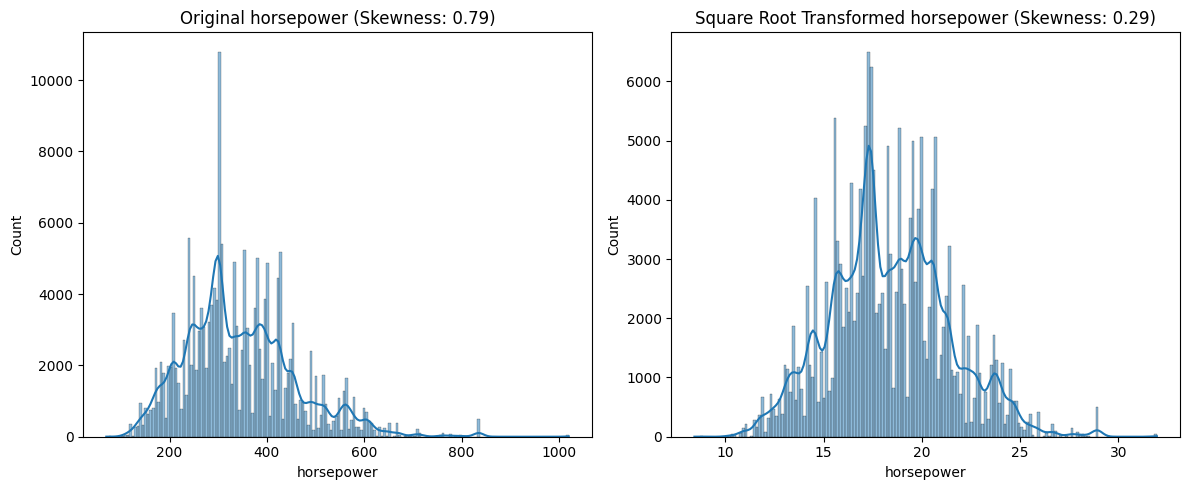

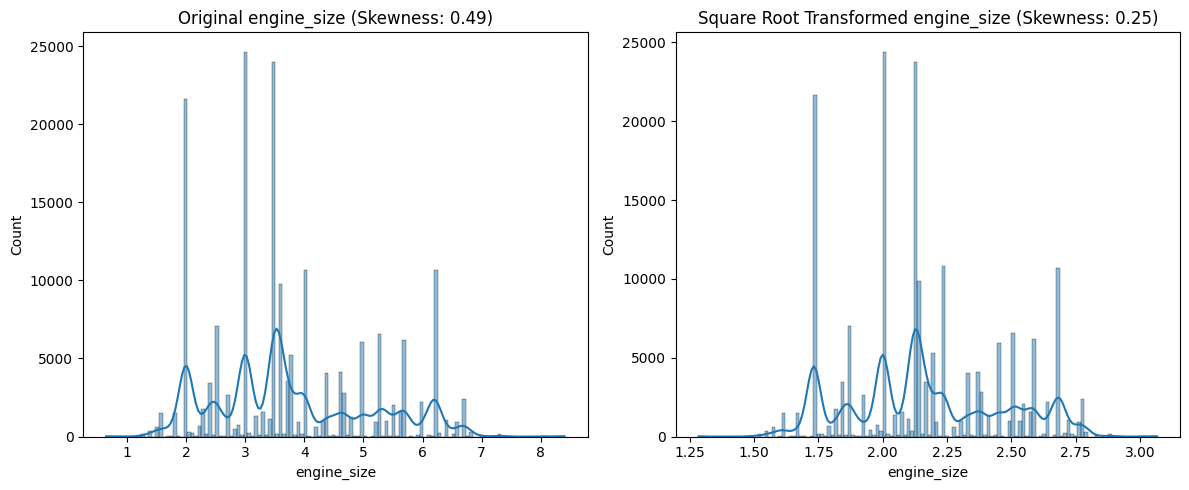

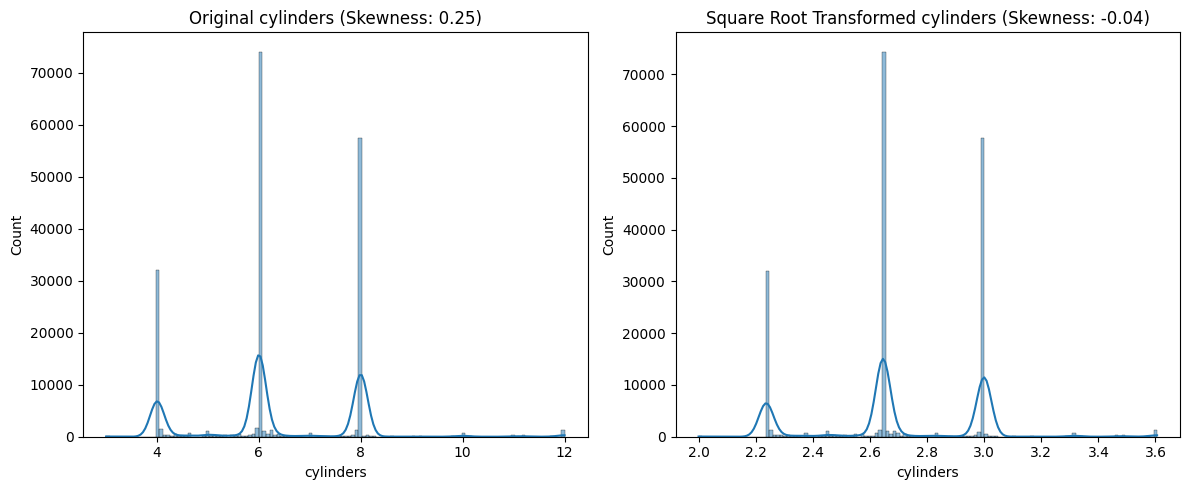

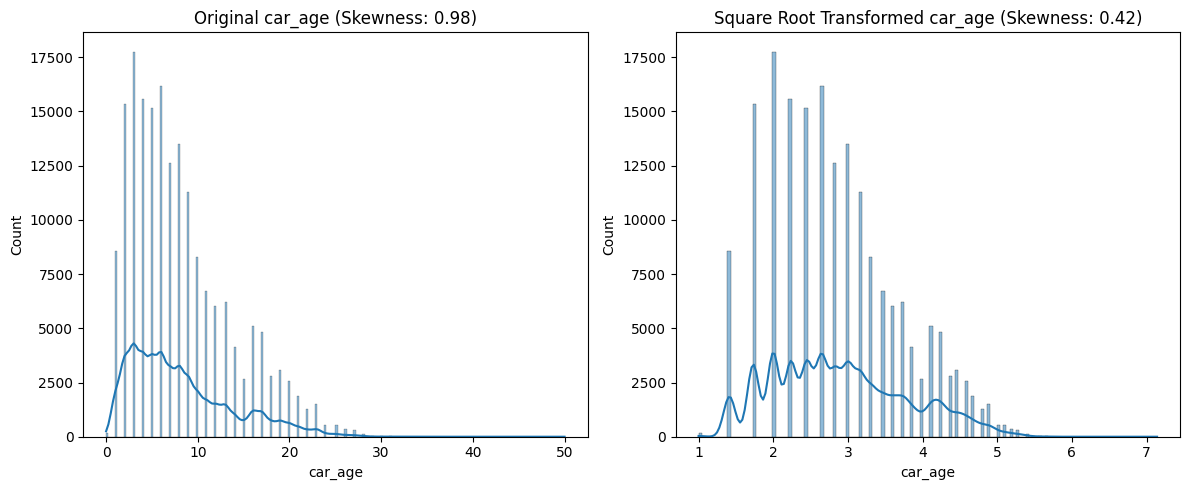

In [ ]:
for column in numeric_columns:
    original_data = df[column]

    # Apply square root transformation (ensure values are positive)
    transformed_data = np.sqrt(original_data + 1)  # Add 1 to avoid sqrt(0)

    # Plot before and after square root transformation
    plot_transformation(
        original_data,
        transformed_data,
        f'Original {column} (Skewness: {skew(original_data):.2f})',
        f'Square Root Transformed {column} (Skewness: {skew(transformed_data):.2f})'
    )


Cube Root Transformation

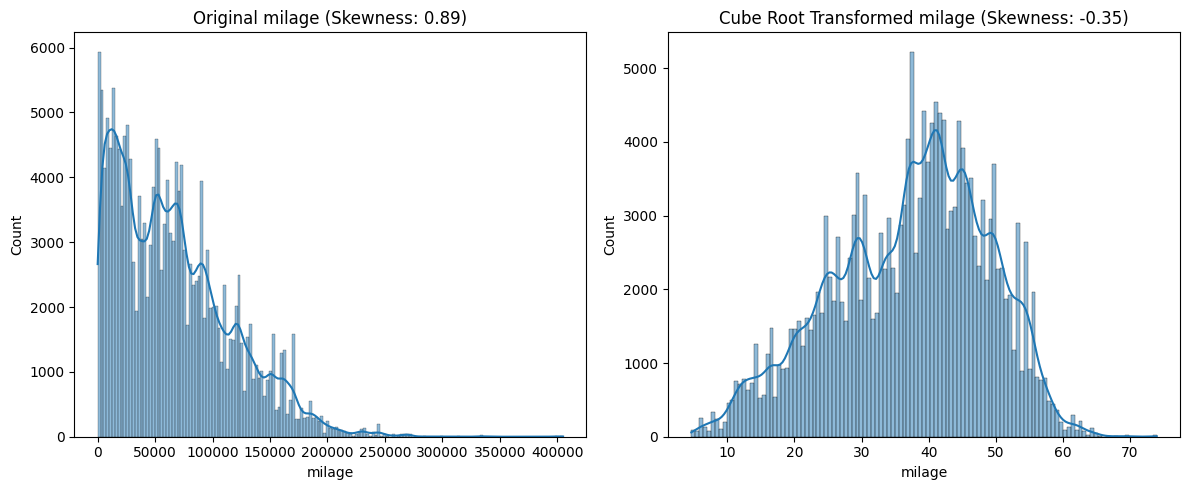

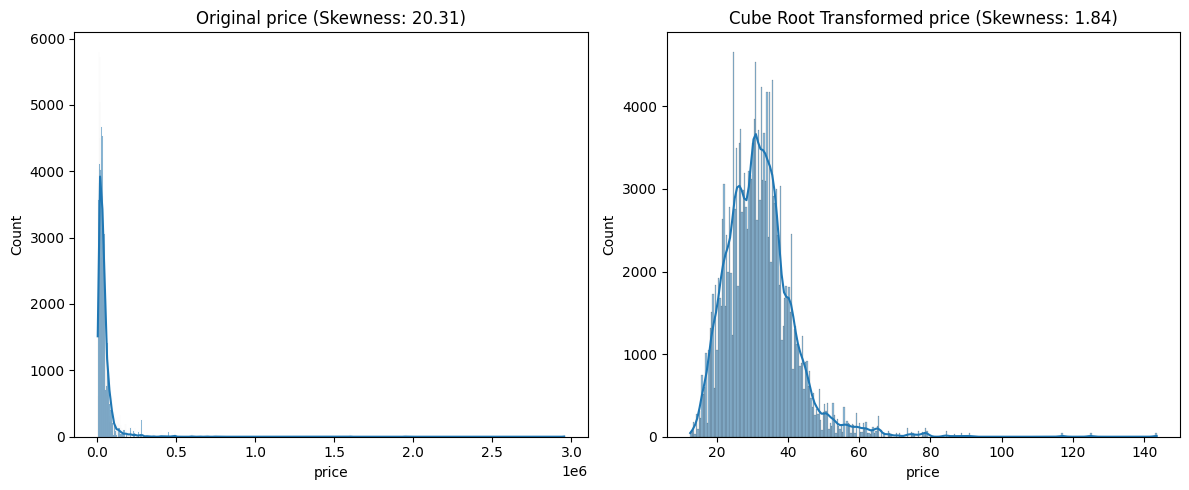

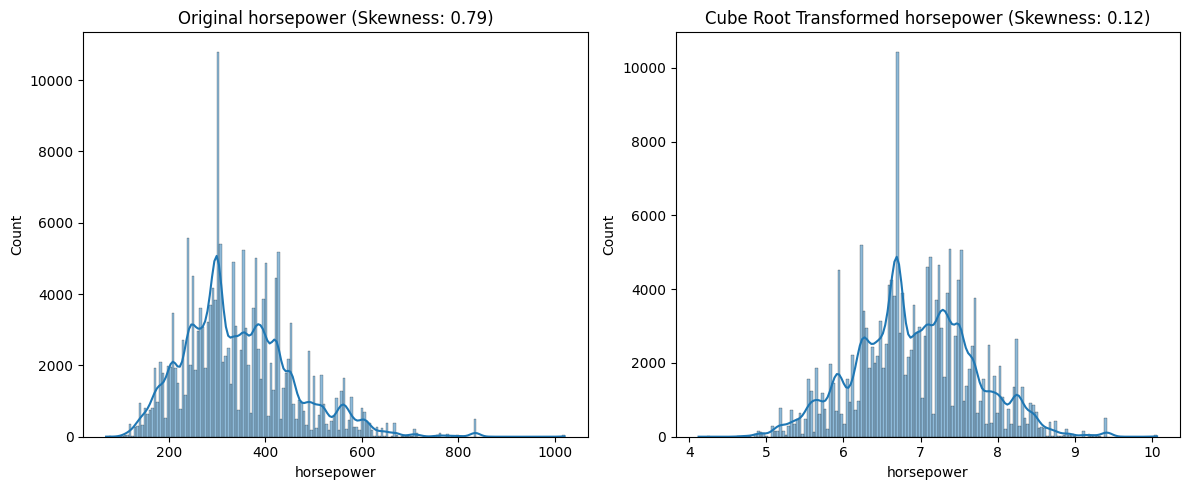

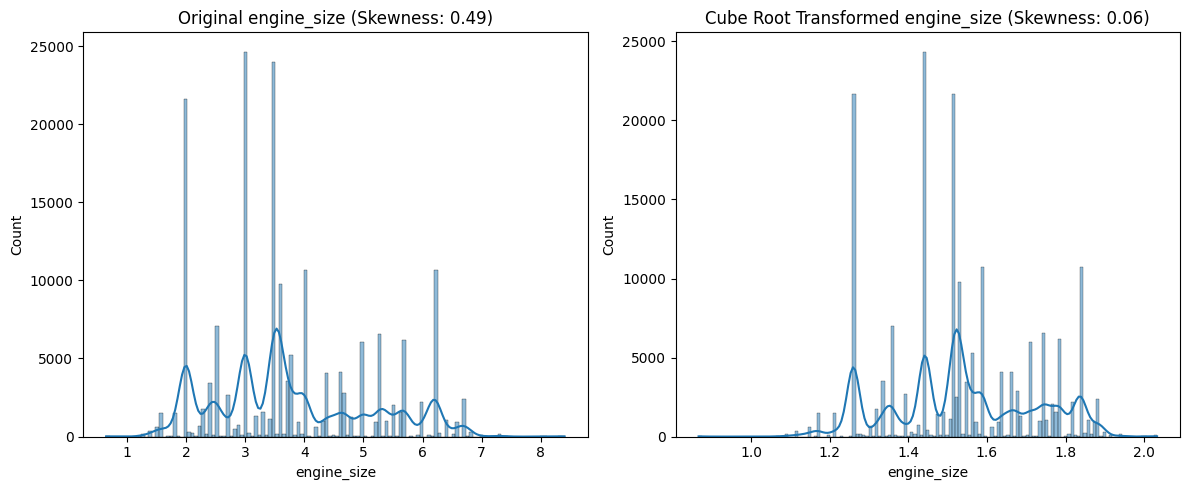

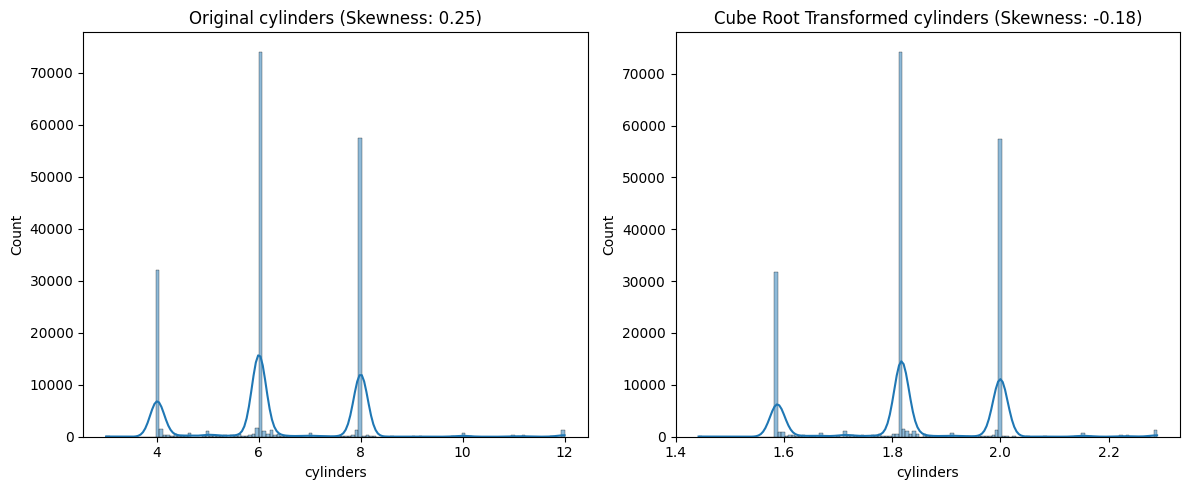

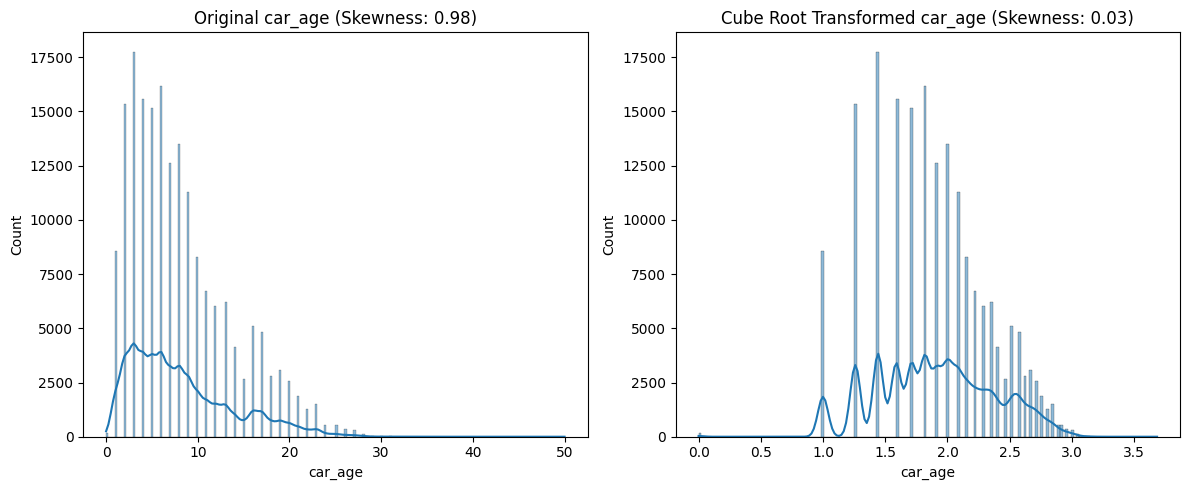

In [ ]:
for column in numeric_columns:
    original_data = df[column]

    # Apply cube root transformation (works with negative values)
    transformed_data = np.cbrt(original_data)

    # Plot before and after cube root transformation
    plot_transformation(
        original_data,
        transformed_data,
        f'Original {column} (Skewness: {skew(original_data):.2f})',
        f'Cube Root Transformed {column} (Skewness: {skew(transformed_data):.2f})'
    )


Log only better graph

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Optional: Set Seaborn style for better aesthetics
sns.set(style="whitegrid", palette="muted")


In [ ]:
def plot_transformation(original, transformed, column_name):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot for original data
    sns.histplot(original, ax=axes[0], kde=True, color='skyblue', bins=30, stat="density")
    sns.kdeplot(original, ax=axes[0], color='blue', lw=2)
    axes[0].set_title(f'Original {column_name} (Skewness: {skew(original):.2f})', fontsize=14)
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel('Density')

    # Plot for log-transformed data
    sns.histplot(transformed, ax=axes[1], kde=True, color='lightcoral', bins=30, stat="density")
    sns.kdeplot(transformed, ax=axes[1], color='red', lw=2)
    axes[1].set_title(f'Log Transformed {column_name} (Skewness: {skew(transformed):.2f})', fontsize=14)
    axes[1].set_xlabel(f'Log({column_name})')
    axes[1].set_ylabel('Density')

    # Tight layout to avoid overlap
    plt.tight_layout()
    plt.show()


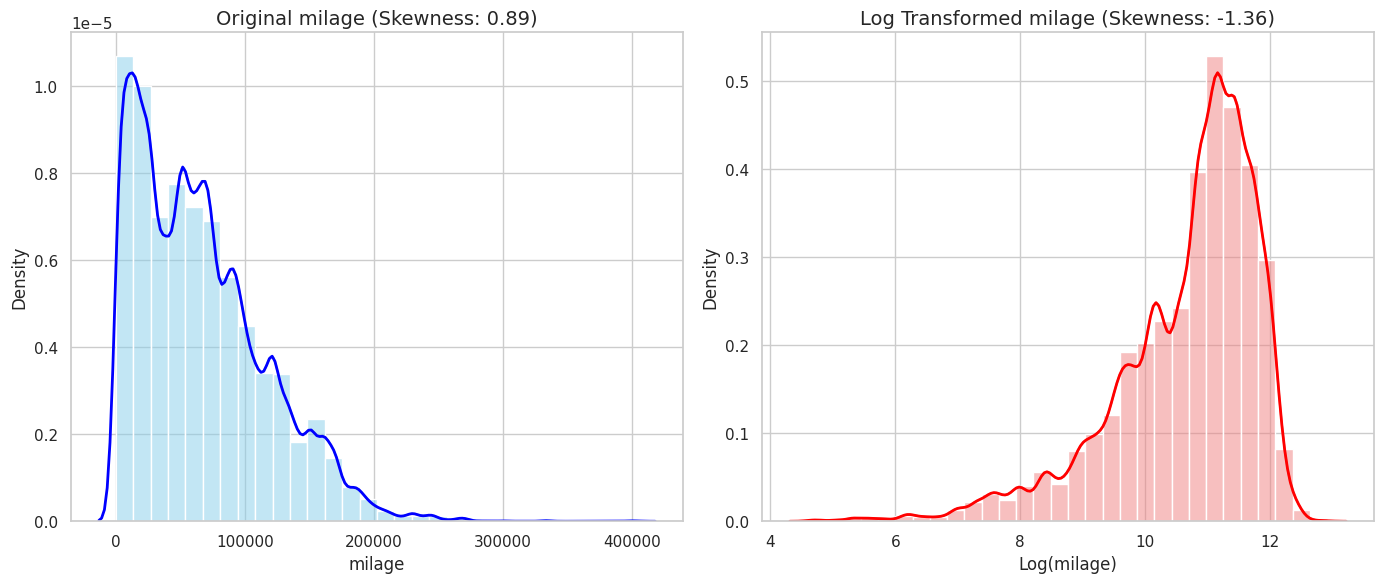

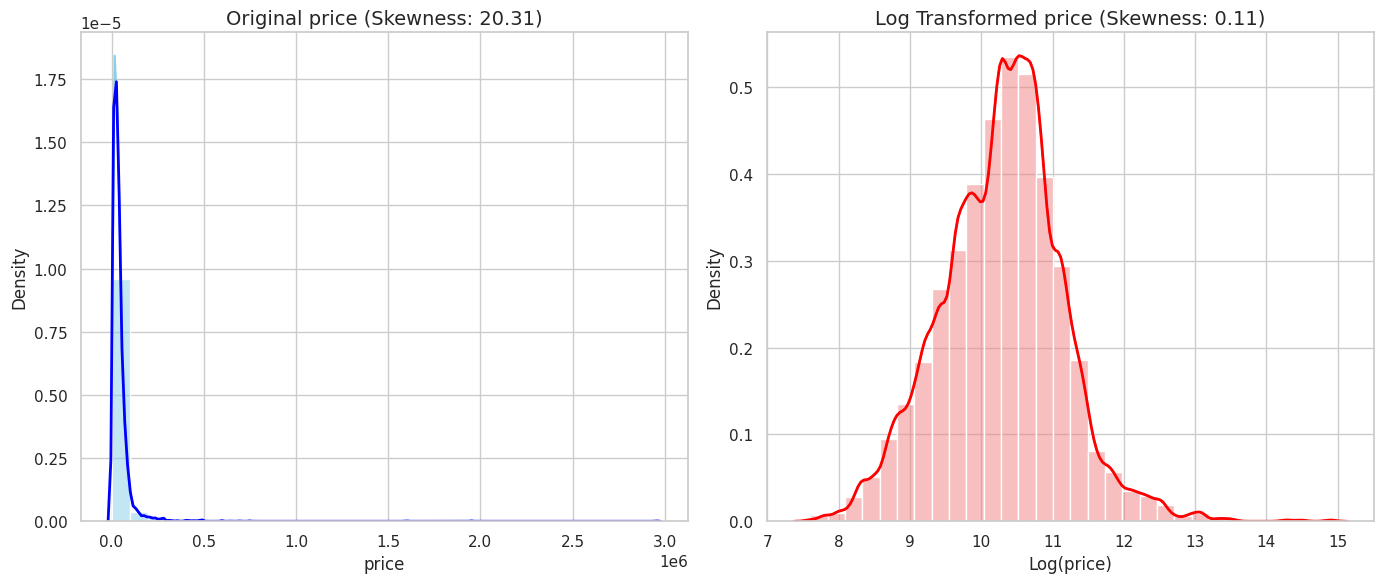

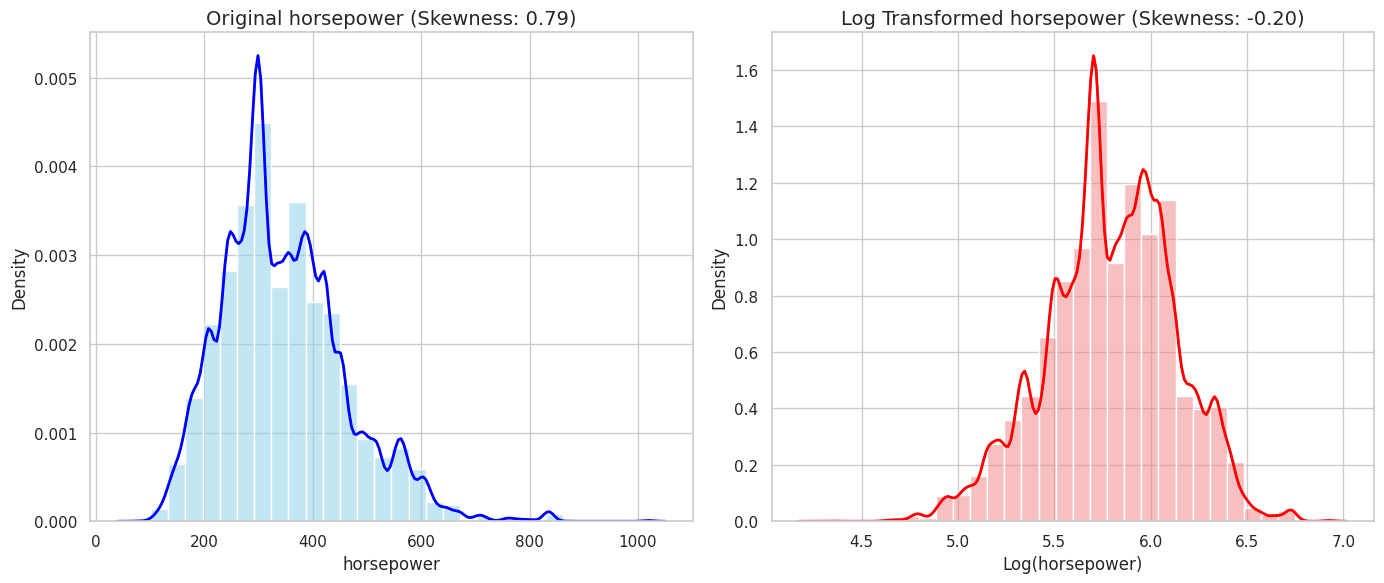

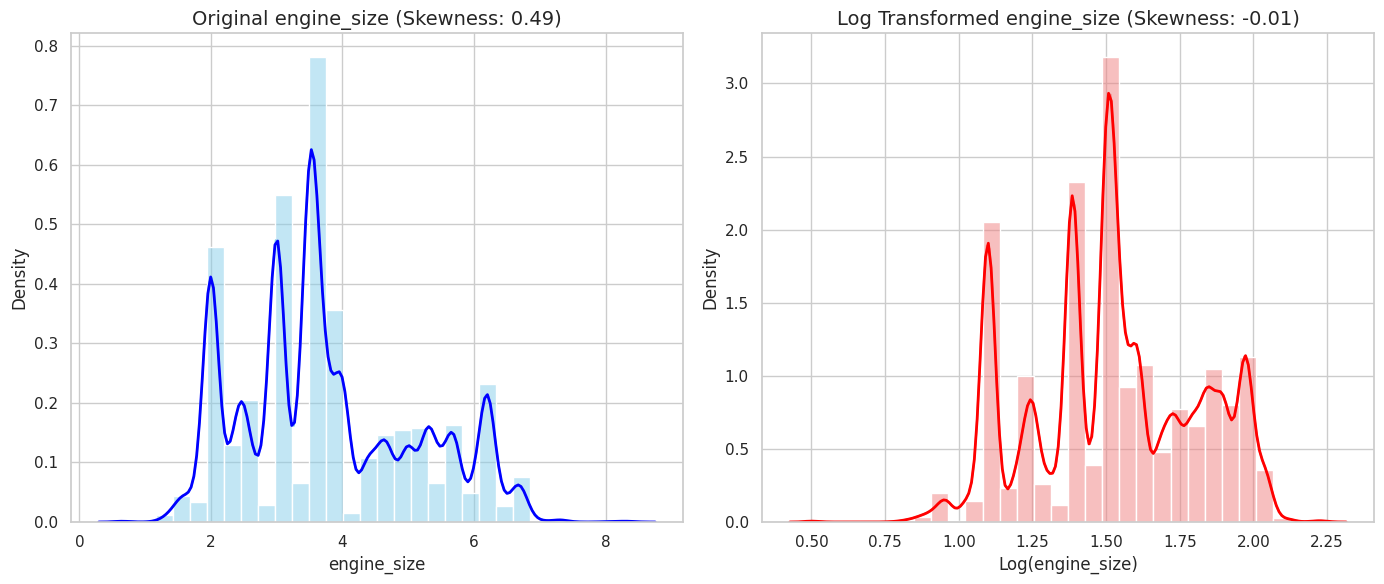

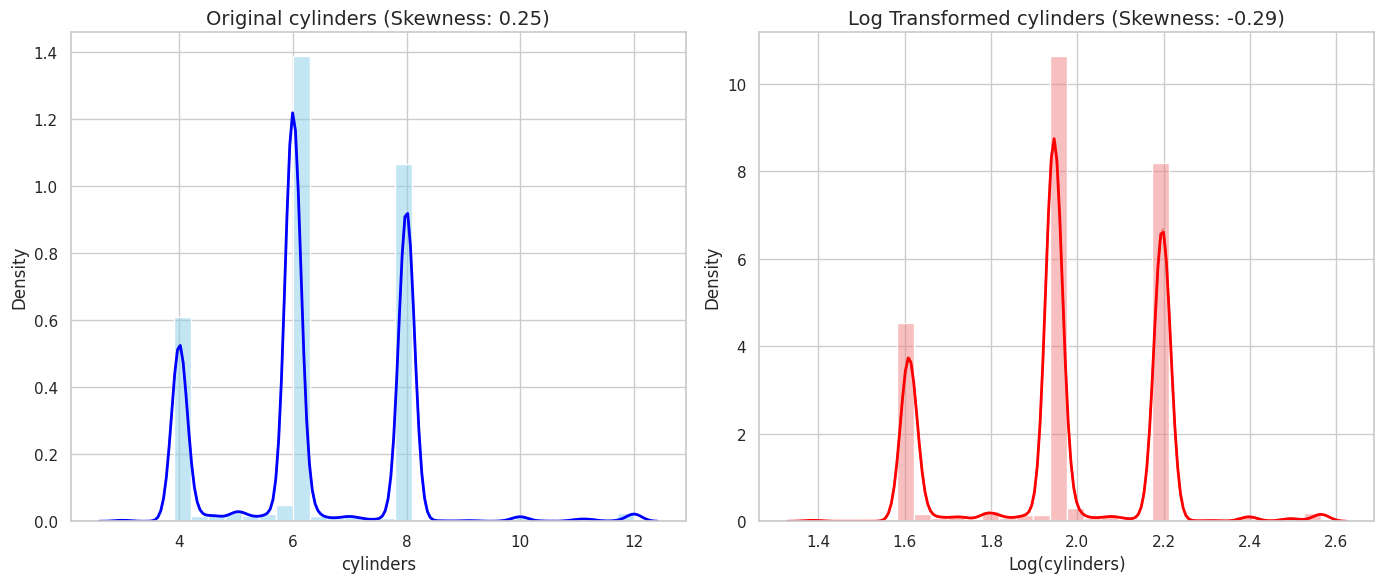

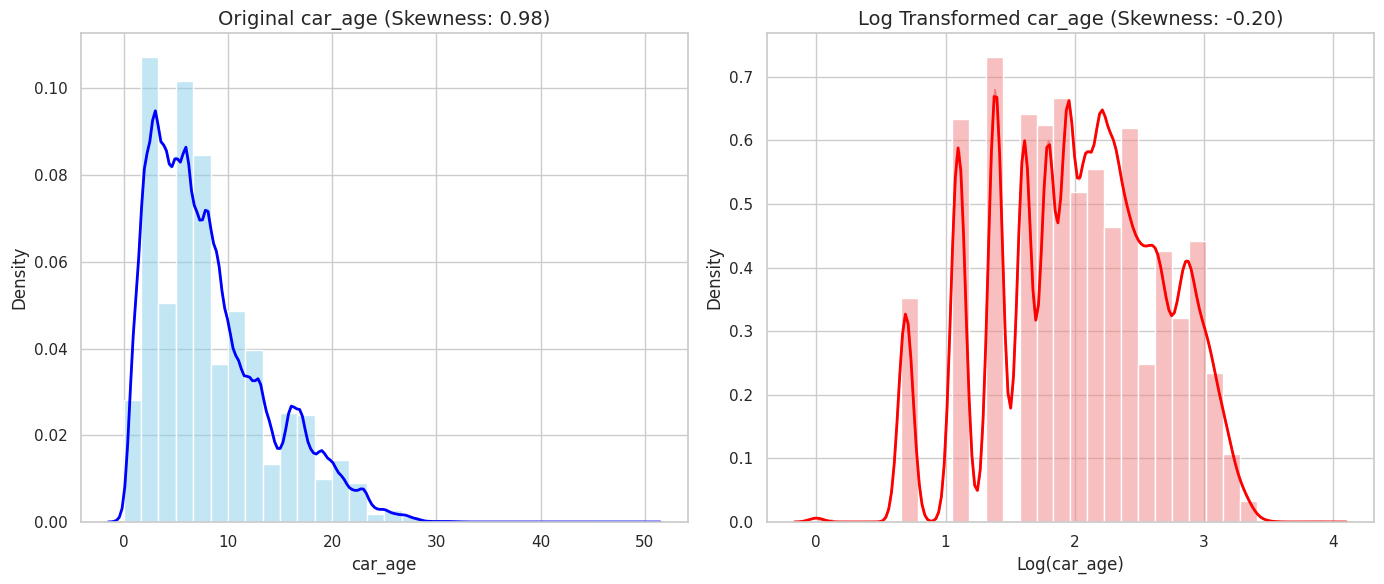

In [ ]:
numeric_columns = ['milage', 'price', 'horsepower', 'engine_size', 'cylinders', "car_age"]

for column in numeric_columns:
    original_data = df[column]

    # Apply log transformation (log(1 + x) to handle zero values)
    transformed_data = np.log1p(original_data)

    # Plot the comparison using the custom plot function
    plot_transformation(original_data, transformed_data, column)


In [ ]:
# Create copies of the original DataFrame for each method
df_zscore = df.copy()
df_iqr = df.copy()
df_dbscan = df.copy()
df_isoforest = df.copy()
df_lof = df.copy()
df_winsor = df.copy()
df_log = df.copy()

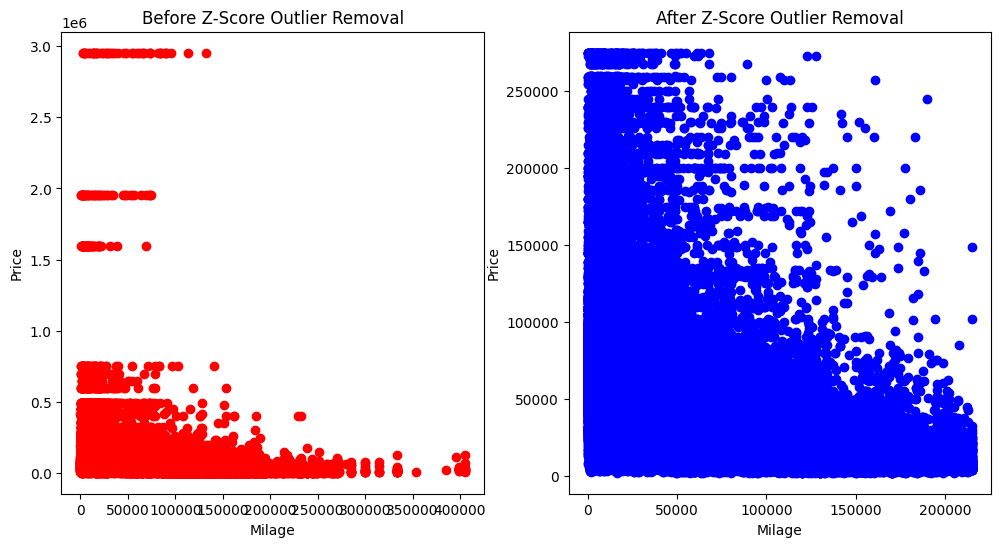

In [ ]:
from scipy import stats # Import the stats module from scipy

# Z-score method for 'milage' and 'price'
z_scores_milage = np.abs(stats.zscore(df_zscore['milage']))
z_scores_price = np.abs(stats.zscore(df_zscore['price']))

# Filter the data
df_zscore_clean = df_zscore[(z_scores_milage < 3) & (z_scores_price < 3)]

# Plot before and after removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df_zscore['milage'], df_zscore['price'], color='red', label='Outliers Present')
plt.title('Before Z-Score Outlier Removal')
plt.xlabel('Milage')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
plt.scatter(df_zscore_clean['milage'], df_zscore_clean['price'], color='blue', label='Outliers Removed')
plt.title('After Z-Score Outlier Removal')
plt.xlabel('Milage')
plt.ylabel('Price')
plt.show()


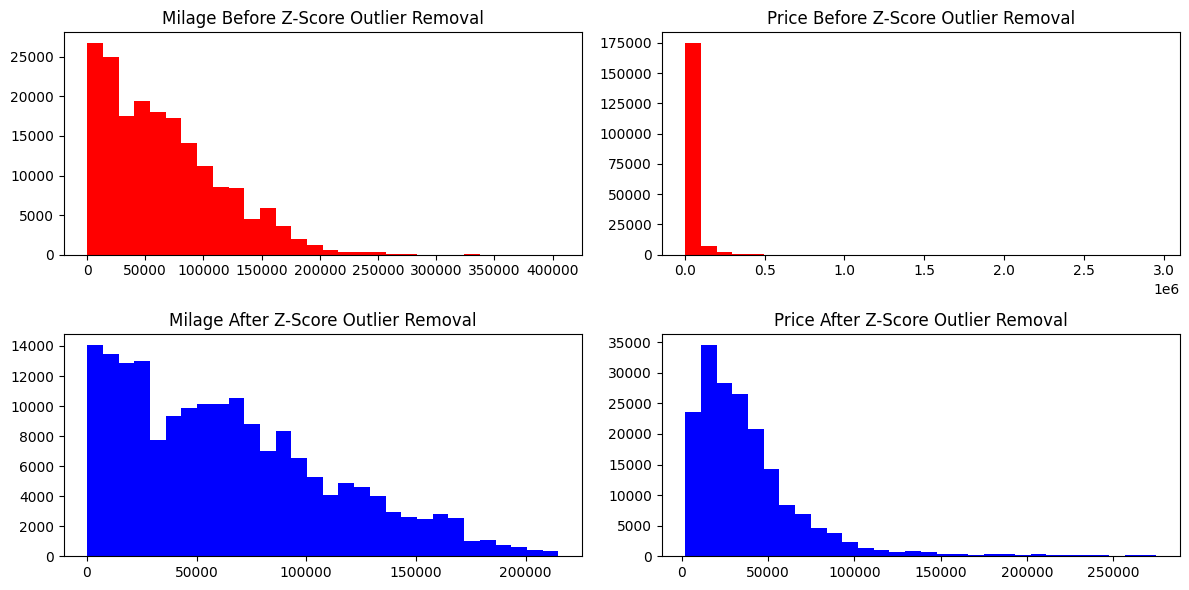

In [ ]:
# Plot histogram for milage and price before Z-Score method
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(df_zscore['milage'], bins=30, color='red')
plt.title('Milage Before Z-Score Outlier Removal')

plt.subplot(2, 2, 2)
plt.hist(df_zscore['price'], bins=30, color='red')
plt.title('Price Before Z-Score Outlier Removal')

# Plot histogram for milage and price after Z-Score method
plt.subplot(2, 2, 3)
plt.hist(df_zscore_clean['milage'], bins=30, color='blue')
plt.title('Milage After Z-Score Outlier Removal')

plt.subplot(2, 2, 4)
plt.hist(df_zscore_clean['price'], bins=30, color='blue')
plt.title('Price After Z-Score Outlier Removal')

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import skew

# Check skewness after Z-Score method
milage_skewness_zscore = skew(df_zscore_clean['milage'])
price_skewness_zscore = skew(df_zscore_clean['price'])

print(f"Skewness of milage after Z-Score outlier removal: {milage_skewness_zscore}")
print(f"Skewness of price after Z-Score outlier removal: {price_skewness_zscore}")


Skewness of milage after Z-Score outlier removal: 0.696529265313628
Skewness of price after Z-Score outlier removal: 2.72007174482458


In [ ]:
# Log Transformation
# Log Transformation after Z-Score outlier removal
df_zscore_clean['milage_log'] = np.log(df_zscore_clean['milage'] + 1)
df_zscore_clean['price_log'] = np.log(df_zscore_clean['price'] + 1)

# Check skewness after log transformation
milage_skewness_zscore_log = skew(df_zscore_clean['milage_log'])
price_skewness_zscore_log = skew(df_zscore_clean['price_log'])

print(f"Skewness of milage after Z-Score + Log Transformation: {milage_skewness_zscore_log}")
print(f"Skewness of price after Z-Score + Log Transformation: {price_skewness_zscore_log}")


Skewness of milage after Z-Score + Log Transformation: -1.3878222626136898
Skewness of price after Z-Score + Log Transformation: -0.1627308383821805


<ipython-input-55-2e8eb7e4f95c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zscore_clean['milage_log'] = np.log(df_zscore_clean['milage'] + 1)
<ipython-input-55-2e8eb7e4f95c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zscore_clean['price_log'] = np.log(df_zscore_clean['price'] + 1)


In [ ]:
# Square Root Transformation
df_zscore_clean['milage_sqrt'] = np.sqrt(df_zscore_clean['milage'])
df_zscore_clean['price_sqrt'] = np.sqrt(df_zscore_clean['price'])

# Check skewness after square root transformation
milage_skewness_zscore_sqrt = skew(df_zscore_clean['milage_sqrt'])
price_skewness_zscore_sqrt = skew(df_zscore_clean['price_sqrt'])

print(f"Skewness of milage after Z-Score + Square Root: {milage_skewness_zscore_sqrt}")
print(f"Skewness of price after Z-Score + Square Root: {price_skewness_zscore_sqrt}")


Skewness of milage after Z-Score + Square Root: -0.06518476370787986
Skewness of price after Z-Score + Square Root: 1.1233189517797821


<ipython-input-56-2a828b8f4908>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zscore_clean['milage_sqrt'] = np.sqrt(df_zscore_clean['milage'])
<ipython-input-56-2a828b8f4908>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zscore_clean['price_sqrt'] = np.sqrt(df_zscore_clean['price'])


In [ ]:
from scipy.stats import boxcox
# Box-Cox Transformation
df_zscore_clean['milage_boxcox'], milage_lambda_zscore = boxcox(df_zscore_clean['milage'] + 1)
df_zscore_clean['price_boxcox'], price_lambda_zscore = boxcox(df_zscore_clean['price'] + 1)

# Check skewness after Box-Cox transformation
milage_skewness_zscore_boxcox = skew(df_zscore_clean['milage_boxcox'])
price_skewness_zscore_boxcox = skew(df_zscore_clean['price_boxcox'])

print(f"Skewness of milage after Z-Score + Box-Cox: {milage_skewness_zscore_boxcox}")
print(f"Skewness of price after Z-Score + Box-Cox: {price_skewness_zscore_boxcox}")


<ipython-input-57-be3daa74f435>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zscore_clean['milage_boxcox'], milage_lambda_zscore = boxcox(df_zscore_clean['milage'] + 1)


Skewness of milage after Z-Score + Box-Cox: -0.15097300912377196
Skewness of price after Z-Score + Box-Cox: -5.449219478083393e-05


<ipython-input-57-be3daa74f435>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zscore_clean['price_boxcox'], price_lambda_zscore = boxcox(df_zscore_clean['price'] + 1)


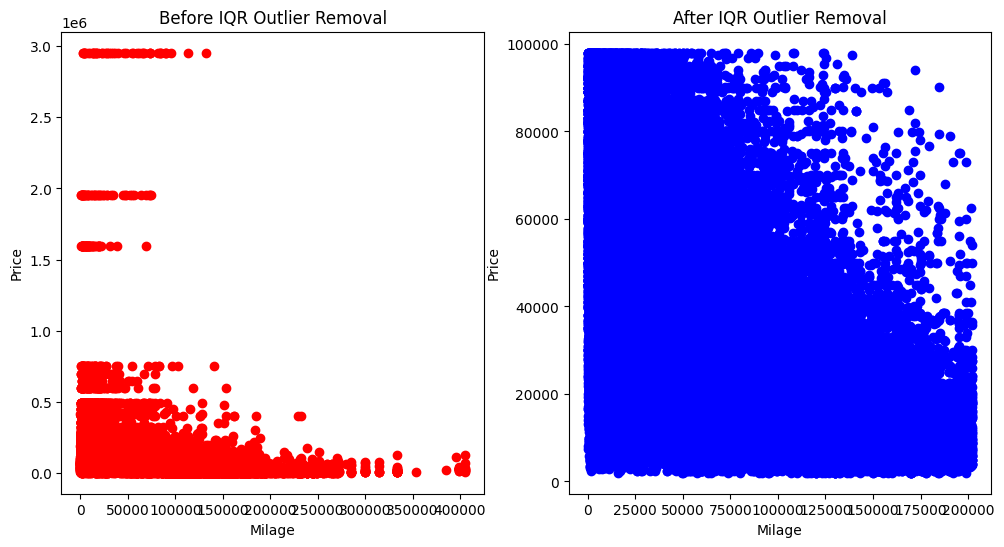

In [ ]:
# IQR Method
Q1_milage = df_iqr['milage'].quantile(0.25)
Q3_milage = df_iqr['milage'].quantile(0.75)
IQR_milage = Q3_milage - Q1_milage

Q1_price = df_iqr['price'].quantile(0.25)
Q3_price = df_iqr['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Filter data based on IQR
df_iqr_clean = df_iqr[
    (df_iqr['milage'] >= Q1_milage - 1.5 * IQR_milage) &
    (df_iqr['milage'] <= Q3_milage + 1.5 * IQR_milage) &
    (df_iqr['price'] >= Q1_price - 1.5 * IQR_price) &
    (df_iqr['price'] <= Q3_price + 1.5 * IQR_price)
]

# Plot before and after removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df_iqr['milage'], df_iqr['price'], color='red', label='Outliers Present')
plt.title('Before IQR Outlier Removal')
plt.xlabel('Milage')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
plt.scatter(df_iqr_clean['milage'], df_iqr_clean['price'], color='blue', label='Outliers Removed')
plt.title('After IQR Outlier Removal')
plt.xlabel('Milage')
plt.ylabel('Price')
plt.show()


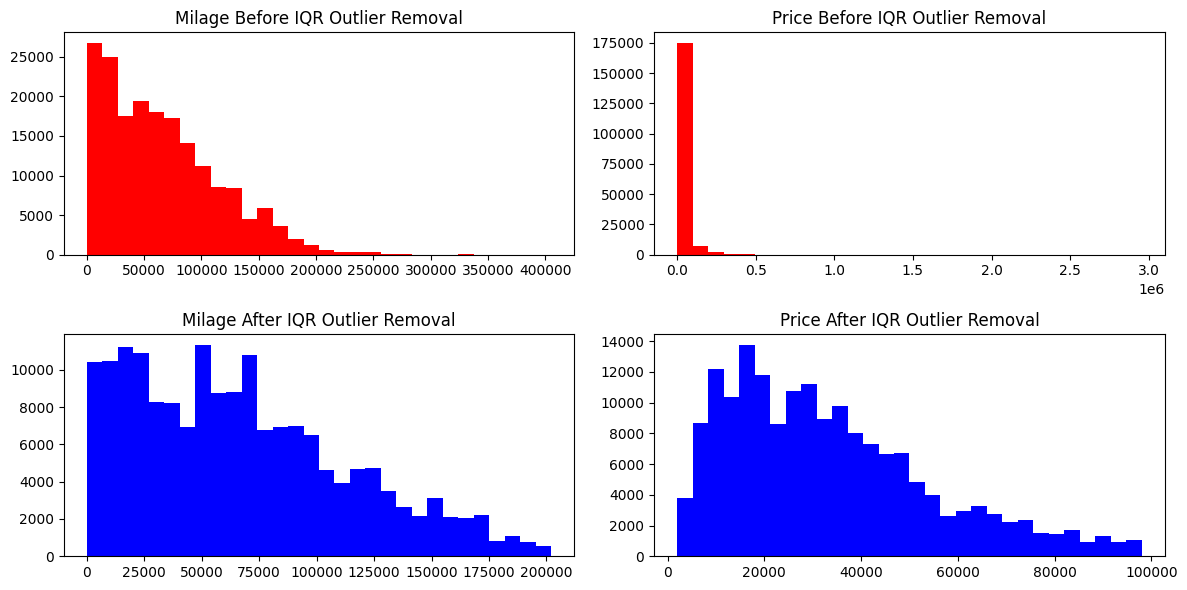

In [ ]:
# Plot histogram for milage and price before IQR method
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(df_iqr['milage'], bins=30, color='red')
plt.title('Milage Before IQR Outlier Removal')

plt.subplot(2, 2, 2)
plt.hist(df_iqr['price'], bins=30, color='red')
plt.title('Price Before IQR Outlier Removal')

# Plot histogram for milage and price after IQR method
plt.subplot(2, 2, 3)
plt.hist(df_iqr_clean['milage'], bins=30, color='blue')
plt.title('Milage After IQR Outlier Removal')

plt.subplot(2, 2, 4)
plt.hist(df_iqr_clean['price'], bins=30, color='blue')
plt.title('Price After IQR Outlier Removal')

plt.tight_layout()
plt.show()


In [ ]:
# Check skewness after IQR method
milage_skewness_iqr = skew(df_iqr_clean['milage'])
price_skewness_iqr = skew(df_iqr_clean['price'])

print(f"Skewness of milage after IQR outlier removal: {milage_skewness_iqr}")
print(f"Skewness of price after IQR outlier removal: {price_skewness_iqr}")


Skewness of milage after IQR outlier removal: 0.6263206402214737
Skewness of price after IQR outlier removal: 0.8577695081201352


In [ ]:
# Log Transformation after IQR outlier removal
df_iqr_clean['milage_log'] = np.log(df_iqr_clean['milage'] + 1)
df_iqr_clean['price_log'] = np.log(df_iqr_clean['price'] + 1)

# Check skewness after log transformation
milage_skewness_iqr_log = skew(df_iqr_clean['milage_log'])
price_skewness_iqr_log = skew(df_iqr_clean['price_log'])

print(f"Skewness of milage after IQR + Log Transformation: {milage_skewness_iqr_log}")
print(f"Skewness of price after IQR + Log Transformation: {price_skewness_iqr_log}")


Skewness of milage after IQR + Log Transformation: -1.473077709910768
Skewness of price after IQR + Log Transformation: -0.5249406050702042


<ipython-input-61-427c25cf6c71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr_clean['milage_log'] = np.log(df_iqr_clean['milage'] + 1)
<ipython-input-61-427c25cf6c71>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr_clean['price_log'] = np.log(df_iqr_clean['price'] + 1)


In [ ]:
# Square Root Transformation
df_iqr_clean['milage_sqrt'] = np.sqrt(df_iqr_clean['milage'])
df_iqr_clean['price_sqrt'] = np.sqrt(df_iqr_clean['price'])

# Check skewness after square root transformation
milage_skewness_iqr_sqrt = skew(df_iqr_clean['milage_sqrt'])
price_skewness_iqr_sqrt = skew(df_iqr_clean['price_sqrt'])

print(f"Skewness of milage after IQR + Square Root: {milage_skewness_iqr_sqrt}")
print(f"Skewness of price after IQR + Square Root: {price_skewness_iqr_sqrt}")


Skewness of milage after IQR + Square Root: -0.12027692282713313
Skewness of price after IQR + Square Root: 0.2226377297472299


<ipython-input-62-50e4dd2b3f8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr_clean['milage_sqrt'] = np.sqrt(df_iqr_clean['milage'])
<ipython-input-62-50e4dd2b3f8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr_clean['price_sqrt'] = np.sqrt(df_iqr_clean['price'])


In [ ]:
# Box-Cox Transformation
df_iqr_clean['milage_boxcox'], milage_lambda_iqr = boxcox(df_iqr_clean['milage'] + 1)
df_iqr_clean['price_boxcox'], price_lambda_iqr = boxcox(df_iqr_clean['price'] + 1)

# Check skewness after Box-Cox transformation
milage_skewness_iqr_boxcox = skew(df_iqr_clean['milage_boxcox'])
price_skewness_iqr_boxcox = skew(df_iqr_clean['price_boxcox'])

print(f"Skewness of milage after IQR + Box-Cox: {milage_skewness_iqr_boxcox}")
print(f"Skewness of price after IQR + Box-Cox: {price_skewness_iqr_boxcox}")


<ipython-input-63-d14fa58c79d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr_clean['milage_boxcox'], milage_lambda_iqr = boxcox(df_iqr_clean['milage'] + 1)


Skewness of milage after IQR + Box-Cox: -0.1473874282027984
Skewness of price after IQR + Box-Cox: -0.04848220897866116


<ipython-input-63-d14fa58c79d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr_clean['price_boxcox'], price_lambda_iqr = boxcox(df_iqr_clean['price'] + 1)


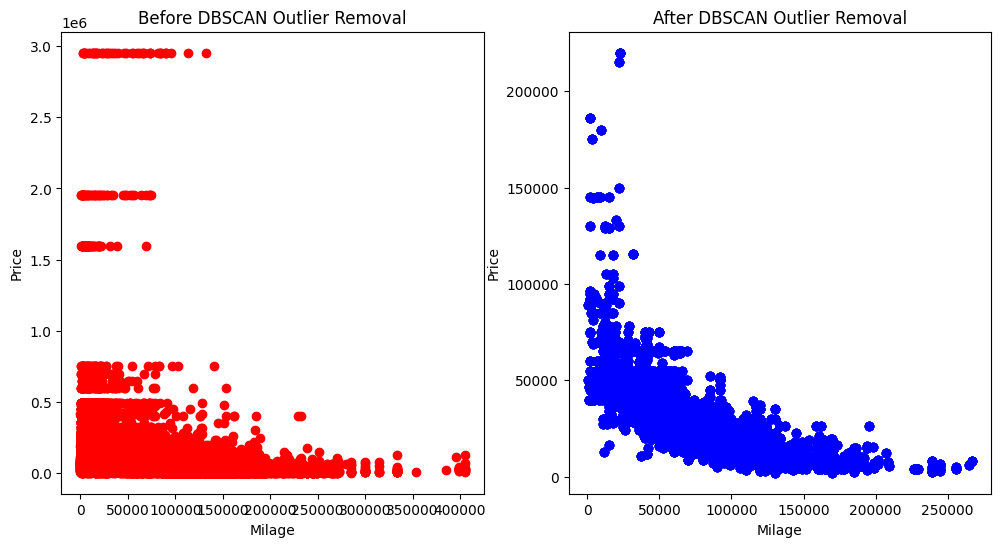

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN to detect outliers
X = df_dbscan[['milage', 'price']].values
db = DBSCAN(eps=0.5, min_samples=5).fit(X)

# Mark outliers as -1 and remove them
df_dbscan['outlier'] = db.labels_
df_dbscan_clean = df_dbscan[df_dbscan['outlier'] != -1]

# Plot before and after DBSCAN outlier removal
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df_dbscan['milage'], df_dbscan['price'], color='red', label='Outliers Present')
plt.title('Before DBSCAN Outlier Removal')
plt.xlabel('Milage')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
plt.scatter(df_dbscan_clean['milage'], df_dbscan_clean['price'], color='blue', label='Outliers Removed')
plt.title('After DBSCAN Outlier Removal')
plt.xlabel('Milage')
plt.ylabel('Price')
plt.show()


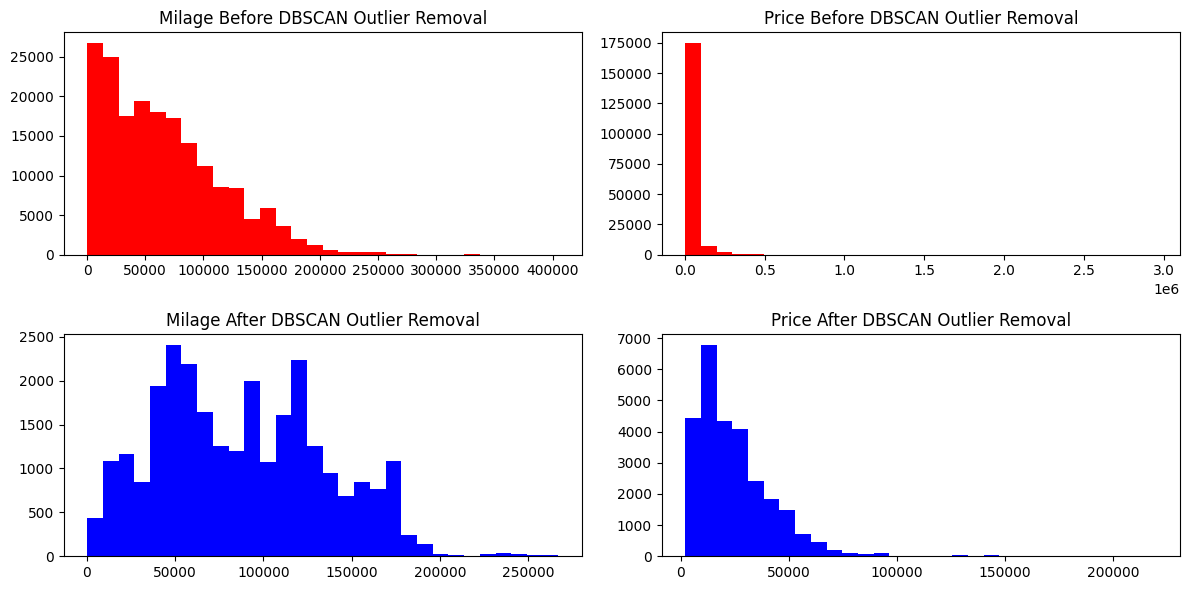

In [ ]:
# Plot histogram for milage and price before DBSCAN method
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(df_dbscan['milage'], bins=30, color='red')
plt.title('Milage Before DBSCAN Outlier Removal')

plt.subplot(2, 2, 2)
plt.hist(df_dbscan['price'], bins=30, color='red')
plt.title('Price Before DBSCAN Outlier Removal')

# Plot histogram for milage and price after DBSCAN method
plt.subplot(2, 2, 3)
plt.hist(df_dbscan_clean['milage'], bins=30, color='blue')
plt.title('Milage After DBSCAN Outlier Removal')

plt.subplot(2, 2, 4)
plt.hist(df_dbscan_clean['price'], bins=30, color='blue')
plt.title('Price After DBSCAN Outlier Removal')

plt.tight_layout()
plt.show()


In [ ]:
# Check skewness after DBSCAN method
milage_skewness_dbscan = skew(df_dbscan_clean['milage'])
price_skewness_dbscan = skew(df_dbscan_clean['price'])

print(f"Skewness of milage after DBSCAN outlier removal: {milage_skewness_dbscan}")
print(f"Skewness of price after DBSCAN outlier removal: {price_skewness_dbscan}")


Skewness of milage after DBSCAN outlier removal: 0.3275432988538247
Skewness of price after DBSCAN outlier removal: 2.5519153269565025


In [ ]:
# Log Transformation after DBSCAN outlier removal
df_dbscan_clean['milage_log'] = np.log(df_dbscan_clean['milage'] + 1)
df_dbscan_clean['price_log'] = np.log(df_dbscan_clean['price'] + 1)

# Check skewness after log transformation
milage_skewness_dbscan_log = skew(df_dbscan_clean['milage_log'])
price_skewness_dbscan_log = skew(df_dbscan_clean['price_log'])

print(f"Skewness of milage after DBSCAN + Log Transformation: {milage_skewness_dbscan_log}")
print(f"Skewness of price after DBSCAN + Log Transformation: {price_skewness_dbscan_log}")


Skewness of milage after DBSCAN + Log Transformation: -1.6085218170194635
Skewness of price after DBSCAN + Log Transformation: -0.12829233820754385


<ipython-input-67-1481dfab85f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dbscan_clean['milage_log'] = np.log(df_dbscan_clean['milage'] + 1)
<ipython-input-67-1481dfab85f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dbscan_clean['price_log'] = np.log(df_dbscan_clean['price'] + 1)


In [ ]:
# Square Root Transformation
df_dbscan_clean['milage_sqrt'] = np.sqrt(df_dbscan_clean['milage'])
df_dbscan_clean['price_sqrt'] = np.sqrt(df_dbscan_clean['price'])

# Check skewness after square root transformation
milage_skewness_dbscan_sqrt = skew(df_dbscan_clean['milage_sqrt'])
price_skewness_dbscan_sqrt = skew(df_dbscan_clean['price_sqrt'])

print(f"Skewness of milage after DBSCAN + Square Root: {milage_skewness_dbscan_sqrt}")
print(f"Skewness of price after DBSCAN + Square Root: {price_skewness_dbscan_sqrt}")


Skewness of milage after DBSCAN + Square Root: -0.30325321837825797
Skewness of price after DBSCAN + Square Root: 0.843736112195919


<ipython-input-68-e1557278f48e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dbscan_clean['milage_sqrt'] = np.sqrt(df_dbscan_clean['milage'])
<ipython-input-68-e1557278f48e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dbscan_clean['price_sqrt'] = np.sqrt(df_dbscan_clean['price'])


In [ ]:
# Box-Cox Transformation
df_dbscan_clean['milage_boxcox'], milage_lambda_dbscan = boxcox(df_dbscan_clean['milage'] + 1)
df_dbscan_clean['price_boxcox'], price_lambda_dbscan = boxcox(df_dbscan_clean['price'] + 1)

# Check skewness after Box-Cox transformation
milage_skewness_dbscan_boxcox = skew(df_dbscan_clean['milage_boxcox'])
price_skewness_dbscan_boxcox = skew(df_dbscan_clean['price_boxcox'])

print(f"Skewness of milage after DBSCAN + Box-Cox: {milage_skewness_dbscan_boxcox}")
print(f"Skewness of price after DBSCAN + Box-Cox: {price_skewness_dbscan_boxcox}")


<ipython-input-69-5570303100ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dbscan_clean['milage_boxcox'], milage_lambda_dbscan = boxcox(df_dbscan_clean['milage'] + 1)


Skewness of milage after DBSCAN + Box-Cox: -0.11348589225802279
Skewness of price after DBSCAN + Box-Cox: -0.006255522137823384


<ipython-input-69-5570303100ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dbscan_clean['price_boxcox'], price_lambda_dbscan = boxcox(df_dbscan_clean['price'] + 1)


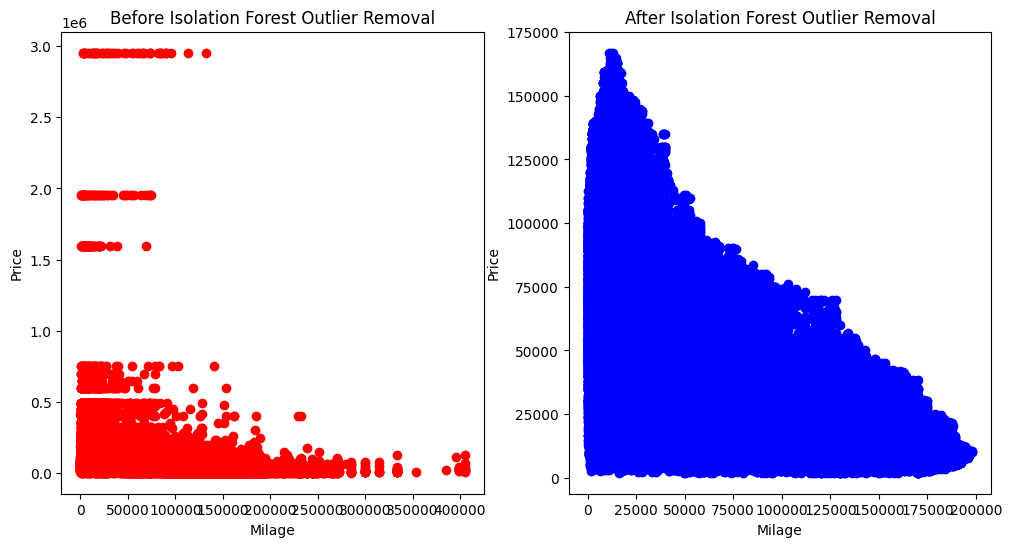

In [ ]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest to detect outliers
iso_forest = IsolationForest(contamination=0.05)
outliers = iso_forest.fit_predict(df_isoforest[['milage', 'price']])

# Filter non-outliers (label 1) and outliers (-1)
df_isoforest_clean = df_isoforest[outliers == 1]

# Plot before and after Isolation Forest outlier removal
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df_isoforest['milage'], df_isoforest['price'], color='red', label='Outliers Present')
plt.title('Before Isolation Forest Outlier Removal')
plt.xlabel('Milage')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
plt.scatter(df_isoforest_clean['milage'], df_isoforest_clean['price'], color='blue', label='Outliers Removed')
plt.title('After Isolation Forest Outlier Removal')
plt.xlabel('Milage')
plt.ylabel('Price')
plt.show()


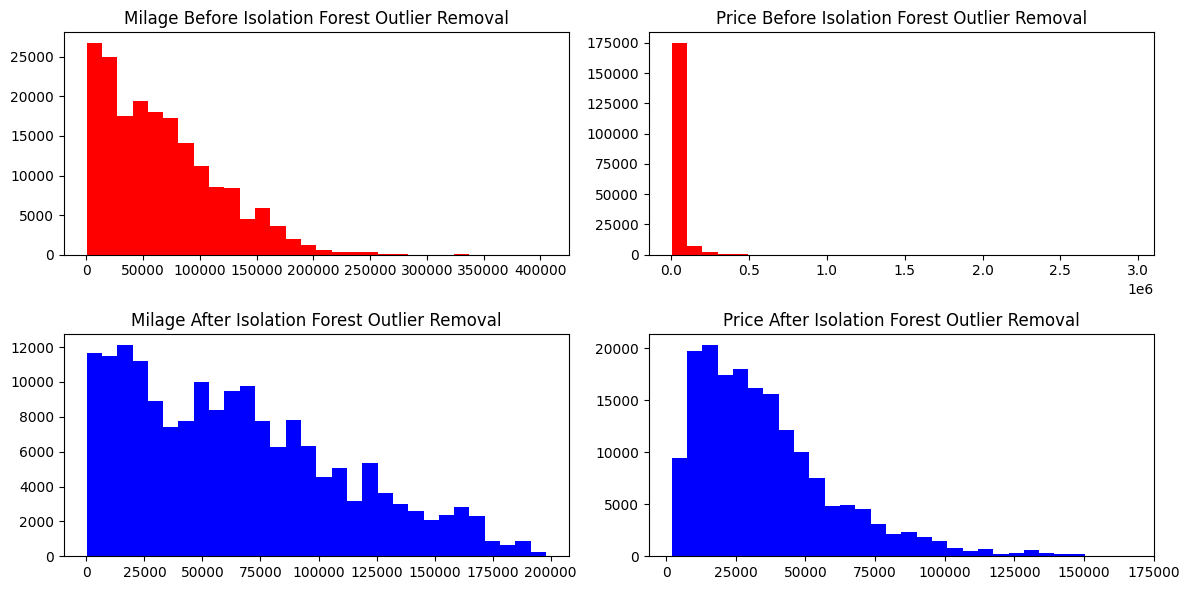

In [ ]:
# Plot histogram for milage and price before Isolation Forest method
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(df_isoforest['milage'], bins=30, color='red')
plt.title('Milage Before Isolation Forest Outlier Removal')

plt.subplot(2, 2, 2)
plt.hist(df_isoforest['price'], bins=30, color='red')
plt.title('Price Before Isolation Forest Outlier Removal')

# Plot histogram for milage and price after Isolation Forest method
plt.subplot(2, 2, 3)
plt.hist(df_isoforest_clean['milage'], bins=30, color='blue')
plt.title('Milage After Isolation Forest Outlier Removal')

plt.subplot(2, 2, 4)
plt.hist(df_isoforest_clean['price'], bins=30, color='blue')
plt.title('Price After Isolation Forest Outlier Removal')

plt.tight_layout()
plt.show()


In [ ]:
# Check skewness after Isolation Forest method
milage_skewness_isoforest = skew(df_isoforest_clean['milage'])
price_skewness_isoforest = skew(df_isoforest_clean['price'])

print(f"Skewness of milage after Isolation Forest outlier removal: {milage_skewness_isoforest}")
print(f"Skewness of price after Isolation Forest outlier removal: {price_skewness_isoforest}")


Skewness of milage after Isolation Forest outlier removal: 0.6174432771533244
Skewness of price after Isolation Forest outlier removal: 1.3759017815899368


In [ ]:
# Log Transformation after Isolation Forest outlier removal
df_isoforest_clean['milage_log'] = np.log(df_isoforest_clean['milage'] + 1)
df_isoforest_clean['price_log'] = np.log(df_isoforest_clean['price'] + 1)

# Check skewness after log transformation
milage_skewness_isoforest_log = skew(df_isoforest_clean['milage_log'])
price_skewness_isoforest_log = skew(df_isoforest_clean['price_log'])

print(f"Skewness of milage after Isolation Forest + Log Transformation: {milage_skewness_isoforest_log}")
print(f"Skewness of price after Isolation Forest + Log Transformation: {price_skewness_isoforest_log}")


Skewness of milage after Isolation Forest + Log Transformation: -1.4069077449586667
Skewness of price after Isolation Forest + Log Transformation: -0.394759072717922


<ipython-input-73-a7f7368092b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_isoforest_clean['milage_log'] = np.log(df_isoforest_clean['milage'] + 1)
<ipython-input-73-a7f7368092b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_isoforest_clean['price_log'] = np.log(df_isoforest_clean['price'] + 1)


In [ ]:
# Square Root Transformation
df_isoforest_clean['milage_sqrt'] = np.sqrt(df_isoforest_clean['milage'])
df_isoforest_clean['price_sqrt'] = np.sqrt(df_isoforest_clean['price'])

# Check skewness after square root transformation
milage_skewness_isoforest_sqrt = skew(df_isoforest_clean['milage_sqrt'])
price_skewness_isoforest_sqrt = skew(df_isoforest_clean['price_sqrt'])

print(f"Skewness of milage after Isolation Forest + Square Root: {milage_skewness_isoforest_sqrt}")
print(f"Skewness of price after Isolation Forest + Square Root: {price_skewness_isoforest_sqrt}")


Skewness of milage after Isolation Forest + Square Root: -0.10817293925248994
Skewness of price after Isolation Forest + Square Root: 0.494138249310161


<ipython-input-74-a4e37fa4602f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_isoforest_clean['milage_sqrt'] = np.sqrt(df_isoforest_clean['milage'])
<ipython-input-74-a4e37fa4602f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_isoforest_clean['price_sqrt'] = np.sqrt(df_isoforest_clean['price'])


In [ ]:
# Box-Cox Transformation
df_isoforest_clean['milage_boxcox'], milage_lambda_isoforest = boxcox(df_isoforest_clean['milage'] + 1)
df_isoforest_clean['price_boxcox'], price_lambda_isoforest = boxcox(df_isoforest_clean['price'] + 1)

# Check skewness after Box-Cox transformation
milage_skewness_isoforest_boxcox = skew(df_isoforest_clean['milage_boxcox'])
price_skewness_isoforest_boxcox = skew(df_isoforest_clean['price_boxcox'])

print(f"Skewness of milage after Isolation Forest + Box-Cox: {milage_skewness_isoforest_boxcox}")
print(f"Skewness of price after Isolation Forest + Box-Cox: {price_skewness_isoforest_boxcox}")


<ipython-input-75-a61659b3b008>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_isoforest_clean['milage_boxcox'], milage_lambda_isoforest = boxcox(df_isoforest_clean['milage'] + 1)


Skewness of milage after Isolation Forest + Box-Cox: -0.15531298933196866
Skewness of price after Isolation Forest + Box-Cox: -0.02139946531839132


<ipython-input-75-a61659b3b008>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_isoforest_clean['price_boxcox'], price_lambda_isoforest = boxcox(df_isoforest_clean['price'] + 1)


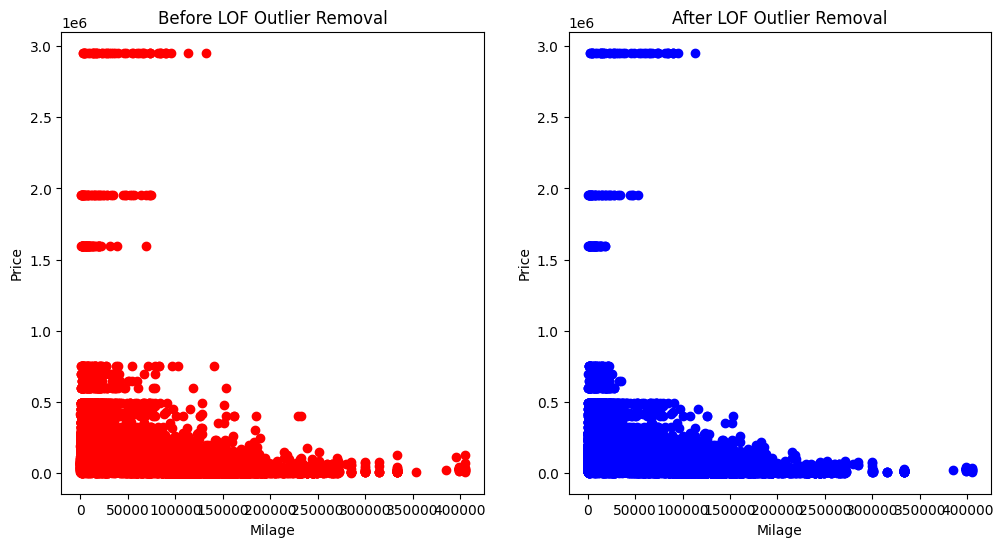

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Apply KNN (LOF) to detect outliers
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outliers = lof.fit_predict(df_lof[['milage', 'price']])

# Filter non-outliers (label 1)
df_lof_clean = df_lof[outliers == 1]

# Plot before and after LOF outlier removal
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df_lof['milage'], df_lof['price'], color='red', label='Outliers Present')
plt.title('Before LOF Outlier Removal')
plt.xlabel('Milage')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
plt.scatter(df_lof_clean['milage'], df_lof_clean['price'], color='blue', label='Outliers Removed')
plt.title('After LOF Outlier Removal')
plt.xlabel('Milage')
plt.ylabel('Price')
plt.show()


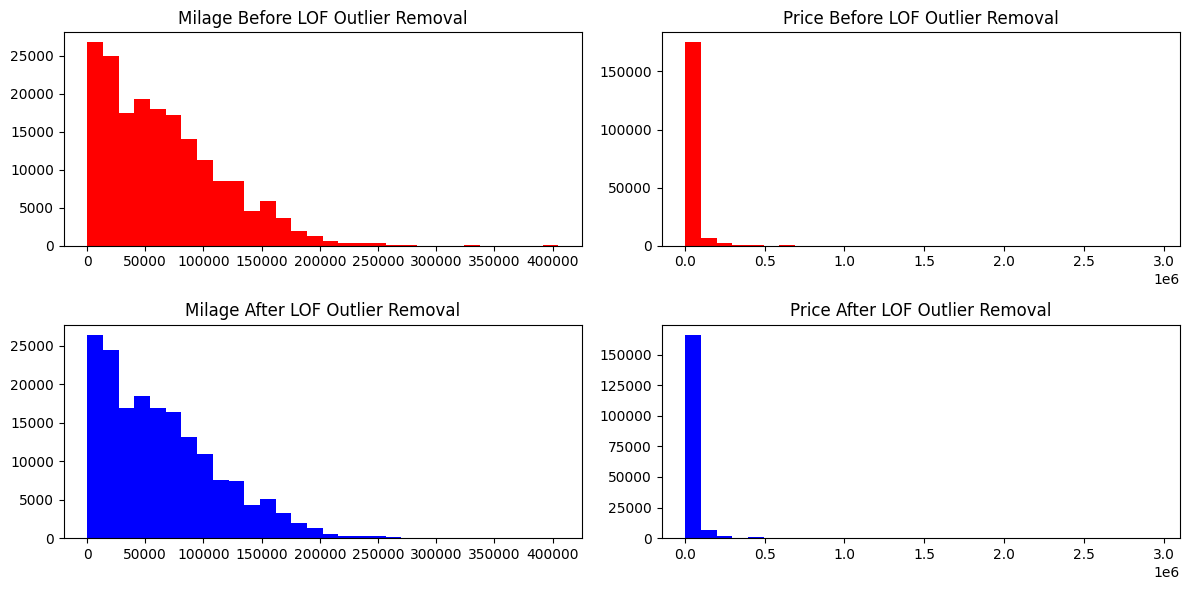

In [ ]:
# Plot histogram for milage and price before LOF method
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(df_lof['milage'], bins=30, color='red')
plt.title('Milage Before LOF Outlier Removal')

plt.subplot(2, 2, 2)
plt.hist(df_lof['price'], bins=30, color='red')
plt.title('Price Before LOF Outlier Removal')

# Plot histogram for milage and price after LOF method
plt.subplot(2, 2, 3)
plt.hist(df_lof_clean['milage'], bins=30, color='blue')
plt.title('Milage After LOF Outlier Removal')

plt.subplot(2, 2, 4)
plt.hist(df_lof_clean['price'], bins=30, color='blue')
plt.title('Price After LOF Outlier Removal')

plt.tight_layout()
plt.show()


In [ ]:
# Check skewness after LOF method
milage_skewness_lof = skew(df_lof_clean['milage'])
price_skewness_lof = skew(df_lof_clean['price'])

print(f"Skewness of milage after LOF outlier removal: {milage_skewness_lof}")
print(f"Skewness of price after LOF outlier removal: {price_skewness_lof}")


Skewness of milage after LOF outlier removal: 0.9285585023132292
Skewness of price after LOF outlier removal: 20.757977844748012


In [ ]:
# Log Transformation after LOF outlier removal

df_lof_clean['milage_log'] = np.log(df_lof_clean['milage'] + 1)
df_lof_clean['price_log'] = np.log(df_lof_clean['price'] + 1)

# Check skewness after log transformation
milage_skweness_lof_log = skew(df_lof_clean['milage_log'])
price_skewness_lof_log = skew(df_lof_clean['price_log'])

print(f"Skewness of milage after LOF + Log Transformation: {milage_skweness_lof_log}")
print(f"Skewness of price after LOF + Log Transformation: {price_skewness_lof_log}")

Skewness of milage after LOF + Log Transformation: -1.3185489210641432
Skewness of price after LOF + Log Transformation: 0.07652672364468537


<ipython-input-79-a562e9ecf4ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lof_clean['milage_log'] = np.log(df_lof_clean['milage'] + 1)
<ipython-input-79-a562e9ecf4ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lof_clean['price_log'] = np.log(df_lof_clean['price'] + 1)


In [ ]:
# Square Root transformation
df_lof_clean['milage_sqrt'] = np.sqrt(df_lof_clean['milage'])
df_lof_clean['price_sqrt'] = np.sqrt(df_lof_clean['price'])

# Check skewness after square root transformation
milage_skewness_lof_sqrt = skew(df_lof_clean['milage_sqrt'])
price_skewness_lof_sqrt = skew(df_lof_clean['price_sqrt'])

print(f"Skewness of milage after LOF + Square Root: {milage_skewness_lof_sqrt}")
print(f"Skewness of price after LOF + Square Root: {price_skewness_lof_sqrt}")

Skewness of milage after LOF + Square Root: 0.037963154098163844
Skewness of price after LOF + Square Root: 3.630235389426654


<ipython-input-80-4507049a40d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lof_clean['milage_sqrt'] = np.sqrt(df_lof_clean['milage'])
<ipython-input-80-4507049a40d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lof_clean['price_sqrt'] = np.sqrt(df_lof_clean['price'])


In [ ]:
# Box-cox Transformation
df_lof_clean['milage_boxcox'], milage_lambda_lof = boxcox(df_lof_clean['milage'] + 1)
df_lof_clean['price_boxcox'], price_lambda_lof = boxcox(df_lof_clean['price'] + 1)

# Check skewness after Box-cox Transformation
milage_skewness_lof_boxcox = skew(df_lof_clean['milage_boxcox'])
price_skewness_lof_boxcox = skew(df_lof_clean['price_boxcox'])

print(f"Skewness of milage after LOF + Box-Cox: {milage_skewness_lof_boxcox}")
print(f"Skewness of price after LOF + Box-Cox: {price_skewness_lof_boxcox}")

<ipython-input-81-48b3015778c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lof_clean['milage_boxcox'], milage_lambda_lof = boxcox(df_lof_clean['milage'] + 1)


Skewness of milage after LOF + Box-Cox: -0.12724418266403456
Skewness of price after LOF + Box-Cox: -0.004368916495542999


<ipython-input-81-48b3015778c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lof_clean['price_boxcox'], price_lambda_lof = boxcox(df_lof_clean['price'] + 1)


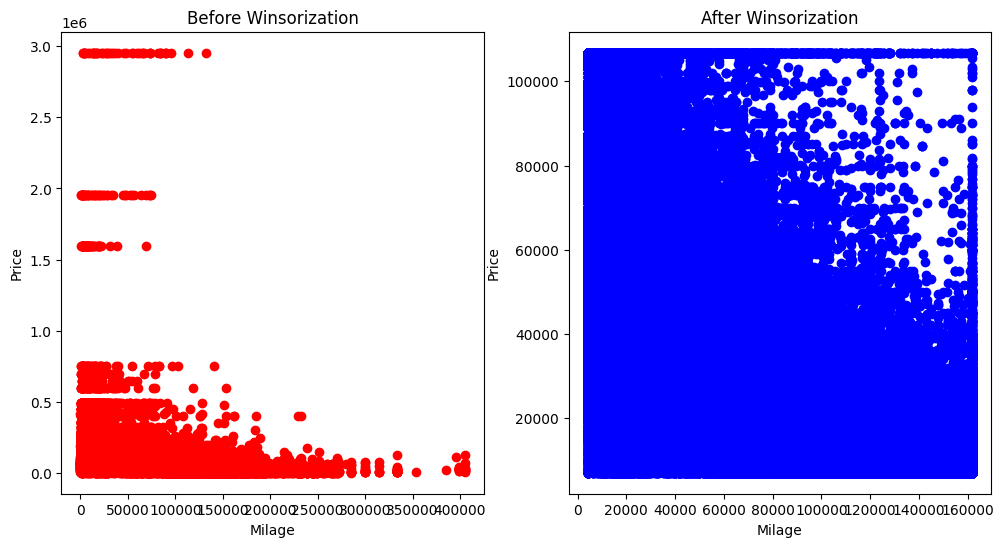

In [ ]:
from scipy.stats.mstats import winsorize

# Winsorize 'milage' and 'price' (capping extreme values)
df_winsor['milage_winsorized'] = winsorize(df_winsor['milage'], limits=[0.05, 0.05])
df_winsor['price_winsorized'] = winsorize(df_winsor['price'], limits=[0.05, 0.05])

# Plot before and after Winsorization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df_winsor['milage'], df_winsor['price'], color='red')
plt.title('Before Winsorization')
plt.xlabel('Milage')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
plt.scatter(df_winsor['milage_winsorized'], df_winsor['price_winsorized'], color='blue')
plt.title('After Winsorization')
plt.xlabel('Milage')
plt.ylabel('Price')

plt.show()


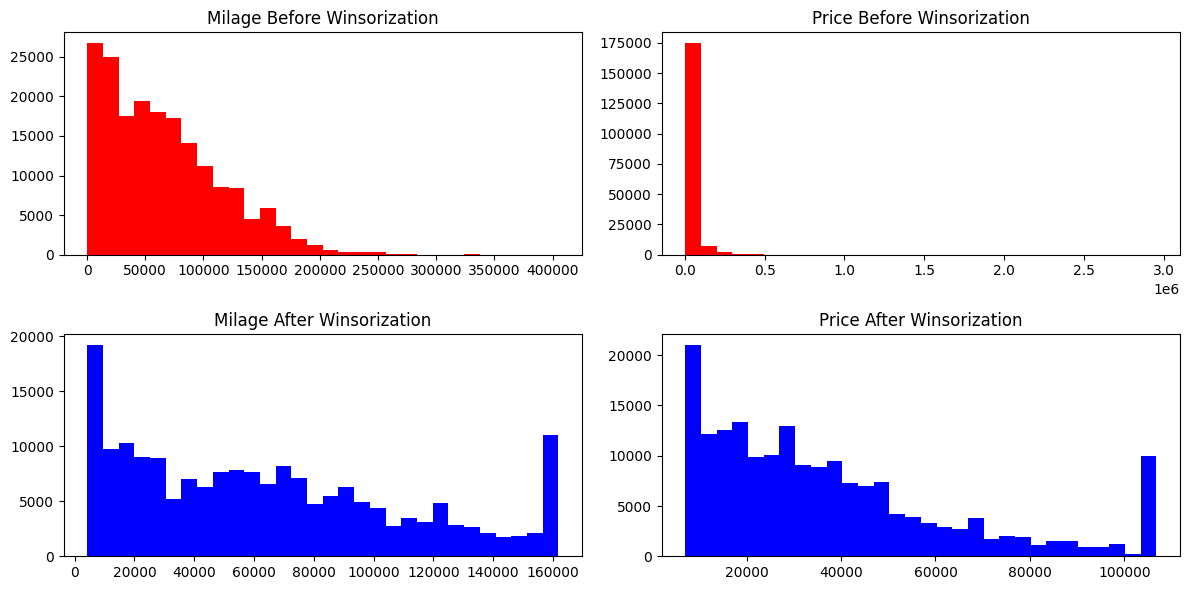

In [ ]:
# Plot histogram for milage and price before Winsorization method
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(df_winsor['milage'], bins=30, color='red')
plt.title('Milage Before Winsorization')

plt.subplot(2, 2, 2)
plt.hist(df_winsor['price'], bins=30, color='red')
plt.title('Price Before Winsorization')

# Plot histogram for milage and price after Winsorization method
plt.subplot(2, 2, 3)
plt.hist(df_winsor['milage_winsorized'], bins=30, color='blue')
plt.title('Milage After Winsorization')

plt.subplot(2, 2, 4)
plt.hist(df_winsor['price_winsorized'], bins=30, color='blue')
plt.title('Price After Winsorization')

plt.tight_layout()
plt.show()


In [ ]:
# Check skewness after Winsorization
milage_skewness_winsor = skew(df_winsor['milage_winsorized'])
price_skewness_winsor = skew(df_winsor['price_winsorized'])

print(f"Skewness of milage after Winsorization: {milage_skewness_winsor}")
print(f"Skewness of price after Winsorization: {price_skewness_winsor}")


Skewness of milage after Winsorization: 0.5601021723756847
Skewness of price after Winsorization: 1.1204943598551325


In [ ]:
# Log Transformation after Winsorizartion outlier removal
df_winsor['milage_log'] = np.log(df_winsor['milage_winsorized'] + 1)
df_winsor['price_log'] = np.log(df_winsor['price_winsorized'] + 1)

# Check skewness after log transformation
milage_skewness_winsor_log = skew(df_winsor['milage_log'])
price_skewness_winsor_log = skew(df_winsor['price_log'])

print(f"Skewness of milage after Winsorization + Log Transformation: {milage_skewness_winsor_log}")
print(f"Skewness of price after Winsorization + Log Transformation: {price_skewness_winsor_log}")

Skewness of milage after Winsorization + Log Transformation: -0.8344110796836147
Skewness of price after Winsorization + Log Transformation: -0.17937462777086463


In [ ]:
# Square Root transformation
df_winsor['milage_sqrt'] = np.sqrt(df_winsor['milage_winsorized'])
df_winsor['price_sqrt'] = np.sqrt(df_winsor['price_winsorized'])

# Check skewness after square root transformation
milage_skewness_winsor_sqrt = skew(df_winsor['milage_sqrt'])
price_skewness_winsor_sqrt = skew(df_winsor['price_sqrt'])

print(f"Skewness of milage after Winsorization + Square Root: {milage_skewness_winsor_sqrt}")
print(f"Skewness of price after Winsorization + Square Root: {price_skewness_winsor_sqrt}")

Skewness of milage after Winsorization + Square Root: -0.052482352880220594
Skewness of price after Winsorization + Square Root: 0.4970758413210498


In [ ]:
# Box-cox Transformation
df_winsor['milage_boxcox'], milage_lambda_winsor = boxcox(df_winsor['milage_winsorized'] + 1)
df_winsor['price_boxcox'], price_lambda_winsor = boxcox(df_winsor['price_winsorized'] + 1)

# Check skewness after Box-cox Transformation
milage_skewness_winsor_boxcox = skew(df_winsor['milage_boxcox'])
price_skewness_winsor_boxcox = skew(df_winsor['price_boxcox'])

print(f"Skewness of milage after Winsorization + Box-Cox: {milage_skewness_winsor_boxcox}")
print(f"Skewness of price after Winsorization + Box-Cox: {price_skewness_winsor_boxcox}")

Skewness of milage after Winsorization + Box-Cox: -0.15358606866836538
Skewness of price after Winsorization + Box-Cox: -0.022415661150880145


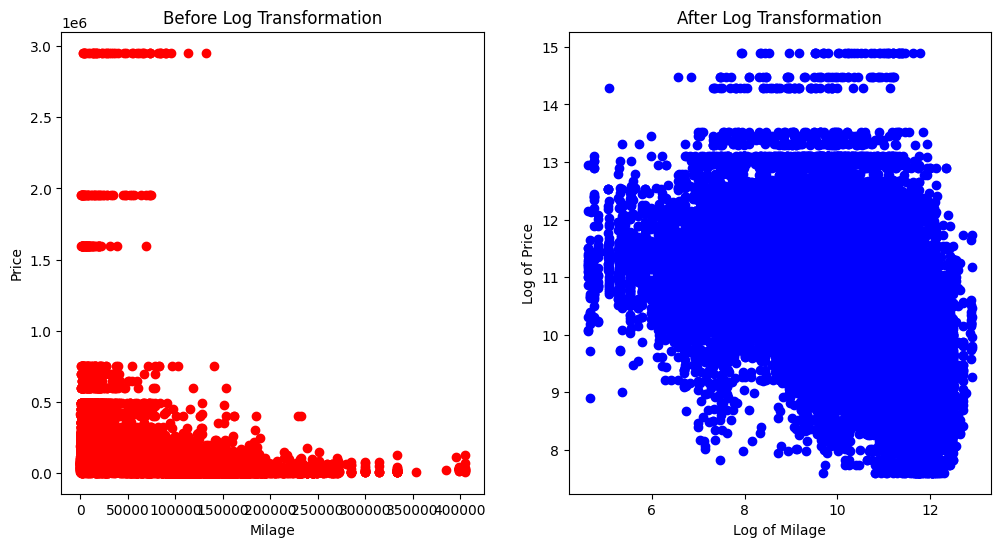

In [ ]:
# Log Transformation for 'milage' and 'price'
df_log['milage_log'] = np.log1p(df_log['milage'])
df_log['price_log'] = np.log1p(df_log['price'])

# Plot before and after log transformation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df_log['milage'], df_log['price'], color='red')
plt.title('Before Log Transformation')
plt.xlabel('Milage')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
plt.scatter(df_log['milage_log'], df_log['price_log'], color='blue')
plt.title('After Log Transformation')
plt.xlabel('Log of Milage')
plt.ylabel('Log of Price')

plt.show()


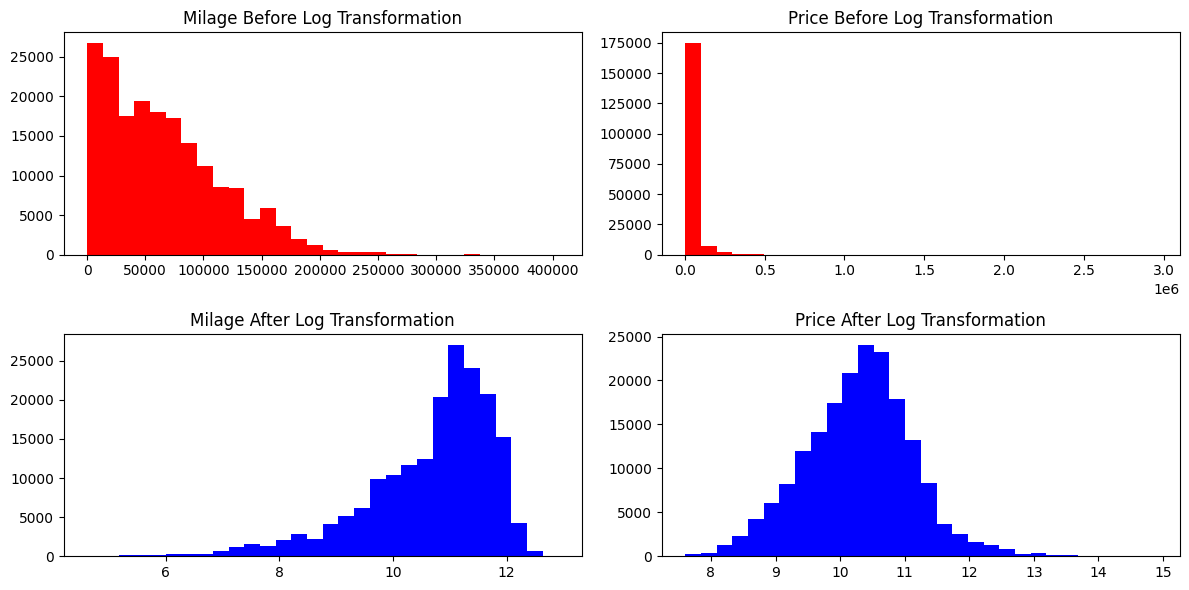

In [ ]:
# Plot histogram for milage and price before Log Transformation
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(df_log['milage'], bins=30, color='red')
plt.title('Milage Before Log Transformation')

plt.subplot(2, 2, 2)
plt.hist(df_log['price'], bins=30, color='red')
plt.title('Price Before Log Transformation')

# Plot histogram for milage and price after Log Transformation
plt.subplot(2, 2, 3)
plt.hist(df_log['milage_log'], bins=30, color='blue')
plt.title('Milage After Log Transformation')

plt.subplot(2, 2, 4)
plt.hist(df_log['price_log'], bins=30, color='blue')
plt.title('Price After Log Transformation')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from scipy.stats import skew

# Apply log transformation (add 1 to avoid log(0) issues)
df['milage_log'] = np.log(df['milage'] + 1)
df['price_log'] = np.log(df['price'] + 1)

# Calculate skewness after log transformation
milage_log_skewness = skew(df['milage_log'])
price_log_skewness = skew(df['price_log'])

print(f"Skewness of milage after log transformation: {milage_log_skewness}")
print(f"Skewness of price after log transformation: {price_log_skewness}")


Skewness of milage after log transformation: -1.3564387708360595
Skewness of price after log transformation: 0.10733177272996346


In [ ]:
# Log Transformation after log transformation outlier removal
df_log['milage_log'] = np.log(df_log['milage_log'] + 1)
df_log['price_log'] = np.log(df_log['price_log'] + 1)

# Check skewness after log transformation
milage_log_skewness_log = skew(df_log['milage_log'])
price_log_skewness_log = skew(df_log['price_log'])

print(f"Skewness of milage after log transformation + log transformation: {milage_log_skewness_log}")
print(f"Skewness of price after log transformation + log transformation: {price_log_skewness_log}")

Skewness of milage after log transformation + log transformation: -1.8336905229179241
Skewness of price after log transformation + log transformation: -0.1809252080364348


In [ ]:
# Square Root transformation
df['milage_sqrt'] = np.sqrt(df['milage'])
df['price_sqrt'] = np.sqrt(df['price'])

# Check skewness after square root transformation
milage_sqrt_skewness = skew(df['milage_sqrt'])
price_sqrt_skewness = skew(df['price_sqrt'])

print(f"Skewness of milage after square root transformation: {milage_sqrt_skewness}")
print(f"Skewness of price after square root transformation: {price_sqrt_skewness}")

Skewness of milage after square root transformation: 0.006756912542600903
Skewness of price after square root transformation: 3.7170031762074607


In [ ]:
# Box-cox Transformation
df['milage_boxcox'], milage_lambda = boxcox(df['milage'] + 1)
df['price_boxcox'], price_lambda = boxcox(df['price'] + 1)

# Check skewness after Box-cox Transformation
milage_boxcox_skewness = skew(df['milage_boxcox'])
price_boxcox_skewness = skew(df['price_boxcox'])

print(f"Skewness of milage after Box-Cox transformation: {milage_boxcox_skewness}")
print(f"Skewness of price after Box-Cox transformation: {price_boxcox_skewness}")

Skewness of milage after Box-Cox transformation: -0.13183308378404412
Skewness of price after Box-Cox transformation: -0.0059248128678867215


In [ ]:
# from scipy import stats # Import the stats module from scipy

# # Z-score method for 'milage' and 'price'
# z_scores_milage = np.abs(stats.zscore(df['milage']))
# z_scores_price = np.abs(stats.zscore(df['price']))
# z_scores_horsepower = np.abs(stats.zscore(df['horsepower']))
# z_scores_price = np.abs(stats.zscore(df['car_age']))


# # Filter the data
# df_zscore_clean = df[(z_scores_milage < 3) & (z_scores_price < 3)]

# # Plot before and after removing outliers
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.scatter(df['milage'], df['price'], color='red', label='Outliers Present')
# plt.title('Before Z-Score Outlier Removal')
# plt.xlabel('Milage')
# plt.ylabel('Price')

# plt.subplot(1, 2, 2)
# plt.scatter(df_zscore_clean['milage'], df_zscore_clean['price'], color='blue', label='Outliers Removed')
# plt.title('After Z-Score Outlier Removal')
# plt.xlabel('Milage')
# plt.ylabel('Price')
# plt.show()


In [ ]:
# from scipy import stats
# import numpy as np
# import matplotlib.pyplot as plt

# # Z-score method for 'milage', 'price', 'horsepower', and 'car_age'
# z_scores_milage = np.abs(stats.zscore(df['milage']))
# z_scores_price = np.abs(stats.zscore(df['price']))
# z_scores_horsepower = np.abs(stats.zscore(df['horsepower']))
# z_scores_car_age = np.abs(stats.zscore(df['car_age']))

# # Filter the data
# df_zscore_clean = df[
#     (z_scores_milage < 3) &
#     (z_scores_price < 3) &
#     (z_scores_horsepower < 3) &
#     (z_scores_car_age < 3)
# ]

# # Plot before and after removing outliers for 'milage' and 'price'
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.scatter(df['milage'], df['price'], color='red', label='Outliers Present')
# plt.title('Before Z-Score Outlier Removal (Milage vs Price)')
# plt.xlabel('Milage')
# plt.ylabel('Price')

# plt.subplot(1, 2, 2)
# plt.scatter(df_zscore_clean['milage'], df_zscore_clean['price'], color='blue', label='Outliers Removed')
# plt.title('After Z-Score Outlier Removal (Milage vs Price)')
# plt.xlabel('Milage')
# plt.ylabel('Price')
# plt.show()

# # Plot before and after removing outliers for 'horsepower' and 'car_age'
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.scatter(df['horsepower'], df['car_age'], color='red', label='Outliers Present')
# plt.title('Before Z-Score Outlier Removal (Horsepower vs Car Age)')
# plt.xlabel('Horsepower')
# plt.ylabel('Car Age')

# plt.subplot(1, 2, 2)
# plt.scatter(df_zscore_clean['horsepower'], df_zscore_clean['car_age'], color='blue', label='Outliers Removed')
# plt.title('After Z-Score Outlier Removal (Horsepower vs Car Age)')
# plt.xlabel('Horsepower')
# plt.ylabel('Car Age')
# plt.show()


In [ ]:
# from scipy import stats
# import numpy as np
# import matplotlib.pyplot as plt

# # Z-score method for 'milage', 'price', 'horsepower', and 'car_age'
# z_scores_milage = np.abs(stats.zscore(df['milage']))
# z_scores_price = np.abs(stats.zscore(df['price']))
# z_scores_horsepower = np.abs(stats.zscore(df['horsepower']))
# z_scores_car_age = np.abs(stats.zscore(df['car_age']))

# # Filter the data
# df_zscore_clean = df[
#     (z_scores_milage < 3) &
#     (z_scores_price < 3) &
#     (z_scores_horsepower < 3) &
#     (z_scores_car_age < 3)
# ]

# # Create subplots with 3 graphs compared to 'price'
# plt.figure(figsize=(18, 6))

# # Plot milage vs price
# plt.subplot(1, 3, 1)
# plt.scatter(df['milage'], df['price'], color='red', label='Outliers Present')
# plt.scatter(df_zscore_clean['milage'], df_zscore_clean['price'], color='blue', label='Outliers Removed')
# plt.title('Milage vs Price')
# plt.xlabel('Milage')
# plt.ylabel('Price')

# # Plot horsepower vs price
# plt.subplot(1, 3, 2)
# plt.scatter(df['horsepower'], df['price'], color='red', label='Outliers Present')
# plt.scatter(df_zscore_clean['horsepower'], df_zscore_clean['price'], color='blue', label='Outliers Removed')
# plt.title('Horsepower vs Price')
# plt.xlabel('Horsepower')
# plt.ylabel('Price')

# # Plot car age vs price
# plt.subplot(1, 3, 3)
# plt.scatter(df['car_age'], df['price'], color='red', label='Outliers Present')
# plt.scatter(df_zscore_clean['car_age'], df_zscore_clean['price'], color='blue', label='Outliers Removed')
# plt.title('Car Age vs Price')
# plt.xlabel('Car Age')
# plt.ylabel('Price')

# plt.tight_layout()
# plt.legend(loc='upper right')
# plt.show()


In [ ]:
# from scipy import stats
# import numpy as np
# import matplotlib.pyplot as plt

# # Z-score method for 'milage', 'price', 'horsepower', and 'car_age'
# z_scores_milage = np.abs(stats.zscore(df['milage']))
# z_scores_price = np.abs(stats.zscore(df['price']))
# z_scores_horsepower = np.abs(stats.zscore(df['horsepower']))
# z_scores_car_age = np.abs(stats.zscore(df['car_age']))

# # Filter the data
# df_zscore_clean = df[
#     (z_scores_milage < 3) &
#     (z_scores_price < 3) &
#     (z_scores_horsepower < 3) &
#     (z_scores_car_age < 3)
# ]

# # Create subplots with 6 graphs (3 before and 3 after)
# plt.figure(figsize=(18, 12))

# # First row - Before removing outliers
# plt.subplot(2, 3, 1)
# plt.scatter(df['milage'], df['price'], color='red')
# plt.title('Before: Milage vs Price')
# plt.xlabel('Milage')
# plt.ylabel('Price')

# plt.subplot(2, 3, 2)
# plt.scatter(df['horsepower'], df['price'], color='red')
# plt.title('Before: Horsepower vs Price')
# plt.xlabel('Horsepower')
# plt.ylabel('Price')

# plt.subplot(2, 3, 3)
# plt.scatter(df['car_age'], df['price'], color='red')
# plt.title('Before: Car Age vs Price')
# plt.xlabel('Car Age')
# plt.ylabel('Price')

# # Second row - After removing outliers
# plt.subplot(2, 3, 4)
# plt.scatter(df_zscore_clean['milage'], df_zscore_clean['price'], color='blue')
# plt.title('After: Milage vs Price')
# plt.xlabel('Milage')
# plt.ylabel('Price')

# plt.subplot(2, 3, 5)
# plt.scatter(df_zscore_clean['horsepower'], df_zscore_clean['price'], color='blue')
# plt.title('After: Horsepower vs Price')
# plt.xlabel('Horsepower')
# plt.ylabel('Price')

# plt.subplot(2, 3, 6)
# plt.scatter(df_zscore_clean['car_age'], df_zscore_clean['price'], color='blue')
# plt.title('After: Car Age vs Price')
# plt.xlabel('Car Age')
# plt.ylabel('Price')

# plt.tight_layout()
# plt.show()


In [ ]:
# from scipy import stats
# import numpy as np
# import matplotlib.pyplot as plt

# # Z-score method for 'milage', 'price', 'horsepower', and 'car_age'
# z_scores_milage = np.abs(stats.zscore(df['milage']))
# z_scores_price = np.abs(stats.zscore(df['price']))
# z_scores_horsepower = np.abs(stats.zscore(df['horsepower']))
# z_scores_car_age = np.abs(stats.zscore(df['car_age']))

# # Filter the data
# df_zscore_clean = df[
#     (z_scores_milage < 3) &
#     (z_scores_price < 3) &
#     (z_scores_horsepower < 3) &
#     (z_scores_car_age < 3)
# ]

# # Get min and max for each feature (to set consistent axis scales)
# milage_min, milage_max = min(df['milage'].min(), df_zscore_clean['milage'].min()), max(df['milage'].max(), df_zscore_clean['milage'].max())
# horsepower_min, horsepower_max = min(df['horsepower'].min(), df_zscore_clean['horsepower'].min()), max(df['horsepower'].max(), df_zscore_clean['horsepower'].max())
# car_age_min, car_age_max = min(df['car_age'].min(), df_zscore_clean['car_age'].min()), max(df['car_age'].max(), df_zscore_clean['car_age'].max())
# price_min, price_max = min(df['price'].min(), df_zscore_clean['price'].min()), max(df['price'].max(), df_zscore_clean['price'].max())

# # Create subplots with 6 graphs (3 before and 3 after) and same axis scales
# plt.figure(figsize=(18, 12))

# # First row - Before removing outliers
# plt.subplot(2, 3, 1)
# plt.scatter(df['milage'], df['price'], color='red')
# plt.xlim(milage_min, milage_max)
# plt.ylim(price_min, price_max)
# plt.title('Before: Milage vs Price')
# plt.xlabel('Milage')
# plt.ylabel('Price')

# plt.subplot(2, 3, 2)
# plt.scatter(df['horsepower'], df['price'], color='red')
# plt.xlim(horsepower_min, horsepower_max)
# plt.ylim(price_min, price_max)
# plt.title('Before: Horsepower vs Price')
# plt.xlabel('Horsepower')
# plt.ylabel('Price')

# plt.subplot(2, 3, 3)
# plt.scatter(df['car_age'], df['price'], color='red')
# plt.xlim(car_age_min, car_age_max)
# plt.ylim(price_min, price_max)
# plt.title('Before: Car Age vs Price')
# plt.xlabel('Car Age')
# plt.ylabel('Price')

# # Second row - After removing outliers
# plt.subplot(2, 3, 4)
# plt.scatter(df_zscore_clean['milage'], df_zscore_clean['price'], color='blue')
# plt.xlim(milage_min, milage_max)
# plt.ylim(price_min, price_max)
# plt.title('After: Milage vs Price')
# plt.xlabel('Milage')
# plt.ylabel('Price')

# plt.subplot(2, 3, 5)
# plt.scatter(df_zscore_clean['horsepower'], df_zscore_clean['price'], color='blue')
# plt.xlim(horsepower_min, horsepower_max)
# plt.ylim(price_min, price_max)
# plt.title('After: Horsepower vs Price')
# plt.xlabel('Horsepower')
# plt.ylabel('Price')

# plt.subplot(2, 3, 6)
# plt.scatter(df_zscore_clean['car_age'], df_zscore_clean['price'], color='blue')
# plt.xlim(car_age_min, car_age_max)
# plt.ylim(price_min, price_max)
# plt.title('After: Car Age vs Price')
# plt.xlabel('Car Age')
# plt.ylabel('Price')

# plt.tight_layout()
# plt.show()


In [ ]:
# from scipy import stats
# import numpy as np
# import matplotlib.pyplot as plt

# # Z-score method for 'milage', 'price', 'horsepower', 'car_age', 'engine_size', and 'cylinders'
# z_scores_milage = np.abs(stats.zscore(df['milage']))
# z_scores_price = np.abs(stats.zscore(df['price']))
# z_scores_horsepower = np.abs(stats.zscore(df['horsepower']))
# z_scores_car_age = np.abs(stats.zscore(df['car_age']))
# z_scores_engine_size = np.abs(stats.zscore(df['engine_size']))
# z_scores_cylinders = np.abs(stats.zscore(df['cylinders']))

# # Filter the data
# df_zscore_clean = df[
#     (z_scores_milage < 3) &
#     (z_scores_price < 3) &
#     (z_scores_horsepower < 3) &
#     (z_scores_car_age < 3) &
#     (z_scores_engine_size < 3) &
#     (z_scores_cylinders < 3)
# ]

# # Get min and max for each feature (to set consistent axis scales)
# milage_min, milage_max = min(df['milage'].min(), df_zscore_clean['milage'].min()), max(df['milage'].max(), df_zscore_clean['milage'].max())
# horsepower_min, horsepower_max = min(df['horsepower'].min(), df_zscore_clean['horsepower'].min()), max(df['horsepower'].max(), df_zscore_clean['horsepower'].max())
# car_age_min, car_age_max = min(df['car_age'].min(), df_zscore_clean['car_age'].min()), max(df['car_age'].max(), df_zscore_clean['car_age'].max())
# engine_size_min, engine_size_max = min(df['engine_size'].min(), df_zscore_clean['engine_size'].min()), max(df['engine_size'].max(), df_zscore_clean['engine_size'].max())
# cylinders_min, cylinders_max = min(df['cylinders'].min(), df_zscore_clean['cylinders'].min()), max(df['cylinders'].max(), df_zscore_clean['cylinders'].max())
# price_min, price_max = min(df['price'].min(), df_zscore_clean['price'].min()), max(df['price'].max(), df_zscore_clean['price'].max())

# # Create subplots with 10 graphs (5 before and 5 after) and same axis scales
# plt.figure(figsize=(18, 18))

# # First row - Before removing outliers
# plt.subplot(2, 5, 1)
# plt.scatter(df['milage'], df['price'], color='red')
# plt.xlim(milage_min, milage_max)
# plt.ylim(price_min, price_max)
# plt.title('Before: Milage vs Price')
# plt.xlabel('Milage')
# plt.ylabel('Price')

# plt.subplot(2, 5, 2)
# plt.scatter(df['horsepower'], df['price'], color='red')
# plt.xlim(horsepower_min, horsepower_max)
# plt.ylim(price_min, price_max)
# plt.title('Before: Horsepower vs Price')
# plt.xlabel('Horsepower')
# plt.ylabel('Price')

# plt.subplot(2, 5, 3)
# plt.scatter(df['car_age'], df['price'], color='red')
# plt.xlim(car_age_min, car_age_max)
# plt.ylim(price_min, price_max)
# plt.title('Before: Car Age vs Price')
# plt.xlabel('Car Age')
# plt.ylabel('Price')

# plt.subplot(2, 5, 4)
# plt.scatter(df['engine_size'], df['price'], color='red')
# plt.xlim(engine_size_min, engine_size_max)
# plt.ylim(price_min, price_max)
# plt.title('Before: Engine Size vs Price')
# plt.xlabel('Engine Size')
# plt.ylabel('Price')

# plt.subplot(2, 5, 5)
# plt.scatter(df['cylinders'], df['price'], color='red')
# plt.xlim(cylinders_min, cylinders_max)
# plt.ylim(price_min, price_max)
# plt.title('Before: Cylinders vs Price')
# plt.xlabel('Cylinders')
# plt.ylabel('Price')

# # Second row - After removing outliers
# plt.subplot(2, 5, 6)
# plt.scatter(df_zscore_clean['milage'], df_zscore_clean['price'], color='blue')
# plt.xlim(milage_min, milage_max)
# plt.ylim(price_min, price_max)
# plt.title('After: Milage vs Price')
# plt.xlabel('Milage')
# plt.ylabel('Price')

# plt.subplot(2, 5, 7)
# plt.scatter(df_zscore_clean['horsepower'], df_zscore_clean['price'], color='blue')
# plt.xlim(horsepower_min, horsepower_max)
# plt.ylim(price_min, price_max)
# plt.title('After: Horsepower vs Price')
# plt.xlabel('Horsepower')
# plt.ylabel('Price')

# plt.subplot(2, 5, 8)
# plt.scatter(df_zscore_clean['car_age'], df_zscore_clean['price'], color='blue')
# plt.xlim(car_age_min, car_age_max)
# plt.ylim(price_min, price_max)
# plt.title('After: Car Age vs Price')
# plt.xlabel('Car Age')
# plt.ylabel('Price')

# plt.subplot(2, 5, 9)
# plt.scatter(df_zscore_clean['engine_size'], df_zscore_clean['price'], color='blue')
# plt.xlim(engine_size_min, engine_size_max)
# plt.ylim(price_min, price_max)
# plt.title('After: Engine Size vs Price')
# plt.xlabel('Engine Size')
# plt.ylabel('Price')

# plt.subplot(2, 5, 10)
# plt.scatter(df_zscore_clean['cylinders'], df_zscore_clean['price'], color='blue')
# plt.xlim(cylinders_min, cylinders_max)
# plt.ylim(price_min, price_max)
# plt.title('After: Cylinders vs Price')
# plt.xlabel('Cylinders')
# plt.ylabel('Price')

# plt.tight_layout()
# plt.show()


**CLEANING OUTLIERS USING ZSCORE !!**

In [ ]:
'''
from scipy import stats
import numpy as np

# Function to clean the data using Z-Score
def apply_zscore(df):
    z_scores_milage = np.abs(stats.zscore(df['milage']))
    z_scores_price = np.abs(stats.zscore(df['price']))
    z_scores_horsepower = np.abs(stats.zscore(df['horsepower']))
    z_scores_car_age = np.abs(stats.zscore(df['car_age']))
    z_scores_engine_size = np.abs(stats.zscore(df['engine_size']))
    z_scores_cylinders = np.abs(stats.zscore(df['cylinders']))

    # Filter the data based on Z-Score (< 3 to remove outliers)
    df_cleaned = df[
        (z_scores_milage < 3) &
        (z_scores_price < 3) &
        (z_scores_horsepower < 3) &
        (z_scores_car_age < 3) &
        (z_scores_engine_size < 3) &
        (z_scores_cylinders < 3)
    ]

    return df_cleaned

# Applying Z-Score cleaning and storing the result in df_cleaned
df_cleaned = apply_zscore(df)
'''

"\nfrom scipy import stats\nimport numpy as np\n\n# Function to clean the data using Z-Score\ndef apply_zscore(df):\n    z_scores_milage = np.abs(stats.zscore(df['milage']))\n    z_scores_price = np.abs(stats.zscore(df['price']))\n    z_scores_horsepower = np.abs(stats.zscore(df['horsepower']))\n    z_scores_car_age = np.abs(stats.zscore(df['car_age']))\n    z_scores_engine_size = np.abs(stats.zscore(df['engine_size']))\n    z_scores_cylinders = np.abs(stats.zscore(df['cylinders']))\n\n    # Filter the data based on Z-Score (< 3 to remove outliers)\n    df_cleaned = df[\n        (z_scores_milage < 3) &\n        (z_scores_price < 3) &\n        (z_scores_horsepower < 3) &\n        (z_scores_car_age < 3) &\n        (z_scores_engine_size < 3) &\n        (z_scores_cylinders < 3)\n    ]\n\n    return df_cleaned\n\n# Applying Z-Score cleaning and storing the result in df_cleaned\ndf_cleaned = apply_zscore(df)\n"

In [ ]:
'''
import matplotlib.pyplot as plt

# Get min and max for each feature (to set consistent axis scales)
milage_min, milage_max = min(df['milage'].min(), df_cleaned['milage'].min()), max(df['milage'].max(), df_cleaned['milage'].max())
horsepower_min, horsepower_max = min(df['horsepower'].min(), df_cleaned['horsepower'].min()), max(df['horsepower'].max(), df_cleaned['horsepower'].max())
car_age_min, car_age_max = min(df['car_age'].min(), df_cleaned['car_age'].min()), max(df['car_age'].max(), df_cleaned['car_age'].max())
engine_size_min, engine_size_max = min(df['engine_size'].min(), df_cleaned['engine_size'].min()), max(df['engine_size'].max(), df_cleaned['engine_size'].max())
cylinders_min, cylinders_max = min(df['cylinders'].min(), df_cleaned['cylinders'].min()), max(df['cylinders'].max(), df_cleaned['cylinders'].max())
price_min, price_max = min(df['price'].min(), df_cleaned['price'].min()), max(df['price'].max(), df_cleaned['price'].max())

# Increase Y-axis limit to make scatter plots clearer
price_max += (price_max - price_min) * 0.1  # Add 10% padding to the top of the price axis

# Create subplots: 10 graphs (2 columns, 5 rows)
plt.figure(figsize=(12, 20))  # Adjusting height for 5 rows

# First column (Before removing outliers)
plt.subplot(5, 2, 1)
plt.scatter(df['milage'], df['price'], color='red')
plt.xlim(milage_min, milage_max)
plt.ylim(price_min, price_max)
plt.title('Before: Milage vs Price')
plt.xlabel('Milage')
plt.ylabel('Price')

plt.subplot(5, 2, 3)
plt.scatter(df['horsepower'], df['price'], color='red')
plt.xlim(horsepower_min, horsepower_max)
plt.ylim(price_min, price_max)
plt.title('Before: Horsepower vs Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')

plt.subplot(5, 2, 5)
plt.scatter(df['car_age'], df['price'], color='red')
plt.xlim(car_age_min, car_age_max)
plt.ylim(price_min, price_max)
plt.title('Before: Car Age vs Price')
plt.xlabel('Car Age')
plt.ylabel('Price')

plt.subplot(5, 2, 7)
plt.scatter(df['engine_size'], df['price'], color='red')
plt.xlim(engine_size_min, engine_size_max)
plt.ylim(price_min, price_max)
plt.title('Before: Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')

plt.subplot(5, 2, 9)
plt.scatter(df['cylinders'], df['price'], color='red')
plt.xlim(cylinders_min, cylinders_max)
plt.ylim(price_min, price_max)
plt.title('Before: Cylinders vs Price')
plt.xlabel('Cylinders')
plt.ylabel('Price')

# Second column (After removing outliers)
plt.subplot(5, 2, 2)
plt.scatter(df_cleaned['milage'], df_cleaned['price'], color='blue')
plt.xlim(milage_min, milage_max)
plt.ylim(price_min, price_max)
plt.title('After: Milage vs Price')
plt.xlabel('Milage')
plt.ylabel('Price')

plt.subplot(5, 2, 4)
plt.scatter(df_cleaned['horsepower'], df_cleaned['price'], color='blue')
plt.xlim(horsepower_min, horsepower_max)
plt.ylim(price_min, price_max)
plt.title('After: Horsepower vs Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')

plt.subplot(5, 2, 6)
plt.scatter(df_cleaned['car_age'], df_cleaned['price'], color='blue')
plt.xlim(car_age_min, car_age_max)
plt.ylim(price_min, price_max)
plt.title('After: Car Age vs Price')
plt.xlabel('Car Age')
plt.ylabel('Price')

plt.subplot(5, 2, 8)
plt.scatter(df_cleaned['engine_size'], df_cleaned['price'], color='blue')
plt.xlim(engine_size_min, engine_size_max)
plt.ylim(price_min, price_max)
plt.title('After: Engine Size vs Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')

plt.subplot(5, 2, 10)
plt.scatter(df_cleaned['cylinders'], df_cleaned['price'], color='blue')
plt.xlim(cylinders_min, cylinders_max)
plt.ylim(price_min, price_max)
plt.title('After: Cylinders vs Price')
plt.xlabel('Cylinders')
plt.ylabel('Price')

plt.tight_layout()
plt.show()
'''

"\nimport matplotlib.pyplot as plt\n\n# Get min and max for each feature (to set consistent axis scales)\nmilage_min, milage_max = min(df['milage'].min(), df_cleaned['milage'].min()), max(df['milage'].max(), df_cleaned['milage'].max())\nhorsepower_min, horsepower_max = min(df['horsepower'].min(), df_cleaned['horsepower'].min()), max(df['horsepower'].max(), df_cleaned['horsepower'].max())\ncar_age_min, car_age_max = min(df['car_age'].min(), df_cleaned['car_age'].min()), max(df['car_age'].max(), df_cleaned['car_age'].max())\nengine_size_min, engine_size_max = min(df['engine_size'].min(), df_cleaned['engine_size'].min()), max(df['engine_size'].max(), df_cleaned['engine_size'].max())\ncylinders_min, cylinders_max = min(df['cylinders'].min(), df_cleaned['cylinders'].min()), max(df['cylinders'].max(), df_cleaned['cylinders'].max())\nprice_min, price_max = min(df['price'].min(), df_cleaned['price'].min()), max(df['price'].max(), df_cleaned['price'].max())\n\n# Increase Y-axis limit to make sc

In [ ]:
'''
# Create histograms for each feature before and after outlier removal

plt.figure(figsize=(12, 18))

# First column (Before cleaning)
plt.subplot(5, 2, 1)
plt.hist(df['milage'], bins=20, color='red', alpha=0.7)
plt.title('Before: Milage Distribution')

plt.subplot(5, 2, 3)
plt.hist(df['horsepower'], bins=20, color='red', alpha=0.7)
plt.title('Before: Horsepower Distribution')

plt.subplot(5, 2, 5)
plt.hist(df['car_age'], bins=20, color='red', alpha=0.7)
plt.title('Before: Car Age Distribution')

plt.subplot(5, 2, 7)
plt.hist(df['engine_size'], bins=20, color='red', alpha=0.7)
plt.title('Before: Engine Size Distribution')

plt.subplot(5, 2, 9)
plt.hist(df['cylinders'], bins=20, color='red', alpha=0.7)
plt.title('Before: Cylinders Distribution')

# Second column (After cleaning)
plt.subplot(5, 2, 2)
plt.hist(df_cleaned['milage'], bins=20, color='blue', alpha=0.7)
plt.title('After: Milage Distribution')

plt.subplot(5, 2, 4)
plt.hist(df_cleaned['horsepower'], bins=20, color='blue', alpha=0.7)
plt.title('After: Horsepower Distribution')

plt.subplot(5, 2, 6)
plt.hist(df_cleaned['car_age'], bins=20, color='blue', alpha=0.7)
plt.title('After: Car Age Distribution')

plt.subplot(5, 2, 8)
plt.hist(df_cleaned['engine_size'], bins=20, color='blue', alpha=0.7)
plt.title('After: Engine Size Distribution')

plt.subplot(5, 2, 10)
plt.hist(df_cleaned['cylinders'], bins=20, color='blue', alpha=0.7)
plt.title('After: Cylinders Distribution')

plt.tight_layout()
plt.show()
'''

"\n# Create histograms for each feature before and after outlier removal\n\nplt.figure(figsize=(12, 18))\n\n# First column (Before cleaning)\nplt.subplot(5, 2, 1)\nplt.hist(df['milage'], bins=20, color='red', alpha=0.7)\nplt.title('Before: Milage Distribution')\n\nplt.subplot(5, 2, 3)\nplt.hist(df['horsepower'], bins=20, color='red', alpha=0.7)\nplt.title('Before: Horsepower Distribution')\n\nplt.subplot(5, 2, 5)\nplt.hist(df['car_age'], bins=20, color='red', alpha=0.7)\nplt.title('Before: Car Age Distribution')\n\nplt.subplot(5, 2, 7)\nplt.hist(df['engine_size'], bins=20, color='red', alpha=0.7)\nplt.title('Before: Engine Size Distribution')\n\nplt.subplot(5, 2, 9)\nplt.hist(df['cylinders'], bins=20, color='red', alpha=0.7)\nplt.title('Before: Cylinders Distribution')\n\n# Second column (After cleaning)\nplt.subplot(5, 2, 2)\nplt.hist(df_cleaned['milage'], bins=20, color='blue', alpha=0.7)\nplt.title('After: Milage Distribution')\n\nplt.subplot(5, 2, 4)\nplt.hist(df_cleaned['horsepowe

In [ ]:
df.shape

(185146, 21)

In [ ]:
# df_cleaned.shape

In [ ]:
'''
import matplotlib.pyplot as plt

# Select numeric columns for outlier detection
numeric_columns = ['milage', 'price', 'horsepower', 'engine_size', 'cylinders',"car_age"]

# Create boxplots for these numeric columns to visualize outliers
plt.figure(figsize=(12, 8))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df_cleaned[column], vert=False)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()
'''

'\nimport matplotlib.pyplot as plt\n\n# Select numeric columns for outlier detection\nnumeric_columns = [\'milage\', \'price\', \'horsepower\', \'engine_size\', \'cylinders\',"car_age"]\n\n# Create boxplots for these numeric columns to visualize outliers\nplt.figure(figsize=(12, 8))\n\nfor i, column in enumerate(numeric_columns, 1):\n    plt.subplot(2, 3, i)\n    plt.boxplot(df_cleaned[column], vert=False)\n    plt.title(f\'Boxplot of {column}\')\n\nplt.tight_layout()\nplt.show()\n'

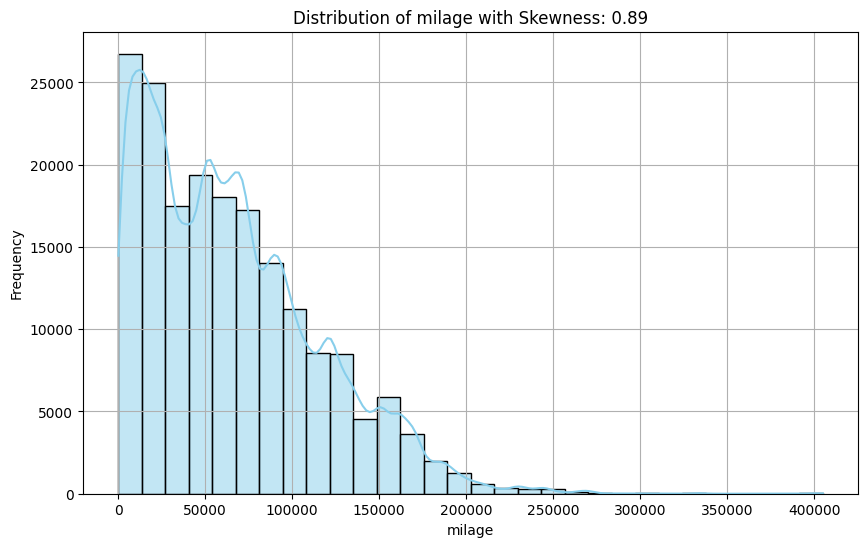

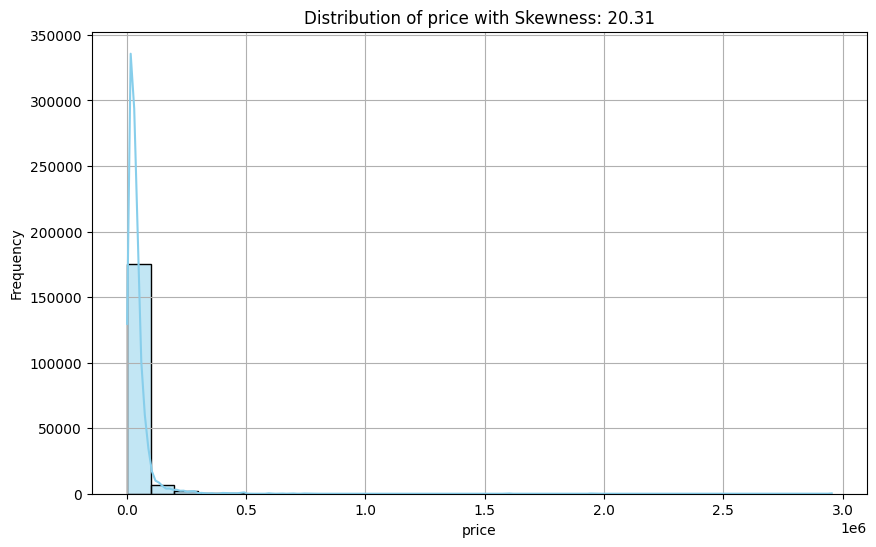

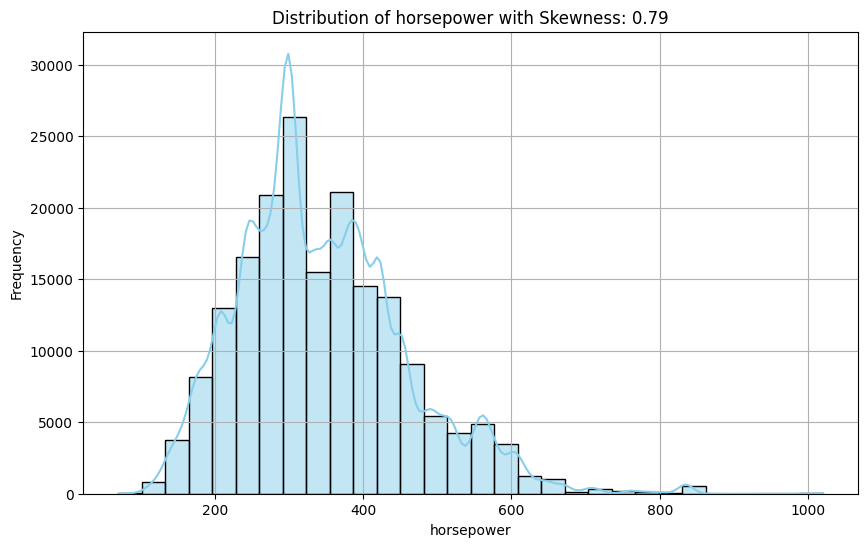

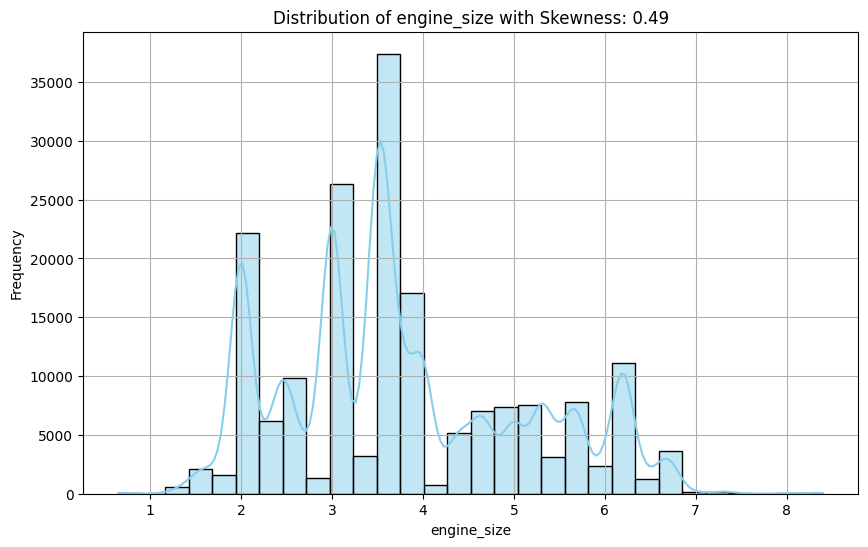

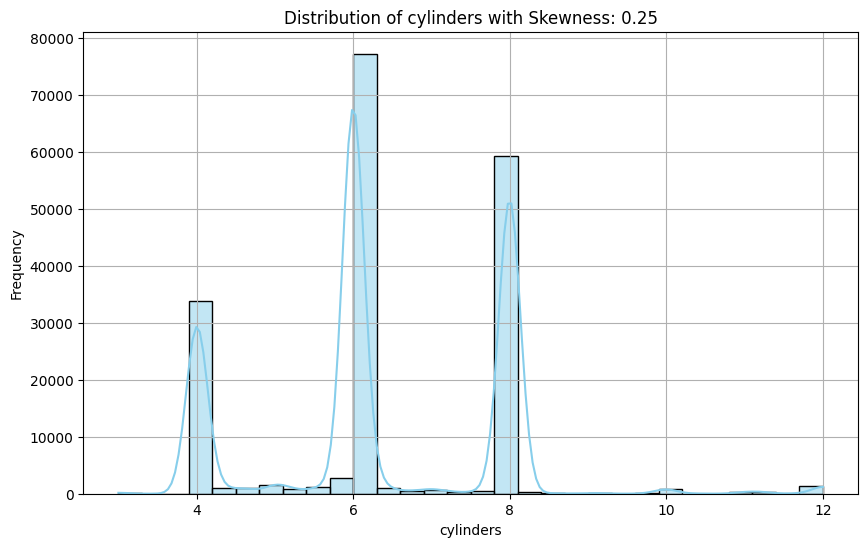

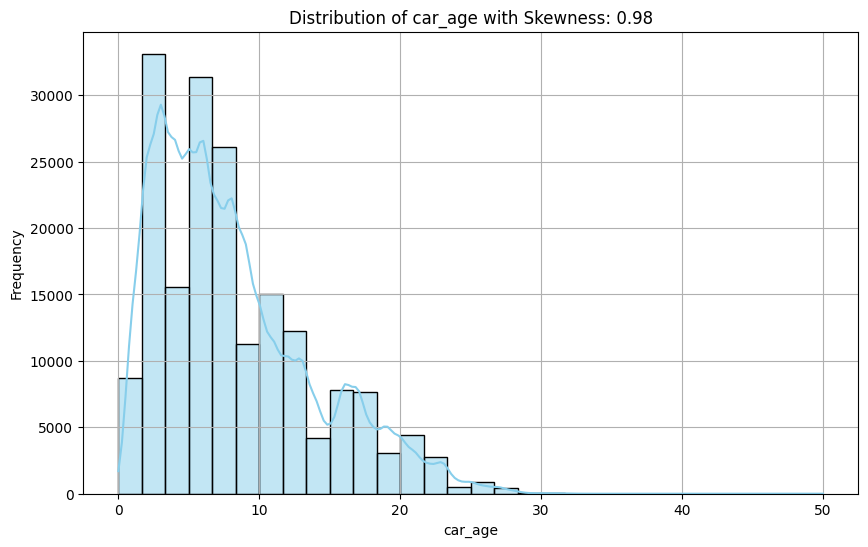

{'milage': 0.8889971944671571,
 'price': 20.305519730597997,
 'horsepower': 0.7921676479883495,
 'engine_size': 0.49101537132816875,
 'cylinders': 0.2518126798167639,
 'car_age': 0.9825494763722127}

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import skew

# Function to calculate skewness and plot distribution for numerical data
def plot_skewness(df, columns):
    skewness_results = {}

    for column in columns:
        # Calculate skewness
        skewness_value = skew(df[column].dropna())  # Drop NaN values to avoid errors
        skewness_results[column] = skewness_value

        # Plot distribution
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column].dropna(), kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {column} with Skewness: {skewness_value:.2f}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

    return skewness_results
columns = ['milage', 'price', 'horsepower', 'engine_size', 'cylinders',"car_age"]

# plot_skewness(df_cleaned,columns)
plot_skewness(df,columns)
# Example usage with placeholder 'df' and 'numeric_columns'
# Assuming 'df' is your DataFrame and 'numeric_columns' is a list of your numerical columns
# skewness_dict = plot_skewness(df, numeric_columns)

# Display the skewness results to the user
# ace_tools.display_dataframe_to_user(name="Skewness Results", dataframe=pd.DataFrame(skewness_dict.items(), columns=['Column', 'Skewness']))



Log Transformation

In [ ]:
df['price'] = np.log1p(df['price'])
df['car_age'] = np.log1p(df['car_age'])
df['milage'] = np.log1p(df['milage'])
df['horsepower'] = np.log1p(df['horsepower'])

In [ ]:
'''
import numpy as np
from scipy import stats
import pandas as pd
#import ace_tools as tools


# Box-Cox transformation for price (which has high skewness)
df_cleaned['boxcox_price'], _ = stats.boxcox(df_cleaned['price'] + 1)  # Adding 1 to avoid zero values



transformed_columns = ['boxcox_price']
transformed_skewness = {col: skew(df_cleaned[col].dropna()) for col in transformed_columns}

# Print the new skewness values after transformation
print(transformed_skewness)
'''

"\nimport numpy as np\nfrom scipy import stats\nimport pandas as pd\n#import ace_tools as tools\n\n\n# Box-Cox transformation for price (which has high skewness)\ndf_cleaned['boxcox_price'], _ = stats.boxcox(df_cleaned['price'] + 1)  # Adding 1 to avoid zero values\n\n\n\ntransformed_columns = ['boxcox_price']\ntransformed_skewness = {col: skew(df_cleaned[col].dropna()) for col in transformed_columns}\n\n# Print the new skewness values after transformation\nprint(transformed_skewness)\n"

In [ ]:
'''
import numpy as np
from scipy import stats
import pandas as pd
#import ace_tools as tools


# Box-Cox transformation for price (which has high skewness)
df_cleaned['boxcox_car_age'], _ = stats.boxcox(df_cleaned['car_age'] + 1)  # Adding 1 to avoid zero values



transformed_columns = ['boxcox_car_age']
transformed_skewness = {col: skew(df_cleaned[col].dropna()) for col in transformed_columns}

# Print the new skewness values after transformation
print(transformed_skewness)
'''

"\nimport numpy as np\nfrom scipy import stats\nimport pandas as pd\n#import ace_tools as tools\n\n\n# Box-Cox transformation for price (which has high skewness)\ndf_cleaned['boxcox_car_age'], _ = stats.boxcox(df_cleaned['car_age'] + 1)  # Adding 1 to avoid zero values\n\n\n\ntransformed_columns = ['boxcox_car_age']\ntransformed_skewness = {col: skew(df_cleaned[col].dropna()) for col in transformed_columns}\n\n# Print the new skewness values after transformation\nprint(transformed_skewness)\n"

In [ ]:
'''
# Apply cube root transformation for milage
df_cleaned['cube_root_milage'] = np.cbrt(df_cleaned['milage'])

# Check skewness again
skewness_cube_root_milage = skew(df_cleaned['cube_root_milage'].dropna())
print(f"Skewness after cube root transformation (milage): {skewness_cube_root_milage}")
'''

'\n# Apply cube root transformation for milage\ndf_cleaned[\'cube_root_milage\'] = np.cbrt(df_cleaned[\'milage\'])\n\n# Check skewness again\nskewness_cube_root_milage = skew(df_cleaned[\'cube_root_milage\'].dropna())\nprint(f"Skewness after cube root transformation (milage): {skewness_cube_root_milage}")\n'

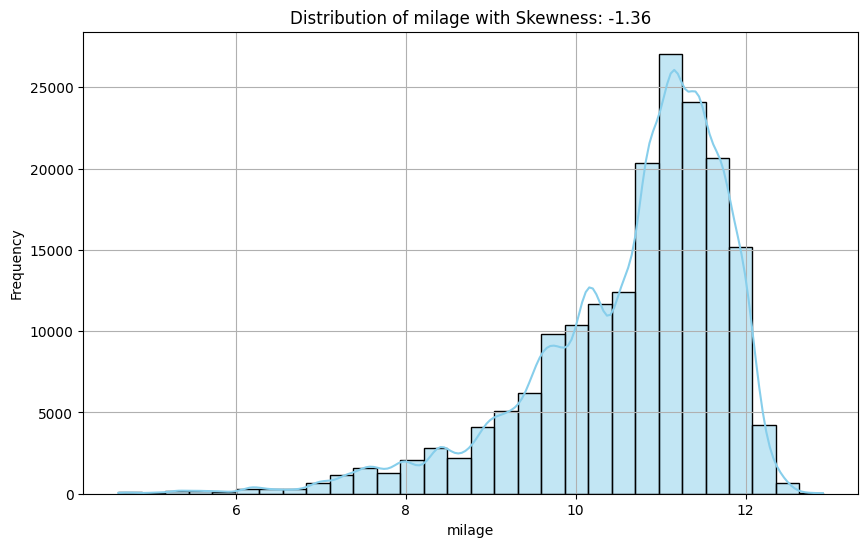

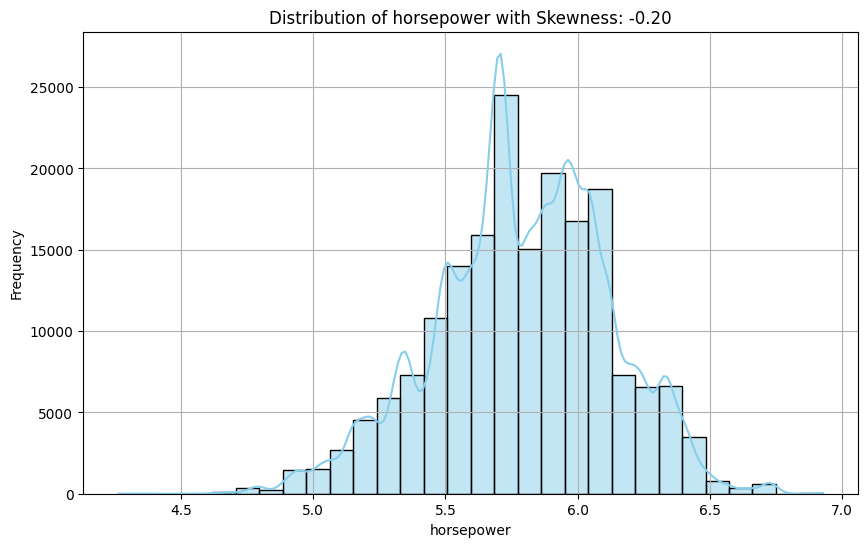

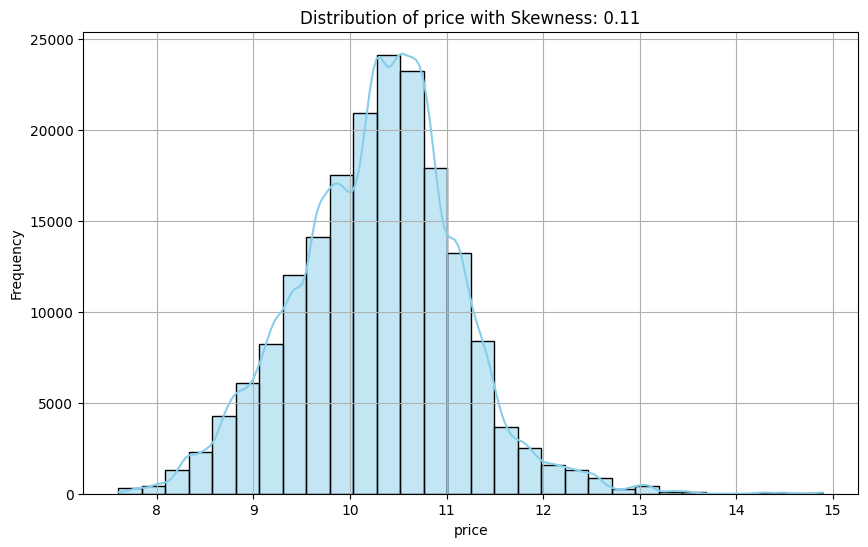

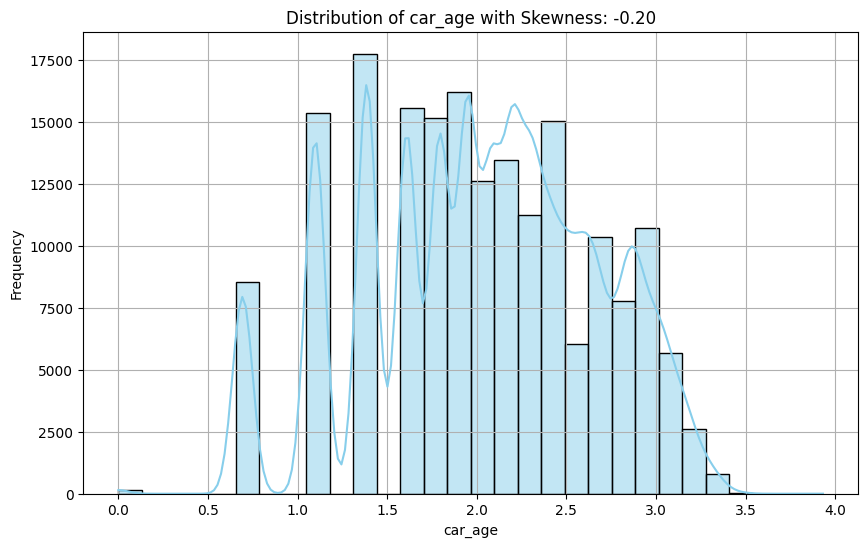

{'milage': -1.3564387708360595,
 'horsepower': -0.198645650468902,
 'price': 0.10733177272996346,
 'car_age': -0.19684016592563813}

In [ ]:
# columns = ['cube_root_milage', 'boxcox_price',"boxcox_car_age"]
columns = ['milage', 'horsepower','price',"car_age"]

# plot_skewness(df_cleaned, columns)
plot_skewness(df, columns)

In [ ]:
# df_cleaned.describe()
df.describe()

id         milage          price     horsepower  \
count  185146.000000  185146.000000  185146.000000  185146.000000   
mean    94251.551489      10.660250      10.289970       5.791780   
std     54435.380774       1.148388       0.843233       0.331648   
min         0.000000       4.615121       7.601402       4.262680   
25%     47112.250000      10.098273       9.741027       5.583496   
50%     94235.500000      10.966801      10.328755       5.800418   
75%    141405.750000      11.466368      10.814786       6.028279   
max    188532.000000      12.911645      14.898699       6.928538   

         engine_size      cylinders        car_age     milage_log  \
count  185146.000000  185146.000000  185146.000000  185146.000000   
mean        3.771188       6.350157       2.023491      10.660250   
std         1.336693       1.551976       0.636057       1.148388   
min         0.650000       3.000000       0.000000       4.615121   
25%         3.000000       6.000000       1.609438      10.098273   
50%         3.500000       6.000000       2.079442      10.966801   
75%         4.700000       8.000000       2.484907      11.466368   
max         8.400000      12.000000       3.931826      12.911645   

           price_log    milage_sqrt     price_sqrt  milage_boxcox  \
count  185146.000000  185146.000000  185146.000000  185146.000000   
mean       10.289970     235.293349     188.021450     252.138187   
std         0.843233     102.405248      91.620140      98.213936   
min         7.601402      10.000000      44.721360      14.653098   
25%         9.741027     155.884573     130.384048     178.340761   
50%        10.328755     240.661588     174.925699     260.441063   
75%        10.814786     308.949834     223.047080     323.623842   
max        14.898699     636.396103    1718.744600     605.647705   

        price_boxcox  
count  185146.000000  
mean        8.700026  
std         0.597593  
min         6.713430  
25%         8.315524  
50%         8.735928  
75%         9.077408  
max        11.737987

In [ ]:
'''
import numpy as np
from scipy import stats
import pandas as pd
from scipy.special import inv_boxcox # Importing the inv_boxcox function

#import ace_tools as tools


# Box-Cox transformation for price (which has high skewness)
#df_cleaned['boxcox_price'], _ = stats.boxcox(df_cleaned['price'] + 1)  # Adding 1 to avoid zero values
df_cleaned['boxcox_price'], boxcox_lambda = stats.boxcox(df_cleaned['price'] )
df_cleaned['price_original'] = inv_boxcox(df_cleaned['boxcox_price'], boxcox_lambda)

transformed_columns = ['boxcox_price']
transformed_skewness = {col: skew(df_cleaned[col].dropna()) for col in transformed_columns}

# Print the new skewness values after transformation
print(transformed_skewness)
'''

"\nimport numpy as np\nfrom scipy import stats\nimport pandas as pd\nfrom scipy.special import inv_boxcox # Importing the inv_boxcox function\n\n#import ace_tools as tools\n\n\n# Box-Cox transformation for price (which has high skewness)\n#df_cleaned['boxcox_price'], _ = stats.boxcox(df_cleaned['price'] + 1)  # Adding 1 to avoid zero values\ndf_cleaned['boxcox_price'], boxcox_lambda = stats.boxcox(df_cleaned['price'] )\ndf_cleaned['price_original'] = inv_boxcox(df_cleaned['boxcox_price'], boxcox_lambda)\n\ntransformed_columns = ['boxcox_price']\ntransformed_skewness = {col: skew(df_cleaned[col].dropna()) for col in transformed_columns}\n\n# Print the new skewness values after transformation\nprint(transformed_skewness)\n"

In [ ]:
# df_cleaned["price"].head()

In [ ]:
# df_cleaned["price_original"].head()

In [ ]:
# df_cleaned.shape

In [ ]:
# df_cleaned.head()

In [ ]:
# import numpy as np
# from scipy import stats
# import pandas as pd
# #import ace_tools as tools


# # Box-Cox transformation for price (which has high skewness)
# df_cleaned['boxcox_car_age'], _ = stats.boxcox(df_cleaned['car_age']+1 )  # Adding 1 to avoid zero values



# transformed_columns = ['boxcox_car_age']
# transformed_skewness = {col: skew(df_cleaned[col].dropna()) for col in transformed_columns}

# # Print the new skewness values after transformation
# print(transformed_skewness)

In [ ]:
# # Apply cube root transformation for milage
# df_cleaned['cube_root_milage'] = np.cbrt(df_cleaned['milage'])

# # Check skewness again
# skewness_cube_root_milage = skew(df_cleaned['cube_root_milage'].dropna())
# print(f"Skewness after cube root transformation (milage): {skewness_cube_root_milage}")


In [ ]:
# df_cleaned.shape

In [ ]:
# df_cleaned=df_cleaned.drop("car_age",axis=1)

In [ ]:
df=df.drop("id",axis=1)

In [ ]:
# df_cleaned=df_cleaned.drop(["price","milage"],axis=1)

In [ ]:
# df_cleaned=df_cleaned.drop("price_original",axis=1)


In [ ]:
# df_cleaned["boxcox_price"].min(),df_cleaned["boxcox_price"].max()

In [ ]:
# df_cleaned = df_cleaned.rename(columns={'cube_root_milage': 'milage', 'boxcox_price': 'price', 'boxcox_car_age': 'car_age'})

In [ ]:
# df_cleaned.head()

In [ ]:
# df_cleaned.to_csv('/content/drive/MyDrive/used cars dataset/final.csv', index=False)
df.to_csv('/content/drive/MyDrive/used cars dataset/final.csv', index=False)

## Normalization & Encoding



In [ ]:
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# # Assuming df is your dataframe with train data
# # Step 1: Identify numeric and categorical columns
# numeric_columns = ['milage', 'price', 'horsepower', 'car_age', 'engine_size', 'cylinders']
# categorical_columns = ['fuel_type', 'ext_col', 'int_col', 'accident', 'clean_title', "Transmission_Standardized"]

# # Step 2: Normalize the numeric data (milage and price) using Min-Max Scaling
# scaler = MinMaxScaler()
# df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned[numeric_columns]), columns=numeric_columns)

# # Step 3: One-hot encode the categorical data
# encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity (optional)
# df_categorical_encoded = pd.DataFrame(encoder.fit_transform(df_cleaned[categorical_columns]),
#                                       columns=encoder.get_feature_names_out(categorical_columns))

# # Step 4: Combine normalized numeric data with one-hot encoded categorical data
# df_normalized = pd.concat([df_numeric_scaled, df_categorical_encoded], axis=1)

# # Final dataframe with normalized and encoded data
# df_normalized.head()

In [ ]:
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# # Frequency encoder function
# def frequency_encode(df, column):
#     freq_encoding = df[column].value_counts() / len(df)
#     return df[column].map(freq_encoding)

# # Assuming df_cleaned is your cleaned dataframe with train data
# # Step 1: Identify numeric and categorical columns
# numeric_columns = ['milage', 'price', 'horsepower', 'car_age', 'engine_size', 'cylinders']
# categorical_columns = ['fuel_type', 'ext_col', 'int_col', 'accident', 'clean_title', "Transmission_Standardized"]

# # Step 2: Apply frequency encoding to 'brand' and 'model' columns
# df_cleaned['brand_freq_encoded'] = frequency_encode(df_cleaned, 'brand')
# df_cleaned['model_freq_encoded'] = frequency_encode(df_cleaned, 'model')

# # Step 3: Add the frequency encoded columns to the numeric columns list for scaling
# numeric_columns.extend(['brand_freq_encoded', 'model_freq_encoded'])

# # Step 4: Normalize the numeric data (milage, price, etc.) using Min-Max Scaling
# scaler = MinMaxScaler()
# df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned[numeric_columns]), columns=numeric_columns)

# # Step 5: One-hot encode the categorical data
# encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity (optional)
# df_categorical_encoded = pd.DataFrame(encoder.fit_transform(df_cleaned[categorical_columns]),
#                                       columns=encoder.get_feature_names_out(categorical_columns))

# # Step 6: Combine normalized numeric data with one-hot encoded categorical data
# df_normalized = pd.concat([df_numeric_scaled, df_categorical_encoded], axis=1)

# # Final dataframe with normalized and encoded data
# df_normalized.head()


In [ ]:
# prompt: reset index for df_cleaned

# df_cleaned = df_cleaned.reset_index(drop=True)
df = df.reset_index(drop=True)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Frequency encoder function
def frequency_encode(df, column):
    freq_encoding = df[column].value_counts() / len(df)
    return df[column].map(freq_encoding)

# Assuming df_cleaned is your cleaned dataframe with train data
# Step 1: Identify numeric, frequency-encoded, and categorical columns
numeric_columns = ['milage', 'car_age', 'horsepower', 'engine_size', 'cylinders'] # Without Price
# numeric_columns = ['cube_root_milage', 'boxcox_price', 'boxcox_car_age', 'horsepower', 'engine_size', 'cylinders']
categorical_columns = ['fuel_type', 'ext_col', 'int_col', 'accident', 'clean_title', "Transmission_Standardized"]

# Step 2: Apply frequency encoding to 'brand' and 'model' columns
# df_cleaned['brand_freq_encoded'] = frequency_encode(df_cleaned, 'brand')
# df_cleaned['model_freq_encoded'] = frequency_encode(df_cleaned, 'model')
df['brand'] = frequency_encode(df, 'brand')
df['model'] = frequency_encode(df, 'model')

# Step 3: Normalize only the numeric data (milage, price, etc.) using Min-Max Scaling
scaler = MinMaxScaler()
# df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned[numeric_columns]), columns=numeric_columns)
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

# Step 4: One-hot encode the categorical data
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity (optional)
# df_categorical_encoded = pd.DataFrame(encoder.fit_transform(df_cleaned[categorical_columns]),
#                                       columns=encoder.get_feature_names_out(categorical_columns))
df_categorical_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_columns]),
                                      columns=encoder.get_feature_names_out(categorical_columns))

# Step 5: Combine normalized numeric data, frequency encoded data, and one-hot encoded categorical data
# df_final = pd.concat([df_numeric_scaled, df_cleaned[['brand_freq_encoded', 'model_freq_encoded']], df_categorical_encoded], axis=1)
df_final = pd.concat([df_numeric_scaled, df[['brand', 'model','price']], df_categorical_encoded], axis=1)

# Final dataframe with normalized, frequency-encoded, and one-hot encoded data
df_final.head()


milage   car_age  horsepower  engine_size  cylinders     brand     model  \
0  0.922547  0.735122    0.334081     0.122581   0.111111  0.005677  0.003106   
1  0.874732  0.797465    0.476661     0.419355   0.555556  0.012903  0.000157   
2  0.869118  0.797465    0.565957     0.600000   0.555556  0.086834  0.000329   
3  0.634374  0.528874    0.667685     0.561290   0.555556  0.005142  0.000508   
4  0.517401  0.352583    0.404993     0.174194   0.111111  0.102541  0.002787   

       price  fuel_type_Electric  fuel_type_Flex Fuel  ...  int_col_orange  \
0   8.343078                 0.0                  0.0  ...             0.0   
1   8.517193                 0.0                  0.0  ...             0.0   
2   9.539716                 0.0                  1.0  ...             0.0   
3  10.714440                 0.0                  0.0  ...             0.0   
4  11.487618                 0.0                  0.0  ...             0.0   

   int_col_other  int_col_red  int_col_white  int_col_yellow  \
0            0.0          0.0            0.0             0.0   
1            0.0          0.0            0.0             0.0   
2            0.0          0.0            0.0             0.0   
3            0.0          0.0            0.0             0.0   
4            0.0          0.0            0.0             0.0   

   accident_None reported  clean_title_Yes  Transmission_Standardized_CVT  \
0                     1.0              1.0                            0.0   
1                     0.0              1.0                            0.0   
2                     1.0              1.0                            0.0   
3                     1.0              1.0                            0.0   
4                     1.0              1.0                            0.0   

   Transmission_Standardized_Manual  Transmission_Standardized_Other  
0                               0.0                              0.0  
1                               0.0                              0.0  
2                               0.0                              0.0  
3                               0.0                              1.0  
4                               0.0                              0.0  

[5 rows x 39 columns]

In [ ]:
df_final.shape

(185146, 39)

In [ ]:
df_final.columns

Index(['milage', 'car_age', 'horsepower', 'engine_size', 'cylinders', 'brand',
       'model', 'price', 'fuel_type_Electric', 'fuel_type_Flex Fuel',
       'fuel_type_Gasoline', 'fuel_type_Hybrid', 'ext_col_blue',
       'ext_col_brown', 'ext_col_gold', 'ext_col_gray', 'ext_col_green',
       'ext_col_orange', 'ext_col_other', 'ext_col_pink', 'ext_col_purple',
       'ext_col_red', 'ext_col_white', 'ext_col_yellow', 'int_col_blue',
       'int_col_brown', 'int_col_gold', 'int_col_gray', 'int_col_green',
       'int_col_orange', 'int_col_other', 'int_col_red', 'int_col_white',
       'int_col_yellow', 'accident_None reported', 'clean_title_Yes',
       'Transmission_Standardized_CVT', 'Transmission_Standardized_Manual',
       'Transmission_Standardized_Other'],
      dtype='object')

In [ ]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# # Function to apply Label Encoding and One-Hot Encoding where appropriate
# def encode_categorical_columns(df):
#     categorical_columns = ['brand', 'model', 'fuel_type', 'accident',"ext_col","int_col", 'clean_title', 'Transmission_Standardized']

#     # Label Encode 'brand' and 'model' due to high cardinality
#     label_encoder = LabelEncoder()
#     df['brand'] = label_encoder.fit_transform(df['brand'])
#     df['model'] = label_encoder.fit_transform(df['model'])

#     # One-Hot Encoding for the rest of the categorical columns
#     low_cardinality_columns = ['fuel_type', 'accident' ,"ext_col","int_col",'clean_title', 'Transmission_Standardized']
#     df = pd.get_dummies(df, columns=low_cardinality_columns, drop_first=True)

#     return df

# # Apply encoding
# data_encoded = encode_categorical_columns(df_cleaned)

# # Check the first few rows of the encoded data
# data_encoded.head()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# # Function to apply Min-Max Scaling to specific columns
# def normalize_columns_min_max(df, columns):
#     # Initialize Min-Max Scaler
#     scaler = MinMaxScaler()

#     # Apply the scaler to the selected columns
#     df[columns] = scaler.fit_transform(df[columns])

#     return df

# # Example usage: Specify the columns you want to normalize
# columns_to_normalize = ['cube_root_milage', 'boxcox_price', 'horsepower','boxcox_car_age','cylinders','engine_size']  # Replace with your specific columns
# normalized_data = normalize_columns_min_max(data_encoded.copy(), columns_to_normalize)

# # Check the first few rows of the normalized dataframe
# normalized_data.head()


In [ ]:
pd.set_option("display.max_columns", None)
df_final.head()

milage   car_age  horsepower  engine_size  cylinders     brand     model  \
0  0.922547  0.735122    0.334081     0.122581   0.111111  0.005677  0.003106   
1  0.874732  0.797465    0.476661     0.419355   0.555556  0.012903  0.000157   
2  0.869118  0.797465    0.565957     0.600000   0.555556  0.086834  0.000329   
3  0.634374  0.528874    0.667685     0.561290   0.555556  0.005142  0.000508   
4  0.517401  0.352583    0.404993     0.174194   0.111111  0.102541  0.002787   

       price  fuel_type_Electric  fuel_type_Flex Fuel  fuel_type_Gasoline  \
0   8.343078                 0.0                  0.0                 1.0   
1   8.517193                 0.0                  0.0                 1.0   
2   9.539716                 0.0                  1.0                 0.0   
3  10.714440                 0.0                  0.0                 1.0   
4  11.487618                 0.0                  0.0                 1.0   

   fuel_type_Hybrid  ext_col_blue  ext_col_brown  ext_col_gold  ext_col_gray  \
0               0.0           0.0            0.0           0.0           0.0   
1               0.0           0.0            0.0           0.0           1.0   
2               0.0           1.0            0.0           0.0           0.0   
3               0.0           0.0            0.0           0.0           0.0   
4               0.0           0.0            0.0           0.0           0.0   

   ext_col_green  ext_col_orange  ext_col_other  ext_col_pink  ext_col_purple  \
0            0.0             0.0            0.0           0.0             0.0   
1            0.0             0.0            0.0           0.0             0.0   
2            0.0             0.0            0.0           0.0             0.0   
3            0.0             0.0            0.0           0.0             0.0   
4            0.0             0.0            0.0           0.0             0.0   

   ext_col_red  ext_col_white  ext_col_yellow  int_col_blue  int_col_brown  \
0          0.0            0.0             1.0           0.0            0.0   
1          0.0            0.0             0.0           0.0            1.0   
2          0.0            0.0             0.0           0.0            0.0   
3          0.0            0.0             0.0           0.0            0.0   
4          0.0            0.0             0.0           0.0            1.0   

   int_col_gold  int_col_gray  int_col_green  int_col_orange  int_col_other  \
0           0.0           1.0            0.0             0.0            0.0   
1           0.0           0.0            0.0             0.0            0.0   
2           0.0           1.0            0.0             0.0            0.0   
3           0.0           0.0            0.0             0.0            0.0   
4           0.0           0.0            0.0             0.0            0.0   

   int_col_red  int_col_white  int_col_yellow  accident_None reported  \
0          0.0            0.0             0.0                     1.0   
1          0.0            0.0             0.0                     0.0   
2          0.0            0.0             0.0                     1.0   
3          0.0            0.0             0.0                     1.0   
4          0.0            0.0             0.0                     1.0   

   clean_title_Yes  Transmission_Standardized_CVT  \
0              1.0                            0.0   
1              1.0                            0.0   
2              1.0                            0.0   
3              1.0                            0.0   
4              1.0                            0.0   

   Transmission_Standardized_Manual  Transmission_Standardized_Other  
0                               0.0                              0.0  
1                               0.0                              0.0  
2                               0.0                              0.0  
3                               0.0                              1.0  
4                             

In [ ]:
df_final.isnull().sum().sum()

0

In [ ]:
df_final= df_final.applymap(lambda x: int(x) if isinstance(x, bool) else x)
df_final

<ipython-input-139-eedb52882a64>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_final= df_final.applymap(lambda x: int(x) if isinstance(x, bool) else x)


milage   car_age  horsepower  engine_size  cylinders     brand  \
0       0.922547  0.735122    0.334081     0.122581   0.111111  0.005677   
1       0.874732  0.797465    0.476661     0.419355   0.555556  0.012903   
2       0.869118  0.797465    0.565957     0.600000   0.555556  0.086834   
3       0.634374  0.528874    0.667685     0.561290   0.555556  0.005142   
4       0.517401  0.352583    0.404993     0.174194   0.111111  0.102541   
...          ...       ...         ...          ...        ...       ...   
185141  0.745430  0.528874    0.667685     0.716129   0.555556  0.024716   
185142  0.680535  0.494913    0.635127     0.303226   0.333333  0.102541   
185143  0.591386  0.352583    0.708985     0.432258   0.555556  0.102541   
185144  0.593530  0.279415    0.589783     0.303226   0.331804  0.058241   
185145  0.768831  0.558831    0.476661     0.174194   0.111111  0.055945   

           model      price  fuel_type_Electric  fuel_type_Flex Fuel  \
0       0.003106   8.343078                 0.0                  0.0   
1       0.000157   8.517193                 0.0                  0.0   
2       0.000329   9.539716                 0.0                  1.0   
3       0.000508  10.714440                 0.0                  0.0   
4       0.002787  11.487618                 0.0                  0.0   
...          ...        ...                 ...                  ...   
185141  0.002965  10.221978                 0.0                  0.0   
185142  0.000583  10.308986                 0.0                  0.0   
185143  0.000308  11.372525                 0.0                  0.0   
185144  0.001421  11.349241                 0.0                  0.0   
185145  0.001048  10.274913                 0.0                  0.0   

        fuel_type_Gasoline  fuel_type_Hybrid  ext_col_blue  ext_col_brown  \
0                      1.0               0.0           0.0            0.0   
1                      1.0               0.0           0.0            0.0   
2                      0.0               0.0           1.0            0.0   
3                      1.0               0.0           0.0            0.0   
4                      1.0               0.0           0.0            0.0   
...                    ...               ...           ...            ...   
185141                 1.0               0.0           0.0            0.0   
185142                 1.0               0.0           0.0            0.0   
185143                 1.0               0.0           0.0            0.0   
185144                 1.0               0.0           0.0            0.0   
185145                 1.0               0.0           0.0            0.0   

        ext_col_gold  ext_col_gray  ext_col_green  ext_col_orange  \
0                0.0           0.0            0.0             0.0   
1                0.0           1.0            0.0             0.0   
2                0.0           0.0            0.0             0.0   
3                0.0           0.0            0.0             0.0   
4                0.0           0.0            0.0             0.0   
...              ...           ...            ...             ...   
185141           0.0           0.0            0.0             0.0   
185142           0.0           0.0            0.0             0.0   
185143           0.0           0.0            0.0             0.0   
185144           0.0           1.0            0.0             0.0   
185145           0.0           0.0            0.0             0.0   

        ext_col_other  ext_col_pink  ext_col_purple  ext_col_red  \
0                 0.0           0.0             0.0          0.0   
1                 0.0           0.0             0.0          0.0   
2                 0.0           0.0             0.0          0.0   
3                 0.0           0.0             0.0          0.0   
4                 0.0           0.0             0.0          0.0   
...               ...           ...             ...          ...   
18

In [ ]:
df_final.to_csv('/content/drive/MyDrive/used cars dataset/normalized.csv', index=False)

## Data Spliting to Features and Labels

In [ ]:
'''
labels = df_final["price"] # y
features = df_final.drop(["price"] , axis = 1) # X
'''

'\nlabels = df_final["price"] # y\nfeatures = df_final.drop(["price"] , axis = 1) # X\n'

In [ ]:
'''
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(features , labels , test_size=0.2 , random_state=0)
'''

'\nfrom sklearn.model_selection import train_test_split\n\nX_train , X_test , y_train , y_test = train_test_split(features , labels , test_size=0.2 , random_state=0)\n'

## GridSearch

In [ ]:
# from sklearn.metrics import r2_score
# from sklearn.model_selection import ShuffleSplit
# from sklearn.metrics import make_scorer
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import GridSearchCV

# def fit_model(X , y):

#     cv_sets = ShuffleSplit(n_splits = 5 , random_state = 0 , test_size = 0.2 , train_size = None)

#     regressor = DecisionTreeRegressor(random_state=0)

#     params = {"max_depth" : [14,16] , 'min_samples_leaf':[16,20,24,28],'min_samples_split':[1,2,4,6]}

#     scoring = make_scorer(r2_score)

#     grid = GridSearchCV(estimator=regressor, param_grid= params, scoring=scoring,cv=cv_sets)

#     grid = grid.fit(X, y)

#     return grid.best_estimator_

In [ ]:
'''
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor

def fit_model(X, y):
    # Define cross-validation strategy
    cv_sets = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    # Define the model
    regressor = DecisionTreeRegressor(random_state=0)

    # Define the parameter grid (remove invalid values)
    param_grid = {
        'max_depth': [14, 16],  # Tune this range as needed
        'min_samples_leaf': [16, 20, 24, 28],
        'min_samples_split': [2, 4, 6],  # Avoid invalid '1'
    }

    # Define the scoring metric
    scoring = make_scorer(r2_score)

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(
        estimator=regressor,
        param_grid=param_grid,
        scoring=scoring,
        cv=cv_sets,
        n_jobs=-1,  # Utilize all CPU cores
        verbose=1  # Print progress updates
    )

    # Fit the model to the data
    grid_search.fit(X, y)

    # Return the best estimator found
    return grid_search.best_estimator_

# Example usage
# best_regressor = fit_model(X_train, y_train)
'''

"\nfrom sklearn.metrics import r2_score\nfrom sklearn.model_selection import ShuffleSplit, GridSearchCV\nfrom sklearn.metrics import make_scorer\nfrom sklearn.tree import DecisionTreeRegressor\n\ndef fit_model(X, y):\n    # Define cross-validation strategy\n    cv_sets = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)\n\n    # Define the model\n    regressor = DecisionTreeRegressor(random_state=0)\n\n    # Define the parameter grid (remove invalid values)\n    param_grid = {\n        'max_depth': [14, 16],  # Tune this range as needed\n        'min_samples_leaf': [16, 20, 24, 28],\n        'min_samples_split': [2, 4, 6],  # Avoid invalid '1'\n    }\n\n    # Define the scoring metric\n    scoring = make_scorer(r2_score)\n\n    # Perform grid search with cross-validation\n    grid_search = GridSearchCV(\n        estimator=regressor,\n        param_grid=param_grid,\n        scoring=scoring,\n        cv=cv_sets,\n        n_jobs=-1,  # Utilize all CPU cores\n        verbose=1  # Pri

Block 1: Model Training and Grid Search

In [ ]:
'''
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import make_scorer, r2_score

def fit_model(X, y):
    """
    Trains the model using DecisionTreeRegressor with GridSearchCV.

    Parameters:
    - X: Training data features.
    - y: Target values (prices).

    Returns:
    - best_model: The best model found by GridSearchCV.
    - grid_search: The full grid search result.
    """
    # Define cross-validation strategy
    cv_sets = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    # Define the model
    regressor = DecisionTreeRegressor(random_state=0)

    # Define the parameter grid
    param_grid = {
    'max_depth': [8, 10, 12, 16],  # Wider range to explore smaller tree depths
    'min_samples_leaf': [10, 16, 20, 24, 28],  # Add a smaller leaf size
    'min_samples_split': [2, 4, 6, 8, 12]  # Add more values for the minimum split
}


    # Define the scoring metric
    scoring = make_scorer(r2_score)

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(
        estimator=regressor,
        param_grid=param_grid,
        scoring=scoring,
        cv=cv_sets,
        n_jobs=-1,  # Utilize all CPU cores
        verbose=1
    )

    # Fit the model to the data
    grid_search.fit(X, y)

    # Return both the best model and the full grid search
    return grid_search.best_estimator_, grid_search
'''

'\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.model_selection import ShuffleSplit, GridSearchCV\nfrom sklearn.metrics import make_scorer, r2_score\n\ndef fit_model(X, y):\n    """\n    Trains the model using DecisionTreeRegressor with GridSearchCV.\n\n    Parameters:\n    - X: Training data features.\n    - y: Target values (prices).\n\n    Returns:\n    - best_model: The best model found by GridSearchCV.\n    - grid_search: The full grid search result.\n    """\n    # Define cross-validation strategy\n    cv_sets = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)\n\n    # Define the model\n    regressor = DecisionTreeRegressor(random_state=0)\n\n    # Define the parameter grid\n    param_grid = {\n    \'max_depth\': [8, 10, 12, 16],  # Wider range to explore smaller tree depths\n    \'min_samples_leaf\': [10, 16, 20, 24, 28],  # Add a smaller leaf size\n    \'min_samples_split\': [2, 4, 6, 8, 12]  # Add more values for the minimum split\n}\n\n\n    # Define th

Block 1: Model Training and Grid Search

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

def train_decision_tree(df, target_column, test_size=0.2, random_state=42, params=None):
    """
    Trains a DecisionTreeRegressor using GridSearchCV and evaluates its performance with RMSE on the test set.

    Parameters:
    - df: DataFrame containing features and target.
    - target_column: The column name for the target variable in the dataframe.
    - test_size: Proportion of data to be used for testing.
    - random_state: Random seed for reproducibility.
    - params: Dictionary of hyperparameters for grid search (optional).

    Returns:
    - best_model: The best model from GridSearchCV.
    - rmse: RMSE on the test set.
    - y_pred: Predictions on the test set.
    - y_test: True values of the test set.
    """
    # Define features and target
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Define cross-validation strategy
    cv_sets = ShuffleSplit(n_splits=5, test_size=0.2, random_state=random_state)

    # Define the model
    regressor = DecisionTreeRegressor(random_state=random_state)

    # Default parameter grid if not provided
    if params is None:
        params = {
            'max_depth': [8, 10, 12, 16],
            'min_samples_leaf': [10, 16, 20, 24, 28],
            'min_samples_split': [2, 4, 6, 8, 12]
        }

    # Define RMSE scoring metric
    scoring = make_scorer(mean_squared_error, squared=False)  # RMSE

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(
        estimator=regressor,
        param_grid=params,
        scoring=scoring,
        cv=cv_sets,
        n_jobs=-1,
        verbose=1
    )

    # Fit the model to the training data
    grid_search.fit(X_train, y_train)

    # Best model from GridSearchCV
    best_model = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Calculate RMSE on the test set
    # rmse = mean_squared_error(y_test, y_pred, squared=False)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_pred), np.expm1(y_test)))

    print(f"RMSE on test set: {rmse}")

    # Return the best model, RMSE, predictions, and true values
    return best_model, rmse, y_pred, y_test, y_train, X_train, X_test


In [ ]:
# target_column='boxcox_price'
target_column='price'


In [ ]:
best_model, rmse, y_pred, y_test, y_train, X_train, X_test = train_decision_tree(df_final, target_column)

# Output the results
print("Best Model:", best_model)
print("RMSE on test set:", rmse)
print("Predictions:", y_pred)
print("True values:", y_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
RMSE on test set: 76243.62594478493
Best Model: DecisionTreeRegressor(max_depth=16, min_samples_leaf=10, random_state=42)
RMSE on test set: 76243.62594478493
Predictions: [10.06843636 10.84561099 10.73982895 ...  9.34634495  9.68116374
 10.66553124]
True values: 11475      9.710570
49041     11.288544
77956     11.264464
169523    10.829748
158672    10.577579
            ...    
124629    10.431200
97241      9.159152
46309      8.343078
94619      9.839002
64131     10.419331
Name: price, Length: 37030, dtype: float64


In [ ]:
from sklearn.metrics import r2_score
import numpy as np

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


R² Score: 0.6065105600159963


In [ ]:
y_train_pred = best_model.predict(X_train)

In [ ]:
r2_train = r2_score(y_train, y_train_pred)
r2_train

0.7199639601217085

In [ ]:
best_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 16,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}